# 2024 NH 투자증권 빅데이터 경진대회

#### 최성현

## 1. 데이터 불러오기

### 필수 라이브러리

In [103]:
import os
from pprint import pprint

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import seaborn as sns

# Columns 리스트 전부 출력
pd.set_option('display.max_seq_items', None)
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', None)

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

### 데이터 읽어오기

In [105]:
ROOT_DIR = "data_sunghyun"
RANDOM_STATE = 110

# Load data
cus_tp_ifo = pd.read_csv(os.path.join(ROOT_DIR, "NH_CONTEST_NHDATA_CUS_TP_IFO.csv"))
ifw_ofw_ifo = pd.read_csv(os.path.join(ROOT_DIR, "NH_CONTEST_NHDATA_IFW_OFW_IFO.csv"))
stk_dd_ifo = pd.read_csv(os.path.join(ROOT_DIR, "NH_CONTEST_NHDATA_STK_DD_IFO.csv"))

##### NH_CONTEST_NHDATA_CUS_TP_IFO.csv : 05월 28일 ~ 08월 27일 NH데이터 기반 고객 보유 정보.

###### BSE_DT: 기준일자
###### TCK_IEM_CD: 티커종목코드
###### CUS_CGR_LLF_CD: 고객구성대분류코드
###### CUS_CGR_MLF_CD: 고객구성중분류코드
###### CUS_CGR_ACT_CNT_RT: 고객구성계좌수비율
###### CUS_CGR_IVS_RT: 고객구성투자비율

##### NH_CONTEST_NHDATA_IFW_OFW_IFO.csv : 05월 28일 ~ 08월 27일 유입/유출 종목 데이터, 해외종목의 유입/유출으로 한정, 최대 TOP5까지 제공

###### BSE_DT: 기준일자
###### TCK_IEM_CD: 티커종목코드
###### IFW_OFW_DIT_CD: 유입/유출구분코드
###### IFW_OFW_TCK_CD: 유입/유출티커코드
###### IFW_OFW_AMT_WHT_RT: 유입/유출금액비중
###### IFW_OFW_RNK: 유입/유출랭크

##### NH_CONTEST_NHDATA_STK_DD_IFO.csv : 05월 28일 ~ 08월 27일까지 NH데이터 기반 주식 일별 정보.

###### BSE_DT: BSE_DT 
###### TCK_IEM_CD: 티커종목코드
###### TOT_HLD_ACT_CNT: 총보유계좌수
###### TOT_HLD_QTY: 총보유수량
###### TCO_AVG_HLD_QTY: 당사평균보유수량
###### TCO_AVG_HLD_WHT_RT: 당사평균보유비중비율
###### TCO_AVG_EAL_PLS: 당사평균평가손익
###### TCO_AVG_PHS_UIT_PR: 당사평균매입단가
###### TCO_AVG_PFT_RT: 당사평균수익율
###### TCO_AVG_HLD_TE_DD_CNT: 당사평균보유기간일수

###### DIST_HNK_PCT10_NMV: 분포상위10퍼센트수치
###### DIST_HNK_PCT30_NMV: 분포상위30퍼센트수치
###### DIST_HNK_PCT50_NMV: 분포상위50퍼센트수치
###### DIST_HNK_PCT70_NMV: 분포상위70퍼센트수치
###### DIST_HNK_PCT90_NMV: 분포상위90퍼센트수치

###### BSE_END_PR: 기준종가
###### LSS_IVO_RT: 손실투자자비율
###### PFT_IVO_RT: 수익투자자비율
###### IFW_ACT_CNT: 신규매수계좌수
###### OFW_ACT_CNT: 전량매도계좌수
###### VW_TGT_CNT: 종목조회건수
###### RGS_TGT_CNT: 관심종목등록건수

In [106]:
# NH_CONTEST_NHDATA_CUS_TP_IFO.csv 기본 데이터 정보 확인
print("[NH_CONTEST_NHDATA_CUS_TP_IFO.csv 기본 데이터 정보 확인]")
cus_tp_ifo.info(verbose=True, show_counts=True)
print("\n")

[NH_CONTEST_NHDATA_CUS_TP_IFO.csv 기본 데이터 정보 확인]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195000 entries, 0 to 1194999
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   bse_dt              1195000 non-null  int64  
 1   tck_iem_cd          1195000 non-null  object 
 2   cus_cgr_llf_cd      1195000 non-null  int64  
 3   cus_cgr_mlf_cd      1195000 non-null  int64  
 4   cus_cgr_act_cnt_rt  1195000 non-null  float64
 5   cus_cgr_ivs_rt      1195000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 54.7+ MB




In [107]:
# NH_CONTEST_NHDATA_IFW_OFW_IFO.csv 기본 데이터 정보 확인
print("[NH_CONTEST_NHDATA_IFW_OFW_IFO.csv 기본 데이터 정보 확인]")
ifw_ofw_ifo.info(verbose=True, show_counts=True)
print("\n")

[NH_CONTEST_NHDATA_IFW_OFW_IFO.csv 기본 데이터 정보 확인]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73656 entries, 0 to 73655
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bse_dt              73656 non-null  int64  
 1   tck_iem_cd          73656 non-null  object 
 2   ifw_ofw_dit_cd      73656 non-null  int64  
 3   ifw_ofw_tck_cd      73656 non-null  object 
 4   ifw_ofw_amt_wht_rt  73656 non-null  float64
 5   ifw_ofw_rnk         73656 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB




In [108]:
# NH_CONTEST_NHDATA_STK_DD_IFO.csv 기본 데이터 정보 확인
print("[NH_CONTEST_NHDATA_STK_DD_IFO.csv 기본 데이터 정보 확인]")
stk_dd_ifo.info(verbose=True, show_counts=True)
print("\n")

[NH_CONTEST_NHDATA_STK_DD_IFO.csv 기본 데이터 정보 확인]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81638 entries, 0 to 81637
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bse_dt                 81638 non-null  int64  
 1   tck_iem_cd             81638 non-null  object 
 2   tot_hld_act_cnt        81638 non-null  int64  
 3   tot_hld_qty            81638 non-null  int64  
 4   tco_avg_hld_qty        81638 non-null  float64
 5   tco_avg_hld_wht_rt     81638 non-null  float64
 6   tco_avg_eal_pls        81638 non-null  float64
 7   tco_avg_phs_uit_pr     81638 non-null  float64
 8   tco_avg_pft_rt         81638 non-null  float64
 9   tco_avg_hld_te_dd_cnt  81638 non-null  float64
 10  dist_hnk_pct10_nmv     81638 non-null  float64
 11  dist_hnk_pct30_nmv     81638 non-null  float64
 12  dist_hnk_pct50_nmv     81638 non-null  float64
 13  dist_hnk_pct70_nmv     81638 non-null  float64
 14  dist_h

In [109]:
# bse_dt 열을 datetime 형식으로 변환
cus_tp_ifo['bse_dt'] = pd.to_datetime(cus_tp_ifo['bse_dt'], format='%Y%m%d')
ifw_ofw_ifo['bse_dt'] = pd.to_datetime(ifw_ofw_ifo['bse_dt'], format='%Y%m%d')
stk_dd_ifo['bse_dt'] = pd.to_datetime(stk_dd_ifo['bse_dt'], format='%Y%m%d')

### 1. 고객 성향 분포 시각화

날짜: 2024-05-28 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8868명
  - 대분류 코드 3: 6646명
  - 대분류 코드 1: 3285명
중분류 코드별 분포:
  - 중분류 코드 12: 2376명
  - 중분류 코드 31: 2191명
  - 중분류 코드 22: 2047명
  - 중분류 코드 23: 1973명
  - 중분류 코드 32: 1873명
  - 중분류 코드 33: 1831명
  - 중분류 코드 21: 1822명
  - 중분류 코드 24: 1741명
  - 중분류 코드 25: 1285명
  - 중분류 코드 11: 909명
  - 중분류 코드 34: 751명
가장 많이 분포된 대분류 코드: 2 (8868명)
가장 많이 분포된 중분류 코드: 12 (2376명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


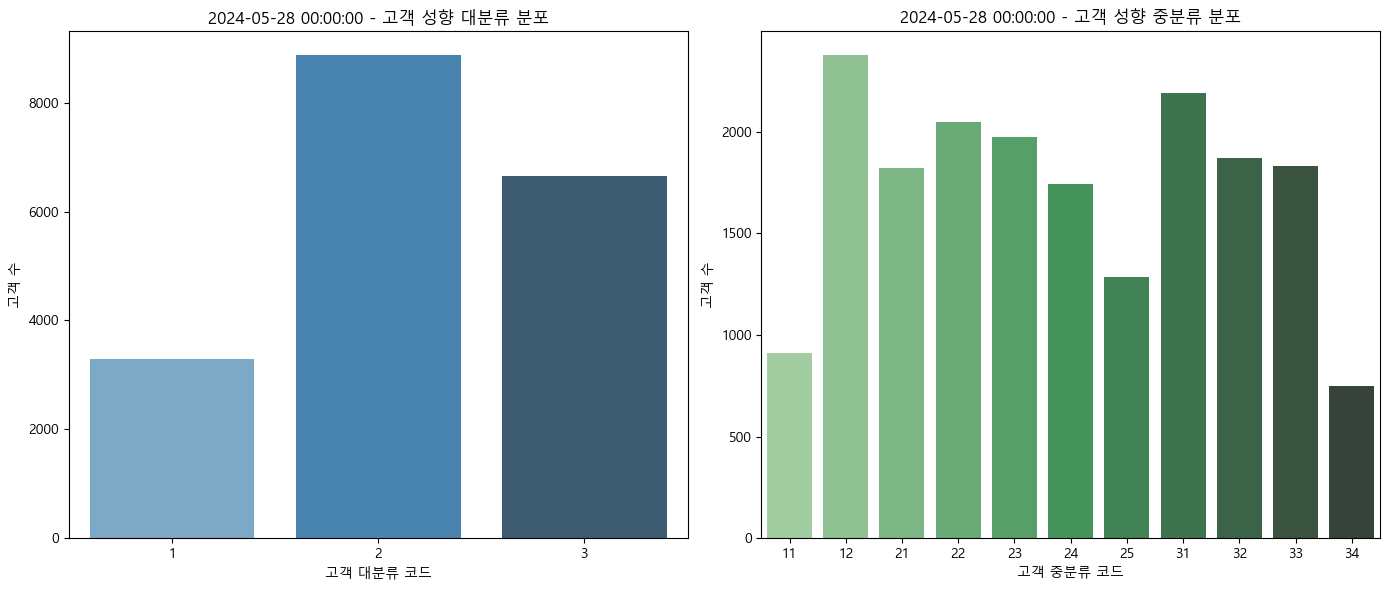

날짜: 2024-05-29 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8870명
  - 대분류 코드 3: 6642명
  - 대분류 코드 1: 3284명
중분류 코드별 분포:
  - 중분류 코드 12: 2377명
  - 중분류 코드 31: 2191명
  - 중분류 코드 22: 2042명
  - 중분류 코드 23: 1978명
  - 중분류 코드 32: 1871명
  - 중분류 코드 33: 1834명
  - 중분류 코드 21: 1820명
  - 중분류 코드 24: 1746명
  - 중분류 코드 25: 1284명
  - 중분류 코드 11: 907명
  - 중분류 코드 34: 746명
가장 많이 분포된 대분류 코드: 2 (8870명)
가장 많이 분포된 중분류 코드: 12 (2377명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


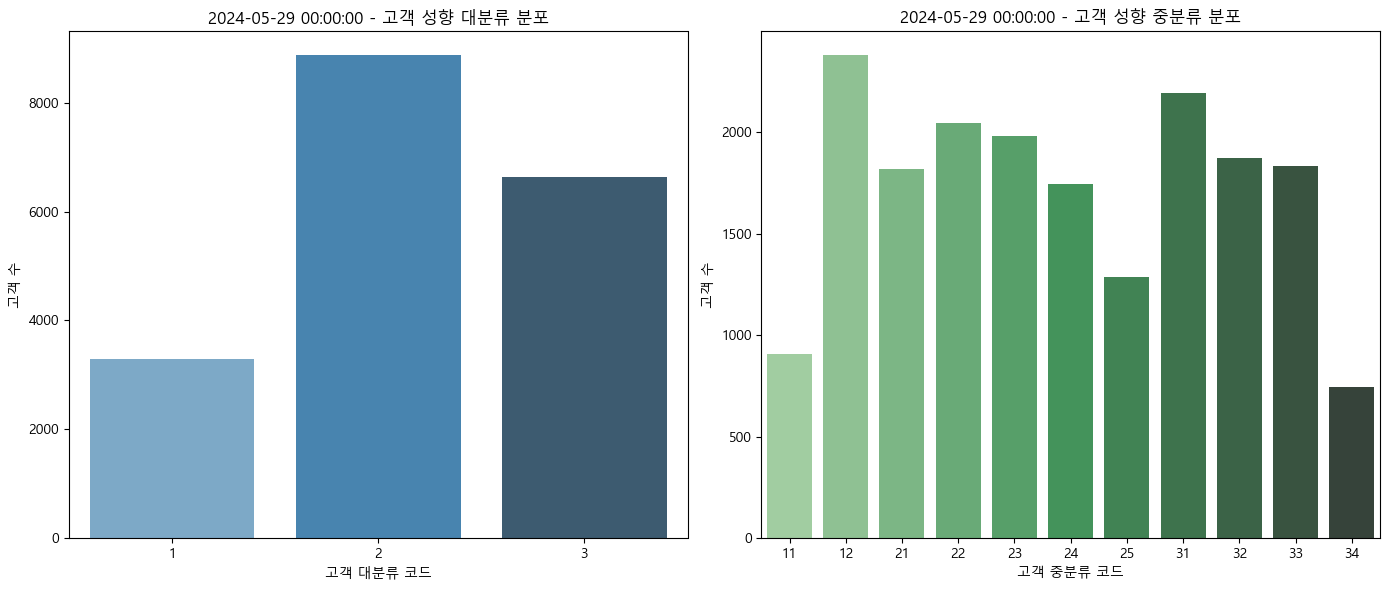

날짜: 2024-05-30 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8886명
  - 대분류 코드 3: 6651명
  - 대분류 코드 1: 3292명
중분류 코드별 분포:
  - 중분류 코드 12: 2384명
  - 중분류 코드 31: 2197명
  - 중분류 코드 22: 2044명
  - 중분류 코드 23: 1982명
  - 중분류 코드 32: 1873명
  - 중분류 코드 33: 1832명
  - 중분류 코드 21: 1821명
  - 중분류 코드 24: 1749명
  - 중분류 코드 25: 1290명
  - 중분류 코드 11: 908명
  - 중분류 코드 34: 749명
가장 많이 분포된 대분류 코드: 2 (8886명)
가장 많이 분포된 중분류 코드: 12 (2384명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


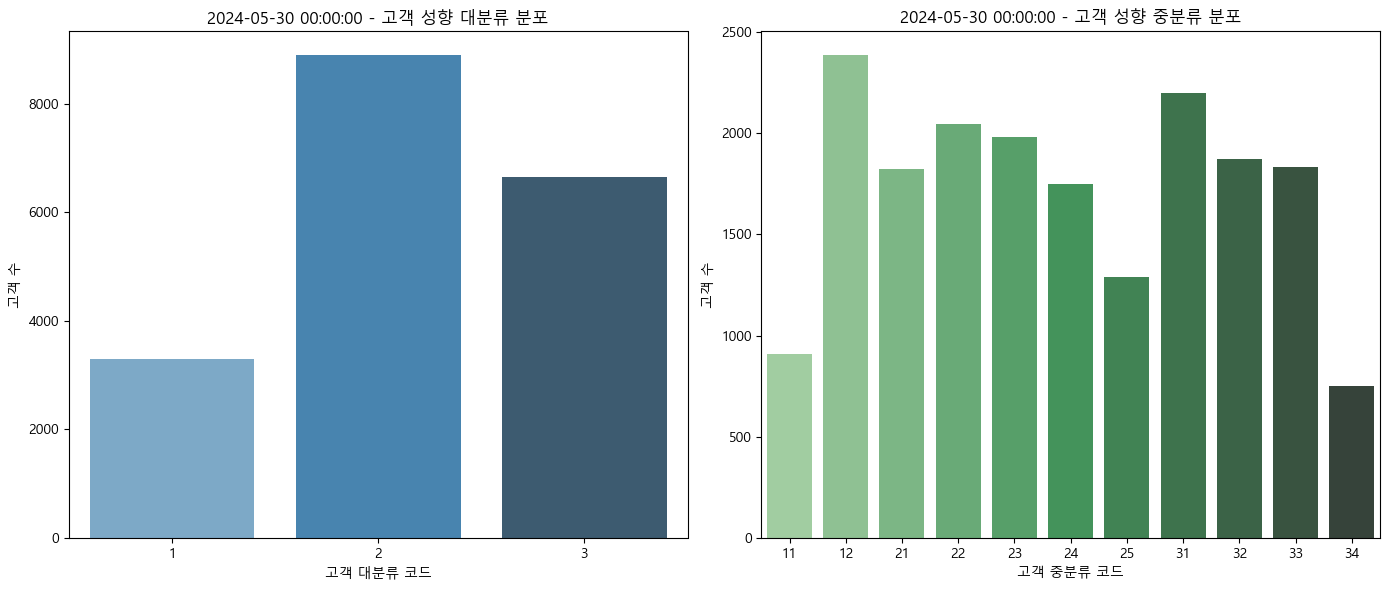

날짜: 2024-05-31 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8890명
  - 대분류 코드 3: 6661명
  - 대분류 코드 1: 3294명
중분류 코드별 분포:
  - 중분류 코드 12: 2385명
  - 중분류 코드 31: 2191명
  - 중분류 코드 22: 2047명
  - 중분류 코드 23: 1978명
  - 중분류 코드 32: 1901명
  - 중분류 코드 21: 1822명
  - 중분류 코드 33: 1819명
  - 중분류 코드 24: 1747명
  - 중분류 코드 25: 1296명
  - 중분류 코드 11: 909명
  - 중분류 코드 34: 750명
가장 많이 분포된 대분류 코드: 2 (8890명)
가장 많이 분포된 중분류 코드: 12 (2385명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


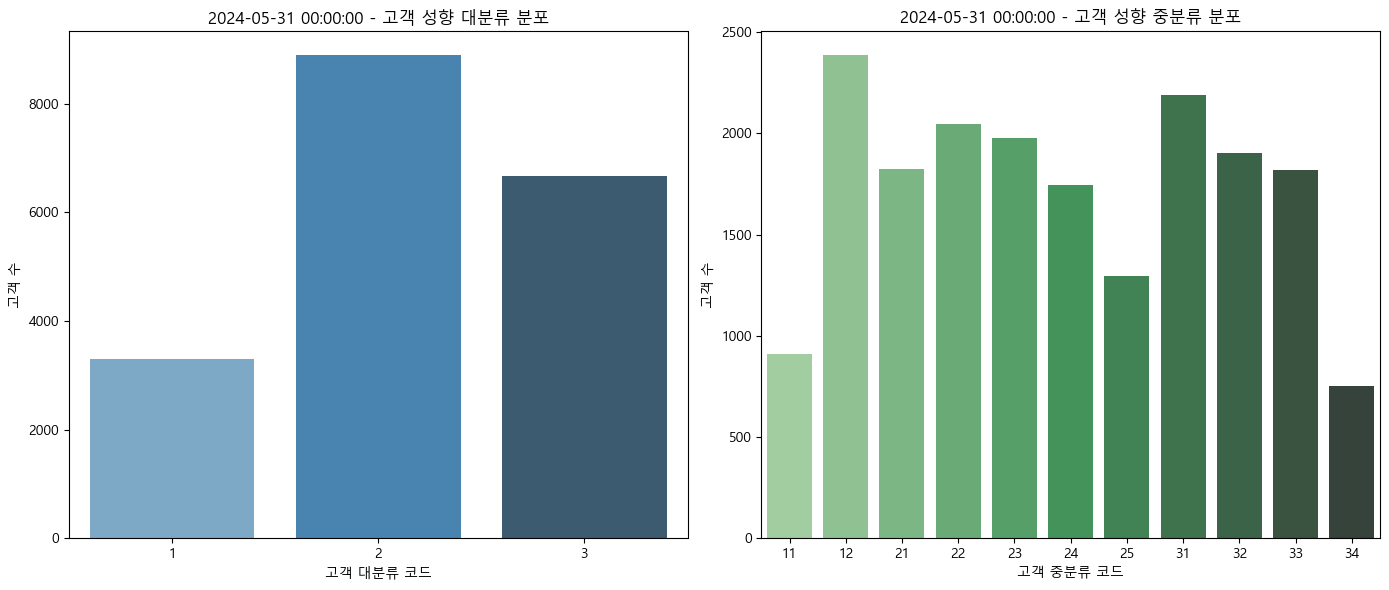

날짜: 2024-06-03 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8855명
  - 대분류 코드 3: 6650명
  - 대분류 코드 1: 3415명
중분류 코드별 분포:
  - 중분류 코드 12: 2371명
  - 중분류 코드 31: 2188명
  - 중분류 코드 22: 2040명
  - 중분류 코드 23: 1960명
  - 중분류 코드 32: 1894명
  - 중분류 코드 21: 1822명
  - 중분류 코드 33: 1810명
  - 중분류 코드 24: 1740명
  - 중분류 코드 25: 1293명
  - 중분류 코드 11: 1044명
  - 중분류 코드 34: 758명
가장 많이 분포된 대분류 코드: 2 (8855명)
가장 많이 분포된 중분류 코드: 12 (2371명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


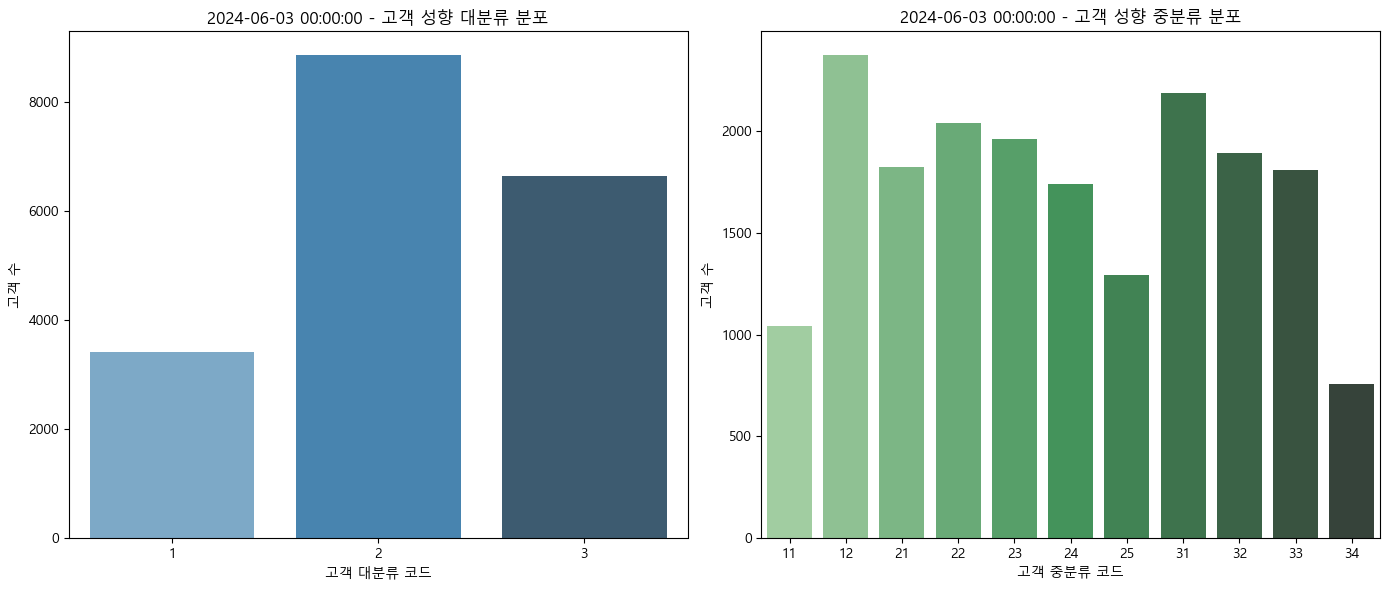

날짜: 2024-06-04 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8859명
  - 대분류 코드 3: 6659명
  - 대분류 코드 1: 3420명
중분류 코드별 분포:
  - 중분류 코드 12: 2375명
  - 중분류 코드 31: 2193명
  - 중분류 코드 22: 2040명
  - 중분류 코드 23: 1964명
  - 중분류 코드 32: 1892명
  - 중분류 코드 21: 1821명
  - 중분류 코드 33: 1818명
  - 중분류 코드 24: 1744명
  - 중분류 코드 25: 1290명
  - 중분류 코드 11: 1045명
  - 중분류 코드 34: 756명
가장 많이 분포된 대분류 코드: 2 (8859명)
가장 많이 분포된 중분류 코드: 12 (2375명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


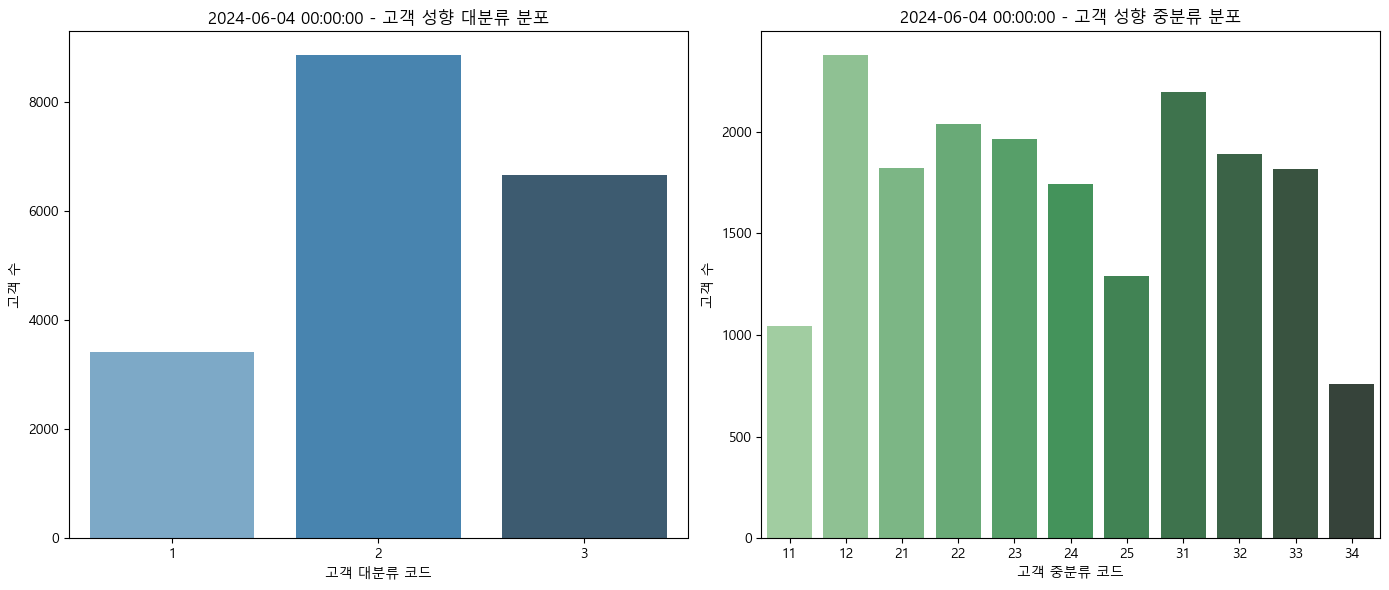

날짜: 2024-06-05 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8869명
  - 대분류 코드 3: 6665명
  - 대분류 코드 1: 3416명
중분류 코드별 분포:
  - 중분류 코드 12: 2374명
  - 중분류 코드 31: 2195명
  - 중분류 코드 22: 2040명
  - 중분류 코드 23: 1964명
  - 중분류 코드 32: 1893명
  - 중분류 코드 21: 1824명
  - 중분류 코드 33: 1821명
  - 중분류 코드 24: 1755명
  - 중분류 코드 25: 1286명
  - 중분류 코드 11: 1042명
  - 중분류 코드 34: 756명
가장 많이 분포된 대분류 코드: 2 (8869명)
가장 많이 분포된 중분류 코드: 12 (2374명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


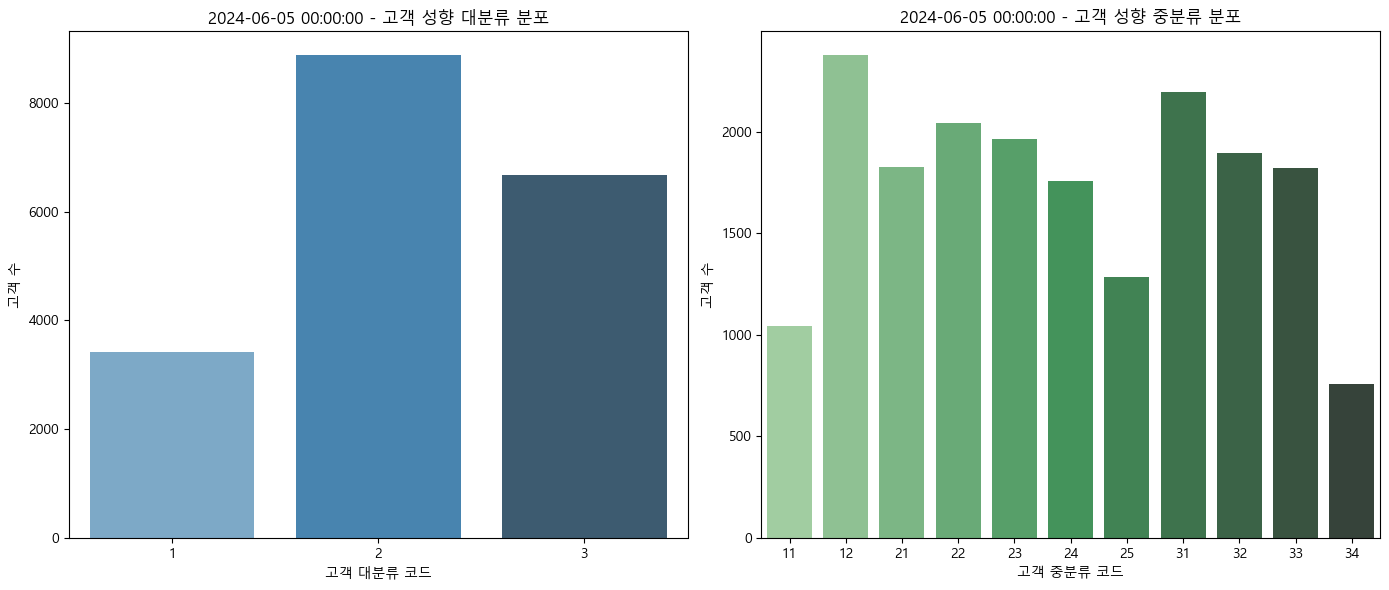

날짜: 2024-06-07 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8854명
  - 대분류 코드 3: 6654명
  - 대분류 코드 1: 3407명
중분류 코드별 분포:
  - 중분류 코드 12: 2369명
  - 중분류 코드 31: 2192명
  - 중분류 코드 22: 2034명
  - 중분류 코드 23: 1957명
  - 중분류 코드 32: 1891명
  - 중분류 코드 21: 1825명
  - 중분류 코드 33: 1810명
  - 중분류 코드 24: 1751명
  - 중분류 코드 25: 1287명
  - 중분류 코드 11: 1038명
  - 중분류 코드 34: 761명
가장 많이 분포된 대분류 코드: 2 (8854명)
가장 많이 분포된 중분류 코드: 12 (2369명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


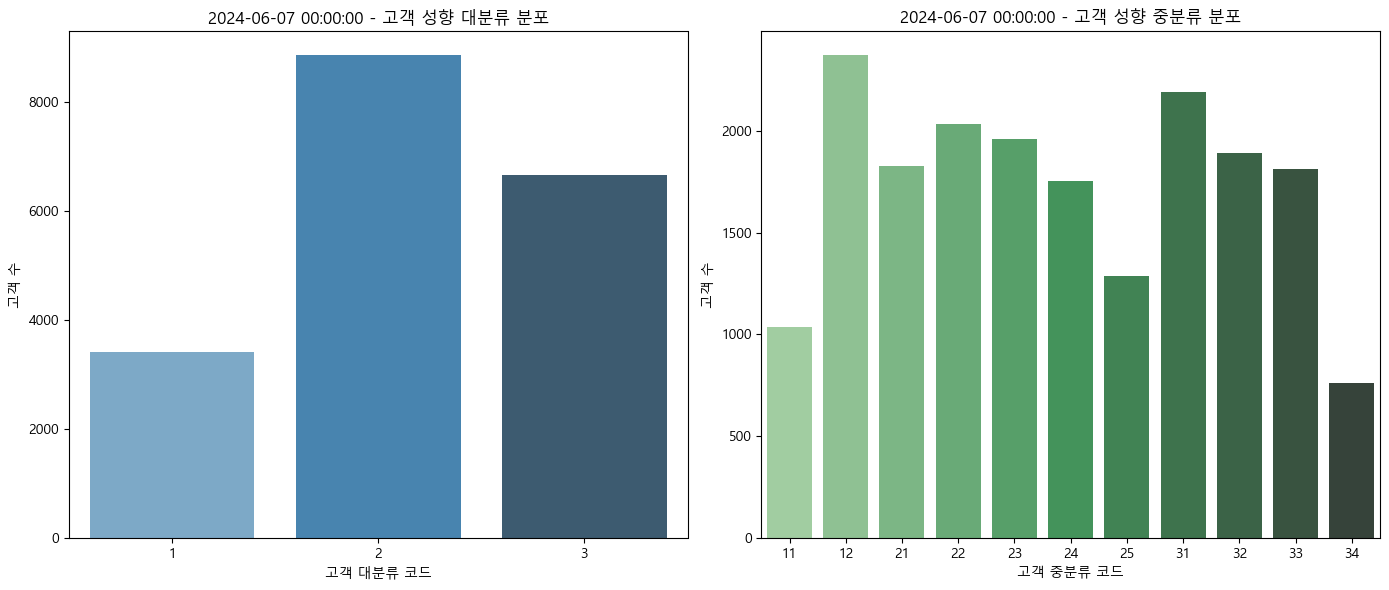

날짜: 2024-06-10 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8879명
  - 대분류 코드 3: 6669명
  - 대분류 코드 1: 3420명
중분류 코드별 분포:
  - 중분류 코드 12: 2372명
  - 중분류 코드 31: 2198명
  - 중분류 코드 22: 2043명
  - 중분류 코드 23: 1967명
  - 중분류 코드 32: 1894명
  - 중분류 코드 21: 1828명
  - 중분류 코드 33: 1813명
  - 중분류 코드 24: 1757명
  - 중분류 코드 25: 1284명
  - 중분류 코드 11: 1048명
  - 중분류 코드 34: 764명
가장 많이 분포된 대분류 코드: 2 (8879명)
가장 많이 분포된 중분류 코드: 12 (2372명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


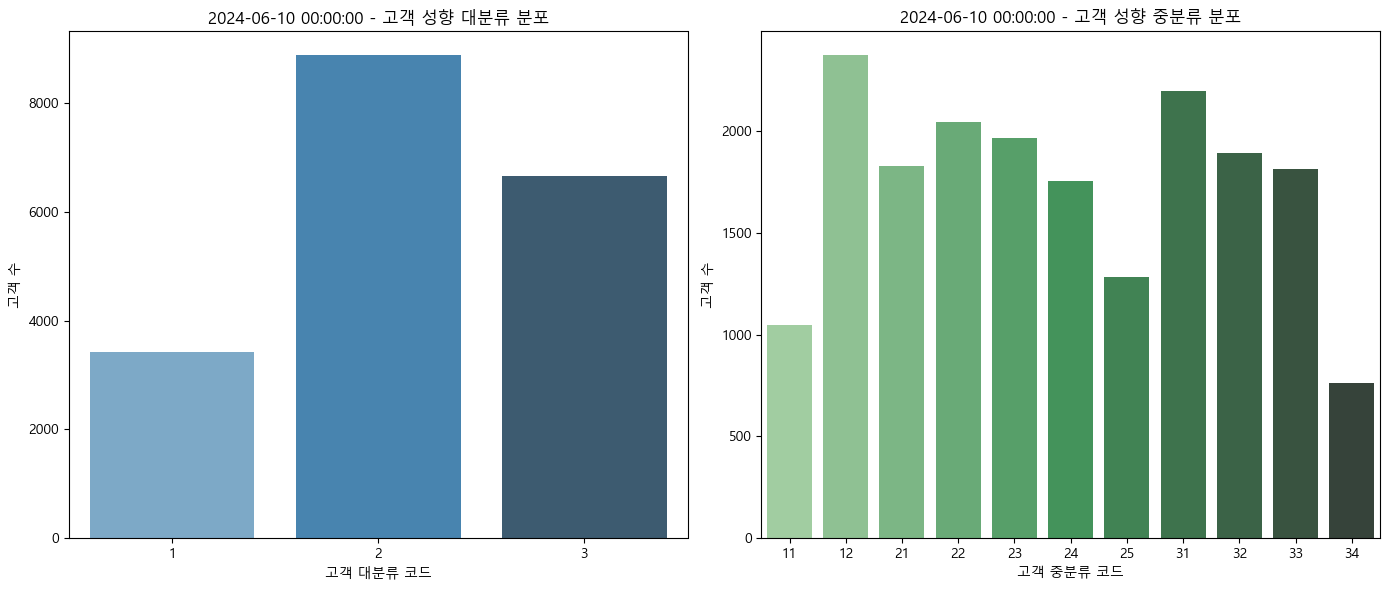

날짜: 2024-06-11 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8892명
  - 대분류 코드 3: 6675명
  - 대분류 코드 1: 3423명
중분류 코드별 분포:
  - 중분류 코드 12: 2376명
  - 중분류 코드 31: 2198명
  - 중분류 코드 22: 2046명
  - 중분류 코드 23: 1965명
  - 중분류 코드 32: 1899명
  - 중분류 코드 21: 1834명
  - 중분류 코드 33: 1813명
  - 중분류 코드 24: 1759명
  - 중분류 코드 25: 1288명
  - 중분류 코드 11: 1047명
  - 중분류 코드 34: 765명
가장 많이 분포된 대분류 코드: 2 (8892명)
가장 많이 분포된 중분류 코드: 12 (2376명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


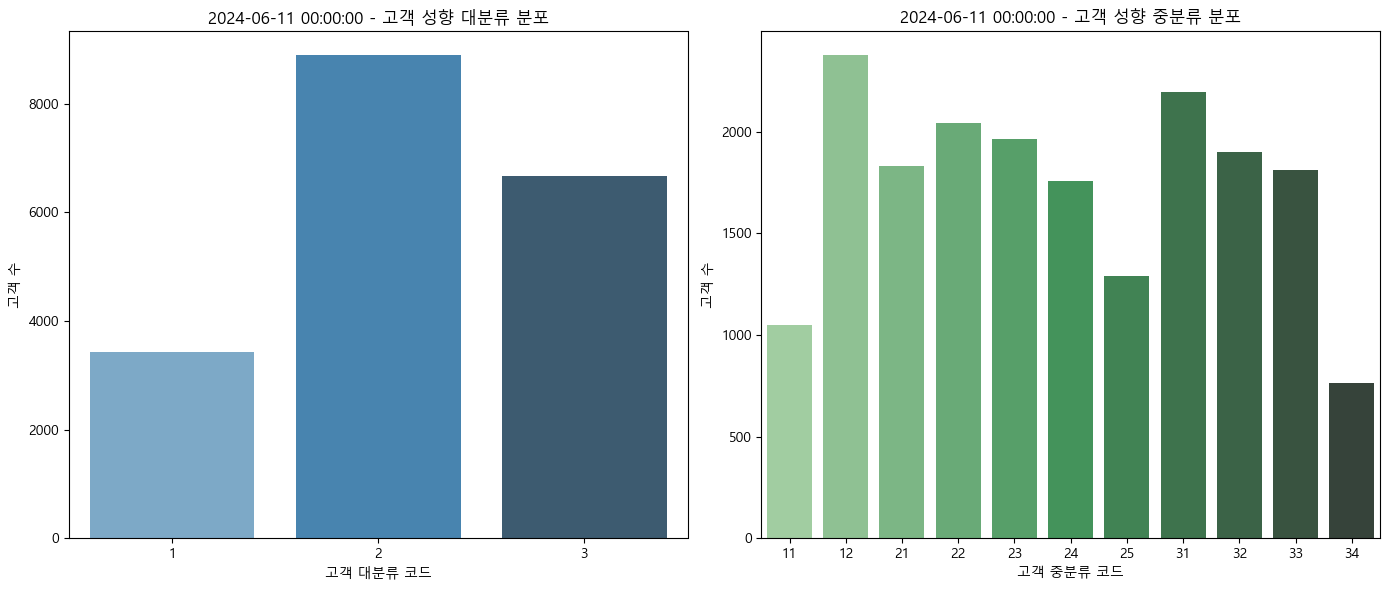

날짜: 2024-06-12 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8884명
  - 대분류 코드 3: 6674명
  - 대분류 코드 1: 3423명
중분류 코드별 분포:
  - 중분류 코드 12: 2377명
  - 중분류 코드 31: 2198명
  - 중분류 코드 22: 2044명
  - 중분류 코드 23: 1966명
  - 중분류 코드 32: 1900명
  - 중분류 코드 21: 1829명
  - 중분류 코드 33: 1809명
  - 중분류 코드 24: 1756명
  - 중분류 코드 25: 1289명
  - 중분류 코드 11: 1046명
  - 중분류 코드 34: 767명
가장 많이 분포된 대분류 코드: 2 (8884명)
가장 많이 분포된 중분류 코드: 12 (2377명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


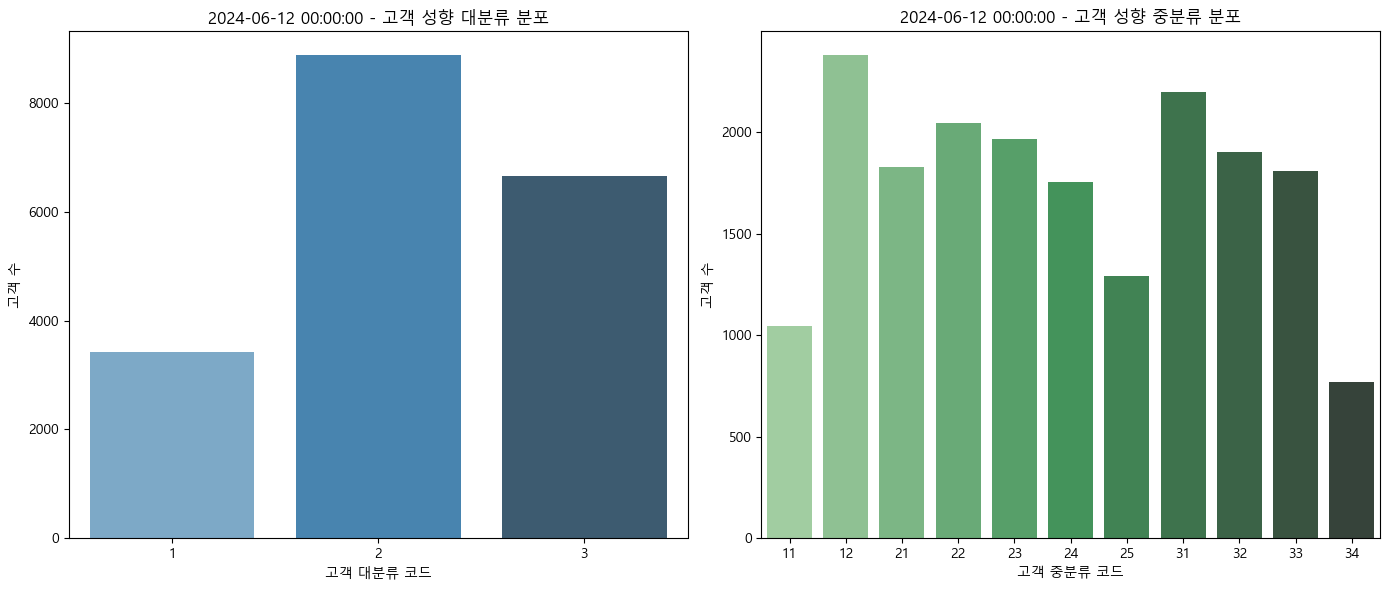

날짜: 2024-06-13 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8888명
  - 대분류 코드 3: 6681명
  - 대분류 코드 1: 3420명
중분류 코드별 분포:
  - 중분류 코드 12: 2381명
  - 중분류 코드 31: 2200명
  - 중분류 코드 22: 2044명
  - 중분류 코드 23: 1968명
  - 중분류 코드 32: 1903명
  - 중분류 코드 21: 1835명
  - 중분류 코드 33: 1812명
  - 중분류 코드 24: 1759명
  - 중분류 코드 25: 1282명
  - 중분류 코드 11: 1039명
  - 중분류 코드 34: 766명
가장 많이 분포된 대분류 코드: 2 (8888명)
가장 많이 분포된 중분류 코드: 12 (2381명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


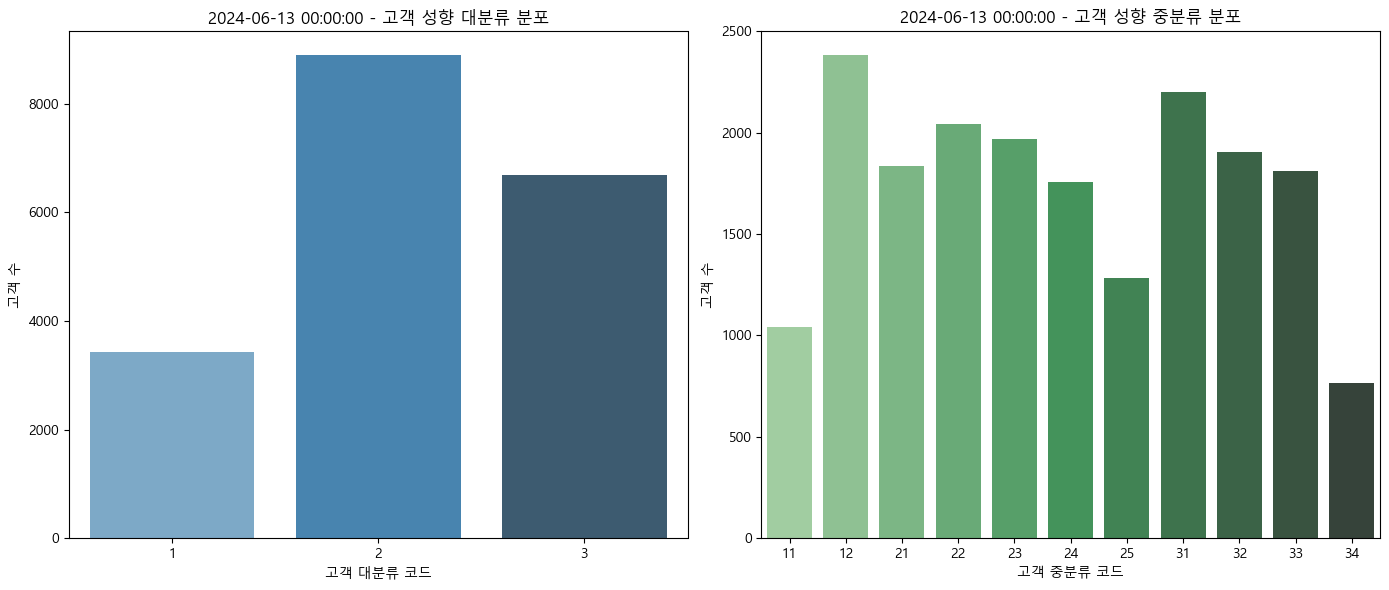

날짜: 2024-06-14 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8894명
  - 대분류 코드 3: 6675명
  - 대분류 코드 1: 3421명
중분류 코드별 분포:
  - 중분류 코드 12: 2380명
  - 중분류 코드 31: 2199명
  - 중분류 코드 22: 2044명
  - 중분류 코드 23: 1965명
  - 중분류 코드 32: 1898명
  - 중분류 코드 21: 1837명
  - 중분류 코드 33: 1809명
  - 중분류 코드 24: 1757명
  - 중분류 코드 25: 1291명
  - 중분류 코드 11: 1041명
  - 중분류 코드 34: 769명
가장 많이 분포된 대분류 코드: 2 (8894명)
가장 많이 분포된 중분류 코드: 12 (2380명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


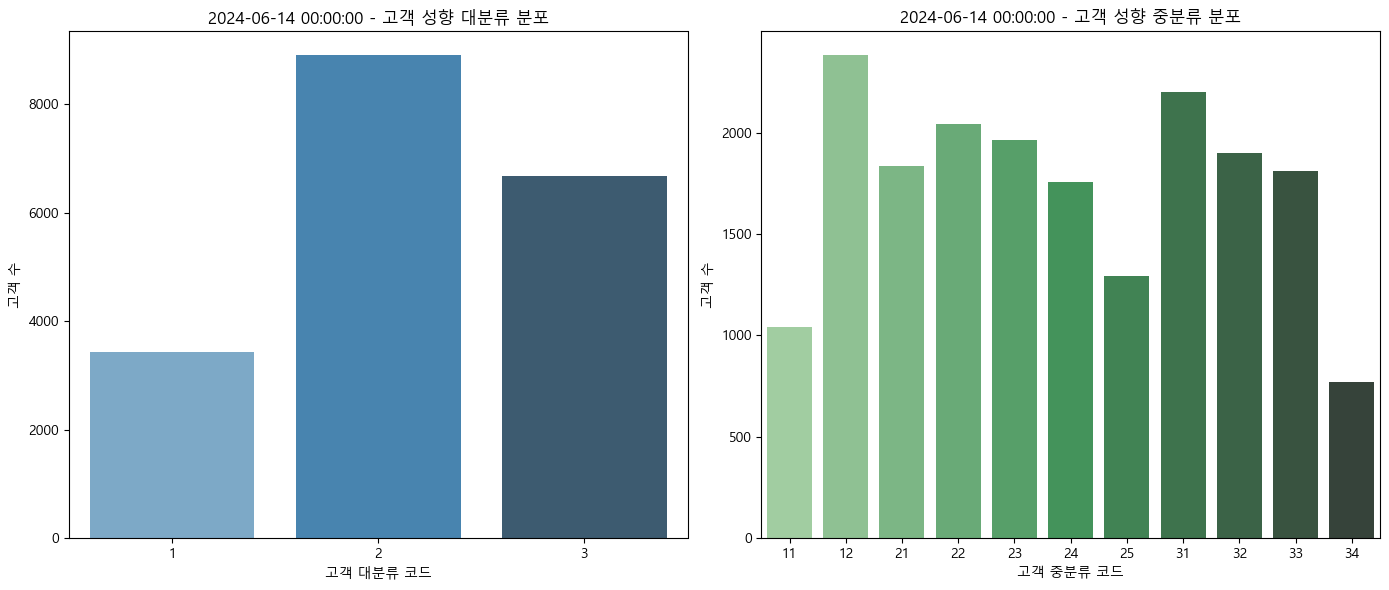

날짜: 2024-06-17 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8885명
  - 대분류 코드 3: 6667명
  - 대분류 코드 1: 3413명
중분류 코드별 분포:
  - 중분류 코드 12: 2378명
  - 중분류 코드 31: 2196명
  - 중분류 코드 22: 2040명
  - 중분류 코드 23: 1964명
  - 중분류 코드 32: 1890명
  - 중분류 코드 21: 1831명
  - 중분류 코드 33: 1810명
  - 중분류 코드 24: 1756명
  - 중분류 코드 25: 1294명
  - 중분류 코드 11: 1035명
  - 중분류 코드 34: 771명
가장 많이 분포된 대분류 코드: 2 (8885명)
가장 많이 분포된 중분류 코드: 12 (2378명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


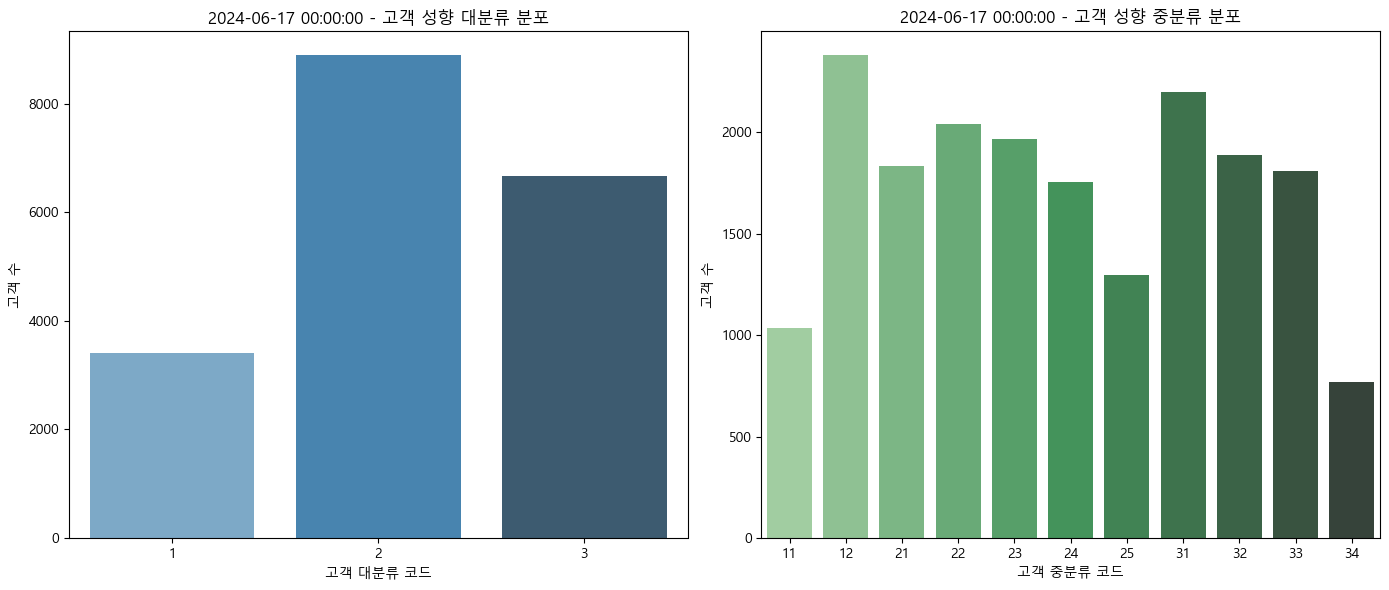

날짜: 2024-06-18 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8869명
  - 대분류 코드 3: 6656명
  - 대분류 코드 1: 3412명
중분류 코드별 분포:
  - 중분류 코드 12: 2379명
  - 중분류 코드 31: 2197명
  - 중분류 코드 22: 2040명
  - 중분류 코드 23: 1953명
  - 중분류 코드 32: 1887명
  - 중분류 코드 21: 1832명
  - 중분류 코드 33: 1805명
  - 중분류 코드 24: 1756명
  - 중분류 코드 25: 1288명
  - 중분류 코드 11: 1033명
  - 중분류 코드 34: 767명
가장 많이 분포된 대분류 코드: 2 (8869명)
가장 많이 분포된 중분류 코드: 12 (2379명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


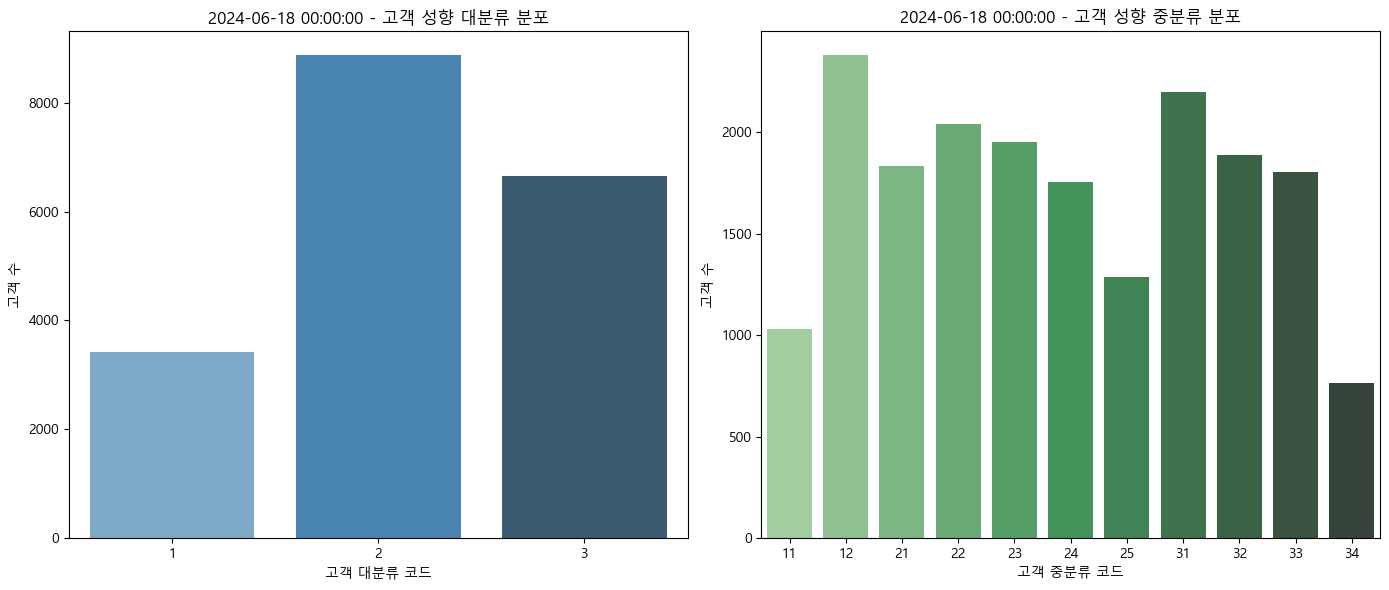

날짜: 2024-06-19 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8891명
  - 대분류 코드 3: 6675명
  - 대분류 코드 1: 3420명
중분류 코드별 분포:
  - 중분류 코드 12: 2383명
  - 중분류 코드 31: 2204명
  - 중분류 코드 22: 2042명
  - 중분류 코드 23: 1953명
  - 중분류 코드 32: 1894명
  - 중분류 코드 21: 1842명
  - 중분류 코드 33: 1806명
  - 중분류 코드 24: 1761명
  - 중분류 코드 25: 1293명
  - 중분류 코드 11: 1037명
  - 중분류 코드 34: 771명
가장 많이 분포된 대분류 코드: 2 (8891명)
가장 많이 분포된 중분류 코드: 12 (2383명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


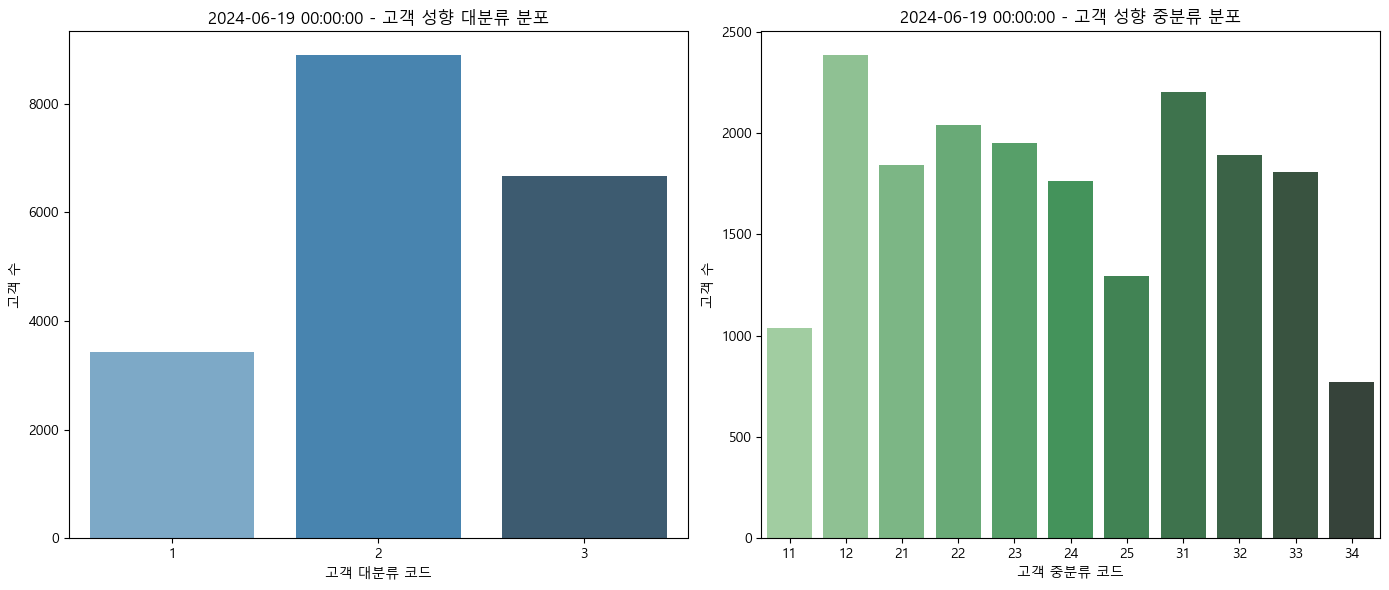

날짜: 2024-06-20 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8882명
  - 대분류 코드 3: 6677명
  - 대분류 코드 1: 3419명
중분류 코드별 분포:
  - 중분류 코드 12: 2382명
  - 중분류 코드 31: 2204명
  - 중분류 코드 22: 2034명
  - 중분류 코드 23: 1952명
  - 중분류 코드 32: 1900명
  - 중분류 코드 21: 1839명
  - 중분류 코드 33: 1809명
  - 중분류 코드 24: 1762명
  - 중분류 코드 25: 1295명
  - 중분류 코드 11: 1037명
  - 중분류 코드 34: 764명
가장 많이 분포된 대분류 코드: 2 (8882명)
가장 많이 분포된 중분류 코드: 12 (2382명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


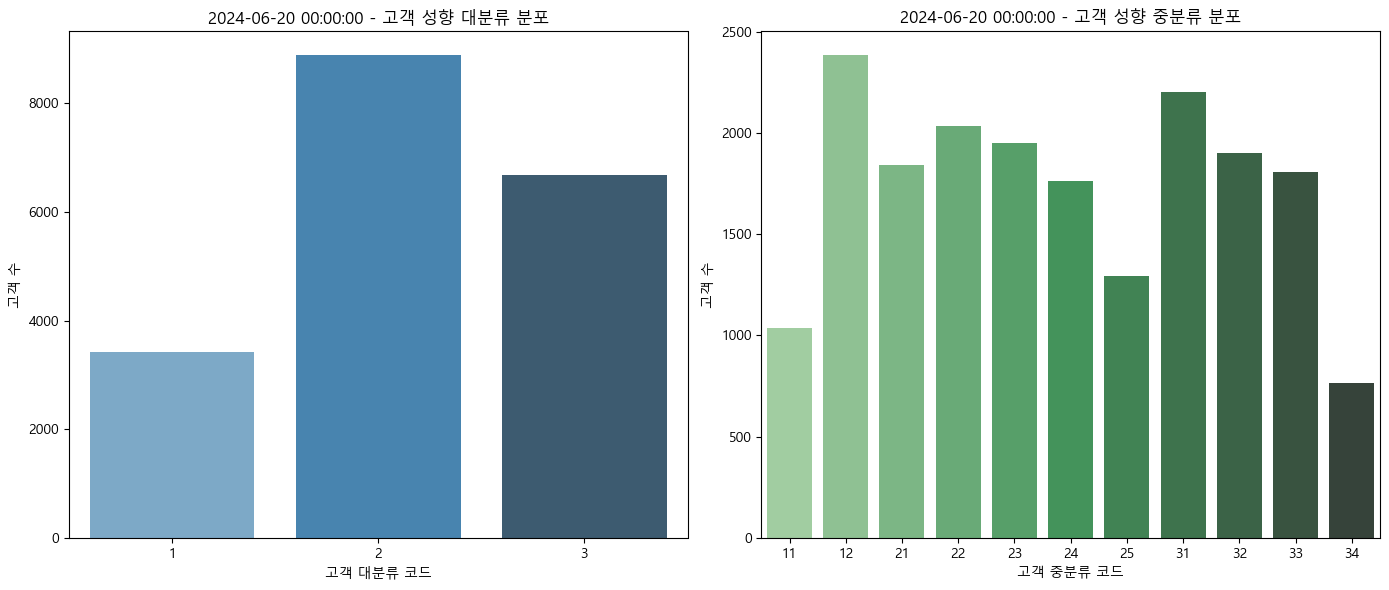

날짜: 2024-06-21 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8874명
  - 대분류 코드 3: 6665명
  - 대분류 코드 1: 3414명
중분류 코드별 분포:
  - 중분류 코드 12: 2381명
  - 중분류 코드 31: 2201명
  - 중분류 코드 22: 2032명
  - 중분류 코드 23: 1950명
  - 중분류 코드 32: 1897명
  - 중분류 코드 21: 1834명
  - 중분류 코드 33: 1806명
  - 중분류 코드 24: 1760명
  - 중분류 코드 25: 1298명
  - 중분류 코드 11: 1033명
  - 중분류 코드 34: 761명
가장 많이 분포된 대분류 코드: 2 (8874명)
가장 많이 분포된 중분류 코드: 12 (2381명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


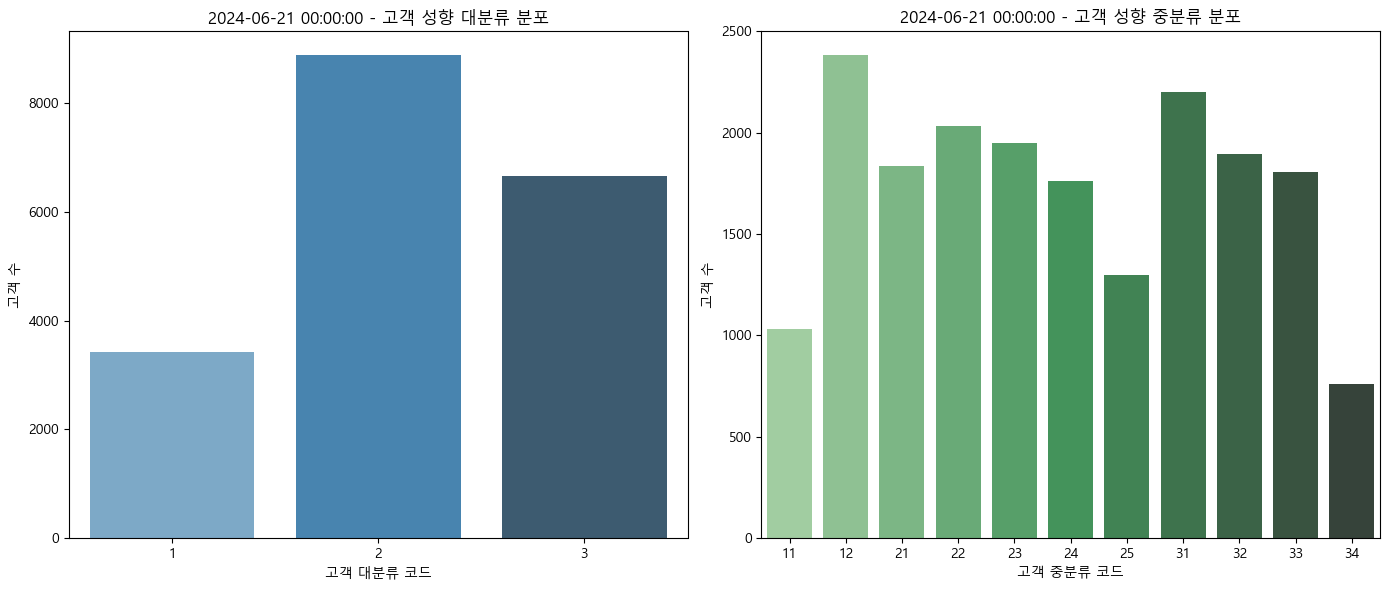

날짜: 2024-06-24 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8874명
  - 대분류 코드 3: 6672명
  - 대분류 코드 1: 3412명
중분류 코드별 분포:
  - 중분류 코드 12: 2383명
  - 중분류 코드 31: 2204명
  - 중분류 코드 22: 2034명
  - 중분류 코드 23: 1952명
  - 중분류 코드 32: 1903명
  - 중분류 코드 21: 1825명
  - 중분류 코드 33: 1801명
  - 중분류 코드 24: 1759명
  - 중분류 코드 25: 1304명
  - 중분류 코드 11: 1029명
  - 중분류 코드 34: 764명
가장 많이 분포된 대분류 코드: 2 (8874명)
가장 많이 분포된 중분류 코드: 12 (2383명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


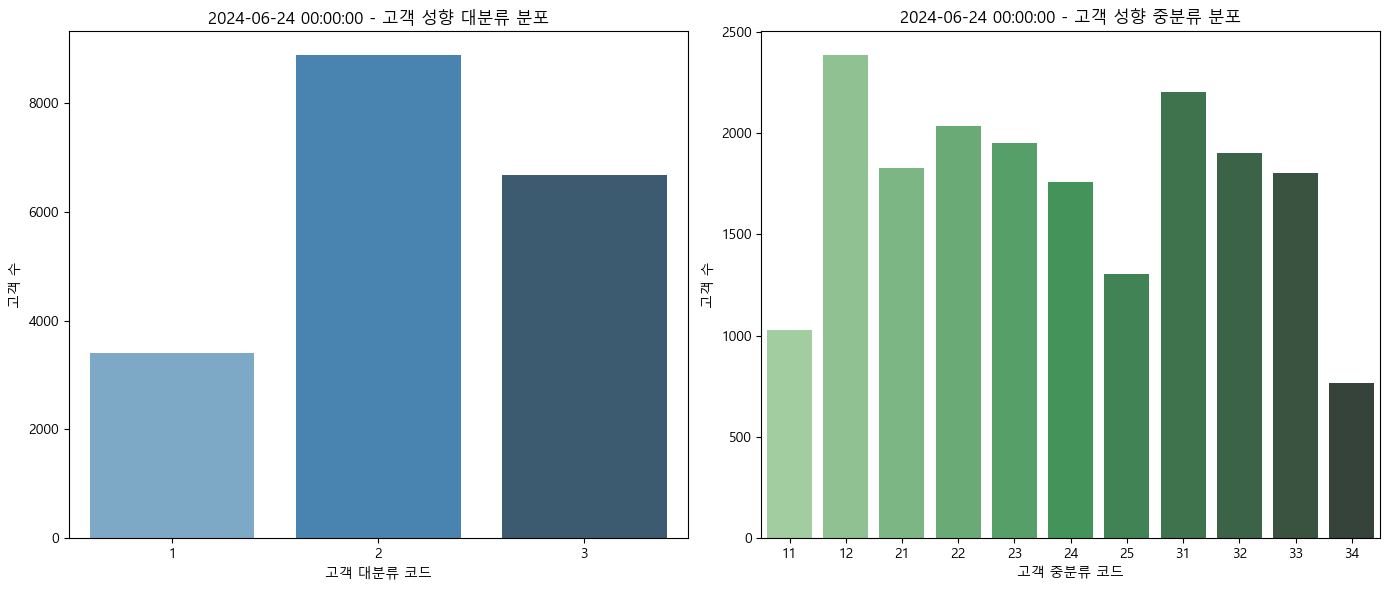

날짜: 2024-06-25 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8889명
  - 대분류 코드 3: 6685명
  - 대분류 코드 1: 3423명
중분류 코드별 분포:
  - 중분류 코드 12: 2392명
  - 중분류 코드 31: 2213명
  - 중분류 코드 22: 2037명
  - 중분류 코드 23: 1959명
  - 중분류 코드 32: 1910명
  - 중분류 코드 21: 1830명
  - 중분류 코드 33: 1803명
  - 중분류 코드 24: 1761명
  - 중분류 코드 25: 1302명
  - 중분류 코드 11: 1031명
  - 중분류 코드 34: 759명
가장 많이 분포된 대분류 코드: 2 (8889명)
가장 많이 분포된 중분류 코드: 12 (2392명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


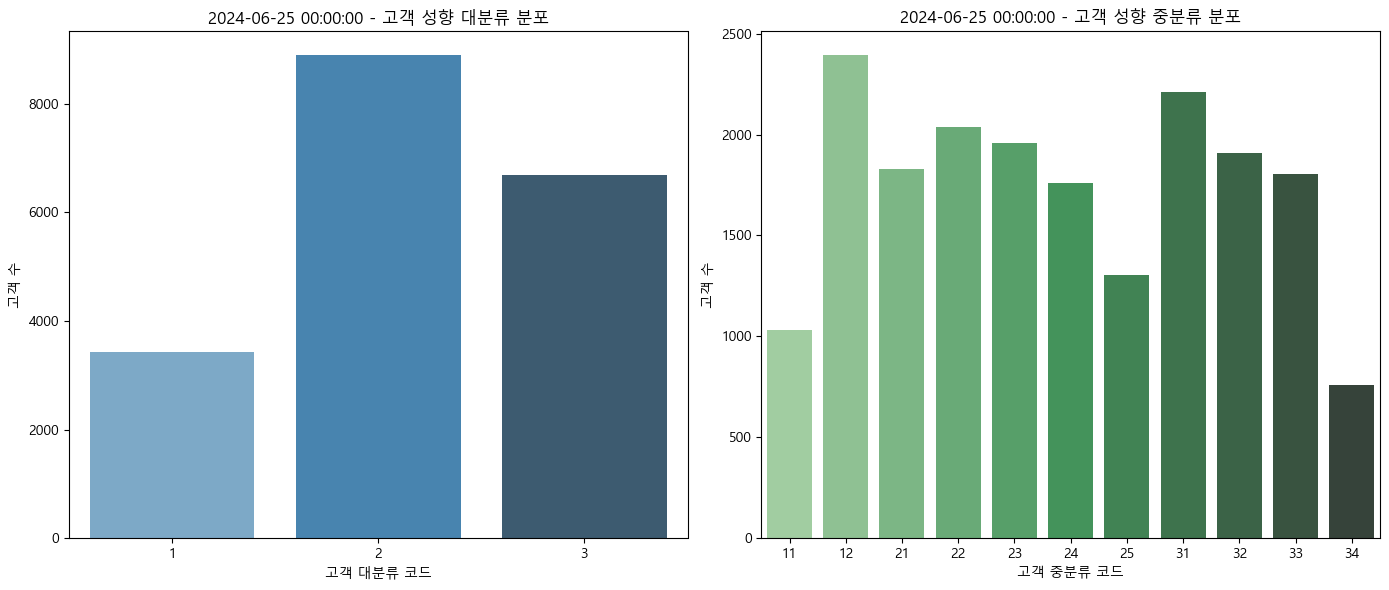

날짜: 2024-06-26 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8893명
  - 대분류 코드 3: 6688명
  - 대분류 코드 1: 3424명
중분류 코드별 분포:
  - 중분류 코드 12: 2389명
  - 중분류 코드 31: 2212명
  - 중분류 코드 22: 2042명
  - 중분류 코드 23: 1953명
  - 중분류 코드 32: 1913명
  - 중분류 코드 21: 1827명
  - 중분류 코드 33: 1804명
  - 중분류 코드 24: 1768명
  - 중분류 코드 25: 1303명
  - 중분류 코드 11: 1035명
  - 중분류 코드 34: 759명
가장 많이 분포된 대분류 코드: 2 (8893명)
가장 많이 분포된 중분류 코드: 12 (2389명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


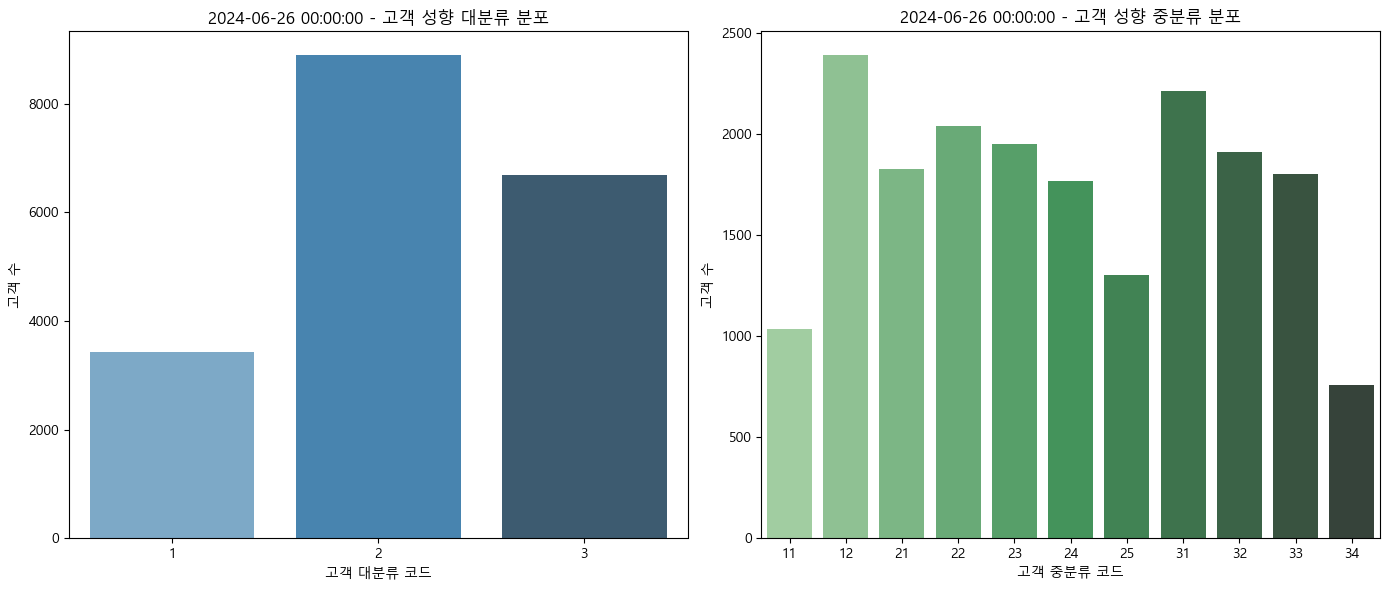

날짜: 2024-06-27 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8885명
  - 대분류 코드 3: 6689명
  - 대분류 코드 1: 3423명
중분류 코드별 분포:
  - 중분류 코드 12: 2388명
  - 중분류 코드 31: 2210명
  - 중분류 코드 22: 2040명
  - 중분류 코드 23: 1952명
  - 중분류 코드 32: 1909명
  - 중분류 코드 21: 1824명
  - 중분류 코드 33: 1809명
  - 중분류 코드 24: 1766명
  - 중분류 코드 25: 1303명
  - 중분류 코드 11: 1035명
  - 중분류 코드 34: 761명
가장 많이 분포된 대분류 코드: 2 (8885명)
가장 많이 분포된 중분류 코드: 12 (2388명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


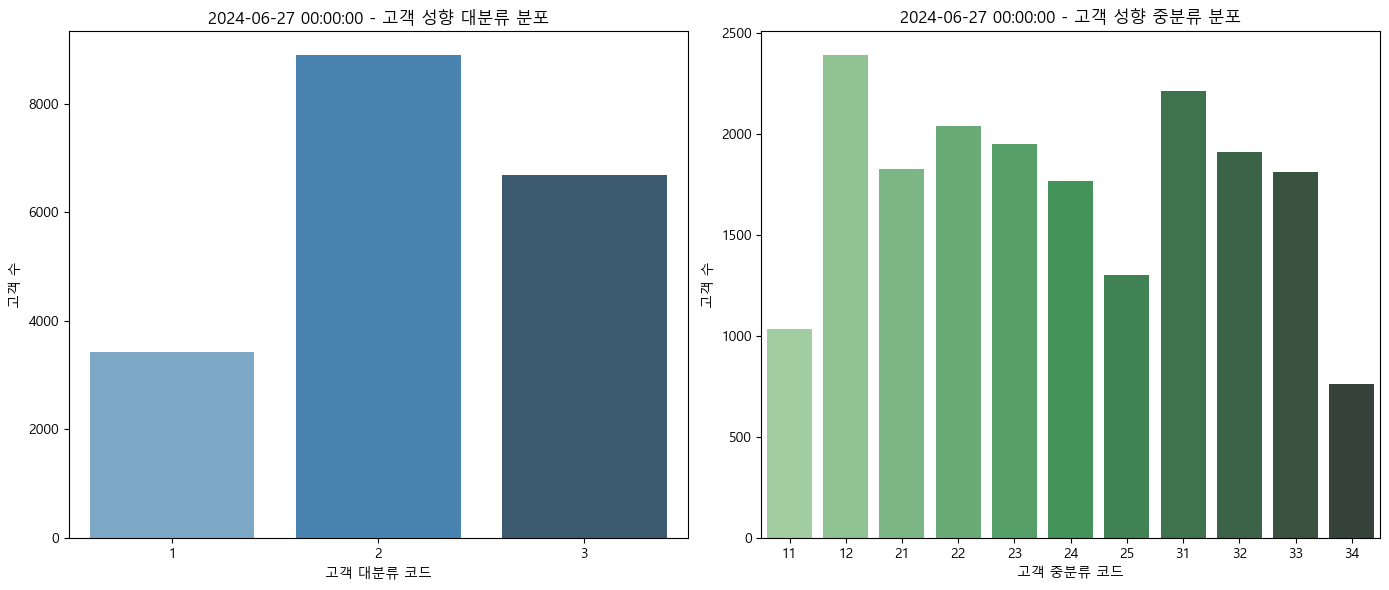

날짜: 2024-06-28 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8868명
  - 대분류 코드 3: 6681명
  - 대분류 코드 1: 3410명
중분류 코드별 분포:
  - 중분류 코드 12: 2383명
  - 중분류 코드 31: 2203명
  - 중분류 코드 22: 2041명
  - 중분류 코드 23: 1951명
  - 중분류 코드 32: 1906명
  - 중분류 코드 21: 1813명
  - 중분류 코드 33: 1812명
  - 중분류 코드 24: 1763명
  - 중분류 코드 25: 1300명
  - 중분류 코드 11: 1027명
  - 중분류 코드 34: 760명
가장 많이 분포된 대분류 코드: 2 (8868명)
가장 많이 분포된 중분류 코드: 12 (2383명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


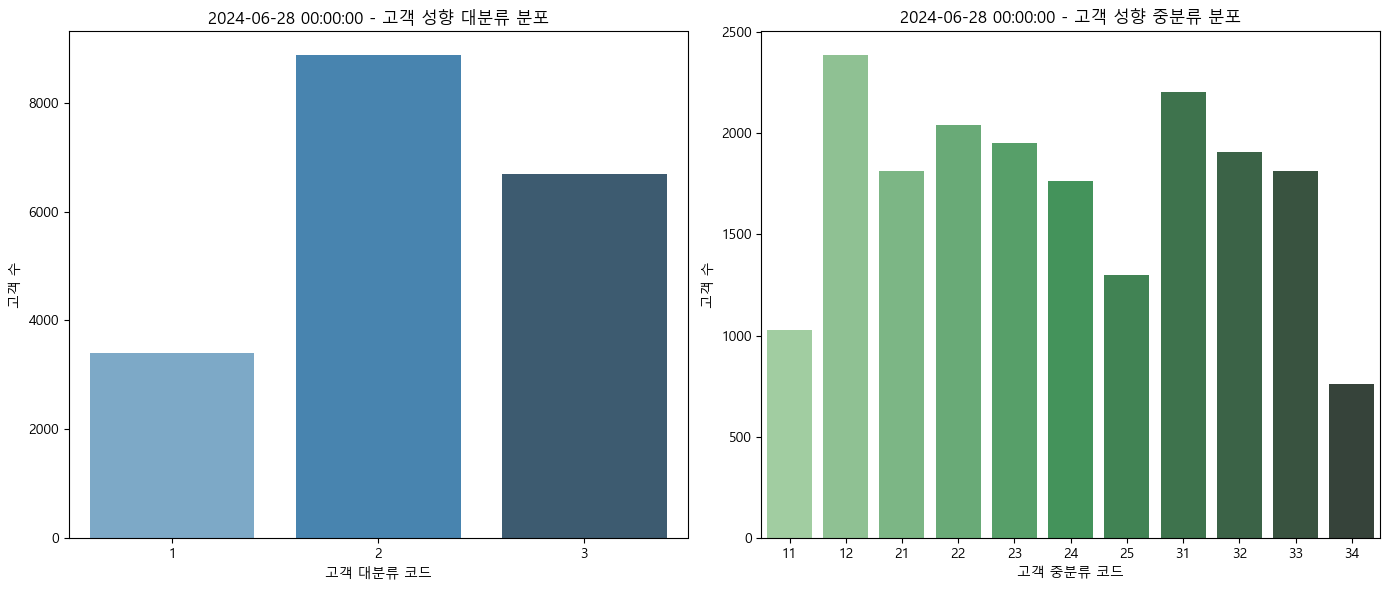

날짜: 2024-07-01 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8872명
  - 대분류 코드 3: 6690명
  - 대분류 코드 1: 3418명
중분류 코드별 분포:
  - 중분류 코드 12: 2386명
  - 중분류 코드 31: 2204명
  - 중분류 코드 22: 2042명
  - 중분류 코드 23: 1952명
  - 중분류 코드 32: 1910명
  - 중분류 코드 33: 1813명
  - 중분류 코드 21: 1813명
  - 중분류 코드 24: 1762명
  - 중분류 코드 25: 1303명
  - 중분류 코드 11: 1032명
  - 중분류 코드 34: 763명
가장 많이 분포된 대분류 코드: 2 (8872명)
가장 많이 분포된 중분류 코드: 12 (2386명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


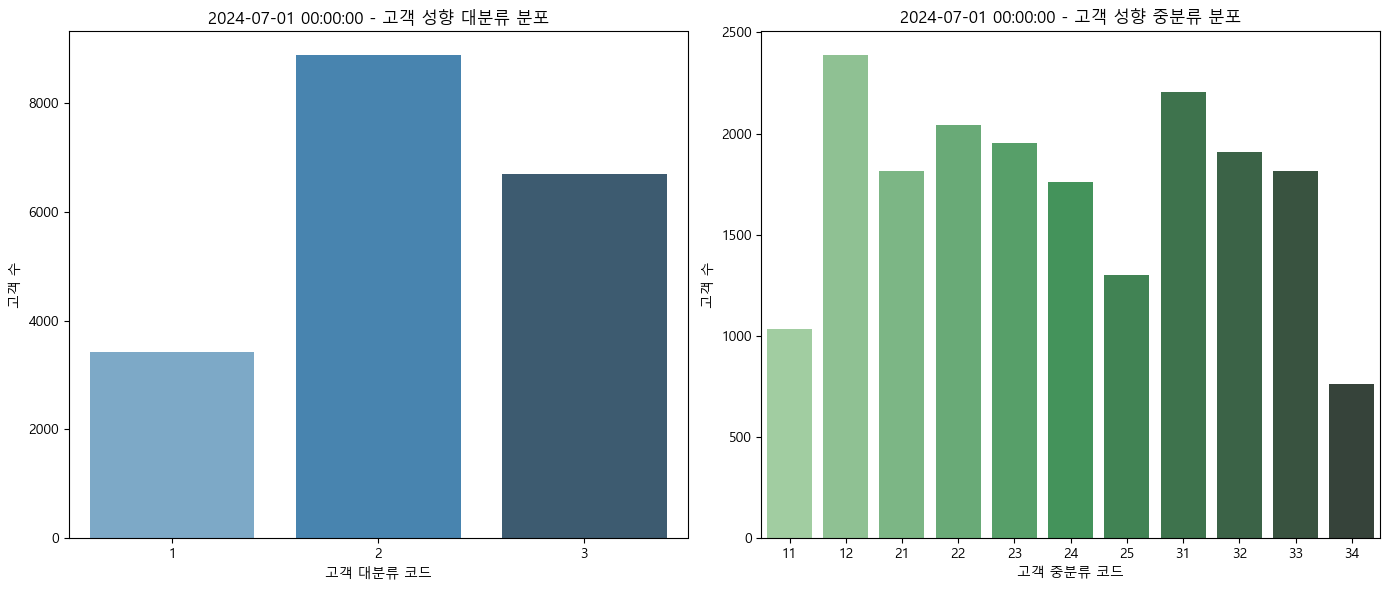

날짜: 2024-07-02 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8875명
  - 대분류 코드 3: 6702명
  - 대분류 코드 1: 3421명
중분류 코드별 분포:
  - 중분류 코드 12: 2384명
  - 중분류 코드 31: 2205명
  - 중분류 코드 22: 2044명
  - 중분류 코드 23: 1956명
  - 중분류 코드 32: 1910명
  - 중분류 코드 33: 1817명
  - 중분류 코드 21: 1815명
  - 중분류 코드 24: 1759명
  - 중분류 코드 25: 1301명
  - 중분류 코드 11: 1037명
  - 중분류 코드 34: 770명
가장 많이 분포된 대분류 코드: 2 (8875명)
가장 많이 분포된 중분류 코드: 12 (2384명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


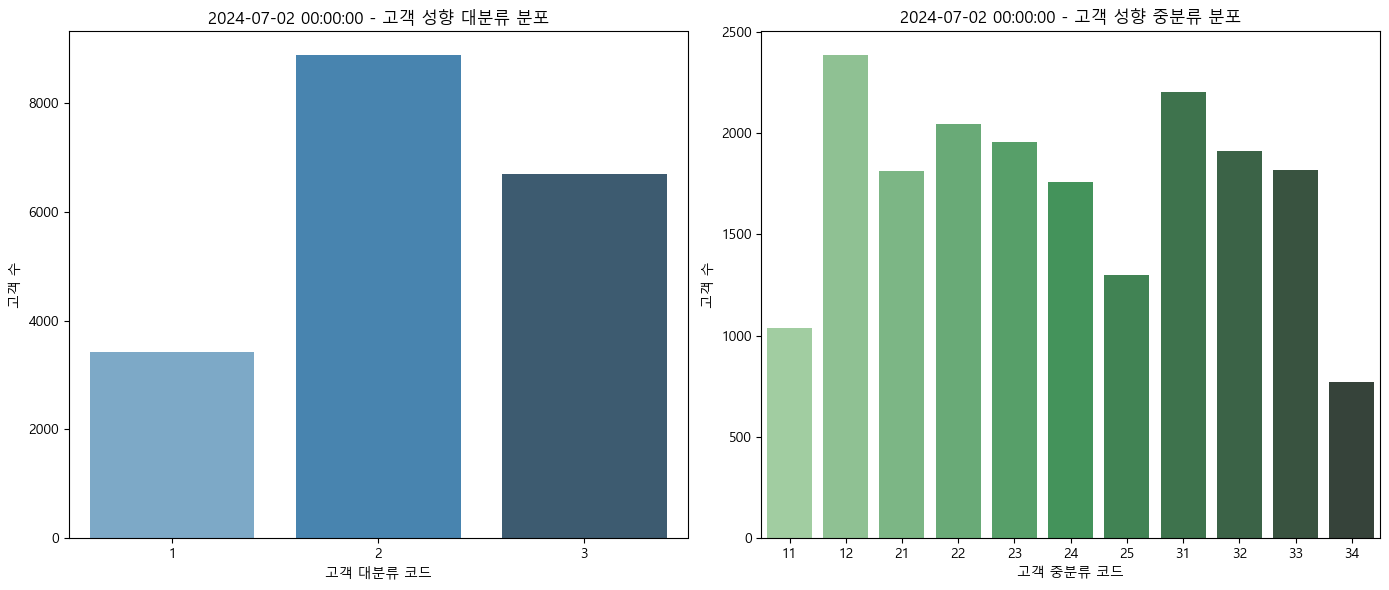

날짜: 2024-07-03 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8880명
  - 대분류 코드 3: 6698명
  - 대분류 코드 1: 3425명
중분류 코드별 분포:
  - 중분류 코드 12: 2386명
  - 중분류 코드 31: 2201명
  - 중분류 코드 22: 2047명
  - 중분류 코드 23: 1959명
  - 중분류 코드 32: 1912명
  - 중분류 코드 33: 1816명
  - 중분류 코드 21: 1813명
  - 중분류 코드 24: 1759명
  - 중분류 코드 25: 1302명
  - 중분류 코드 11: 1039명
  - 중분류 코드 34: 769명
가장 많이 분포된 대분류 코드: 2 (8880명)
가장 많이 분포된 중분류 코드: 12 (2386명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


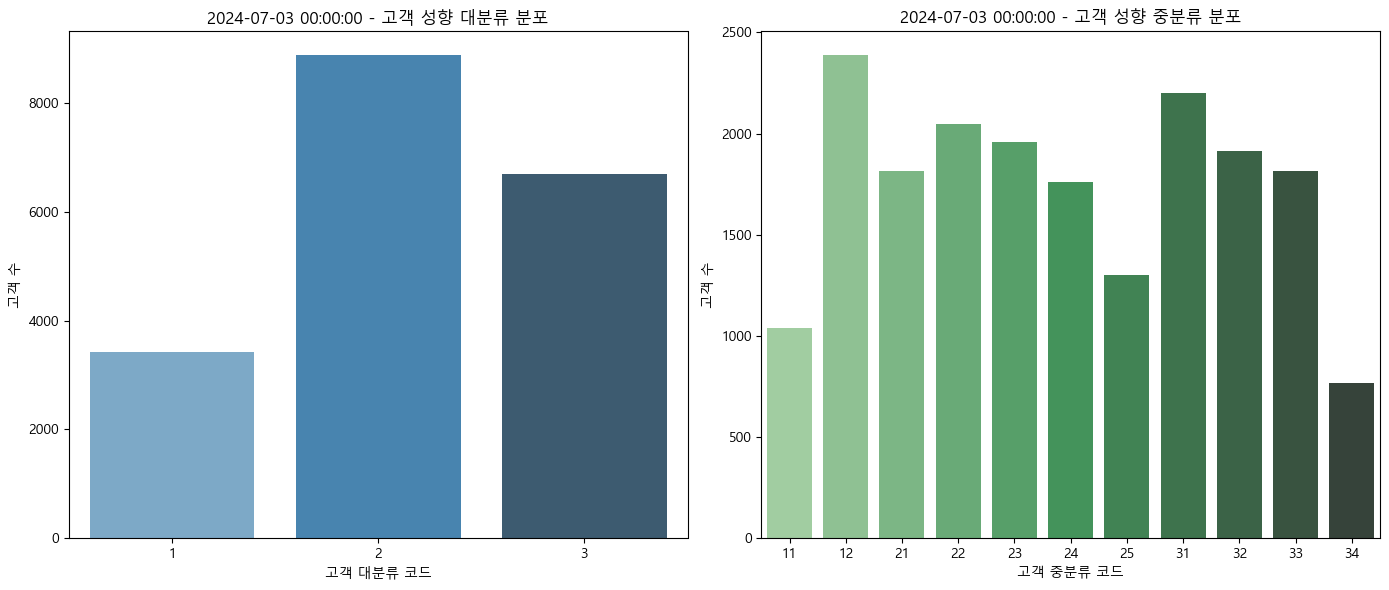

날짜: 2024-07-04 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8895명
  - 대분류 코드 3: 6715명
  - 대분류 코드 1: 3429명
중분류 코드별 분포:
  - 중분류 코드 12: 2386명
  - 중분류 코드 31: 2202명
  - 중분류 코드 22: 2051명
  - 중분류 코드 23: 1959명
  - 중분류 코드 32: 1919명
  - 중분류 코드 33: 1823명
  - 중분류 코드 21: 1818명
  - 중분류 코드 24: 1760명
  - 중분류 코드 25: 1307명
  - 중분류 코드 11: 1043명
  - 중분류 코드 34: 771명
가장 많이 분포된 대분류 코드: 2 (8895명)
가장 많이 분포된 중분류 코드: 12 (2386명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


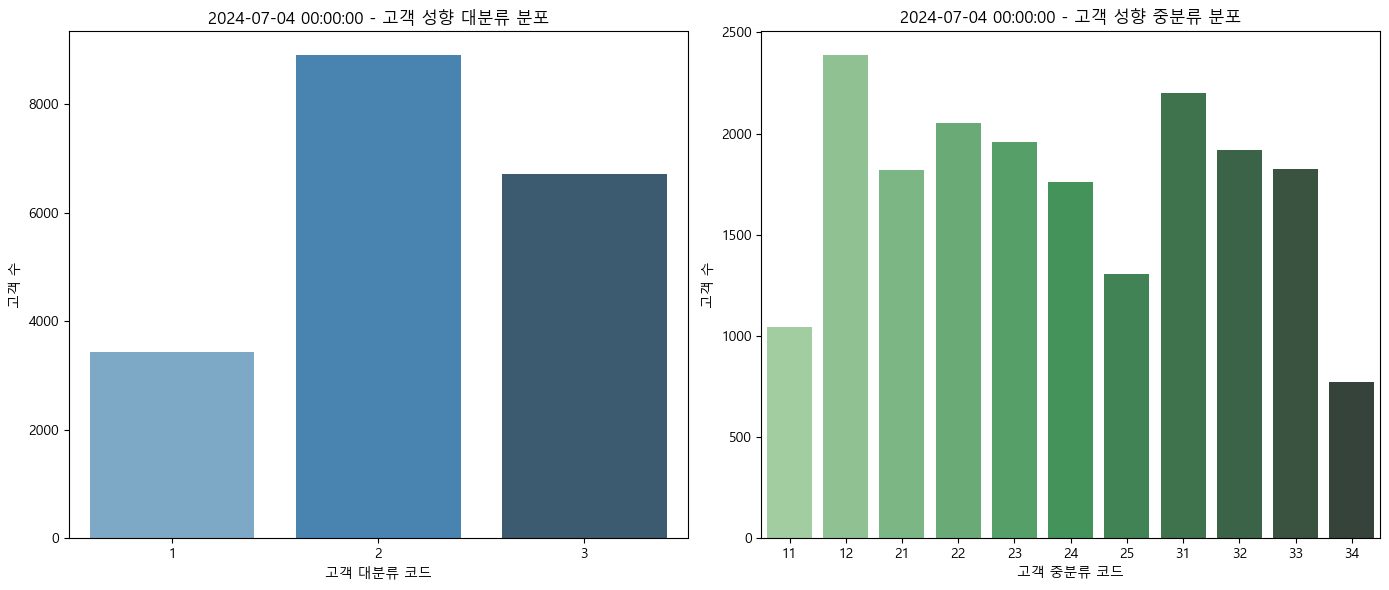

날짜: 2024-07-05 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8886명
  - 대분류 코드 3: 6713명
  - 대분류 코드 1: 3428명
중분류 코드별 분포:
  - 중분류 코드 12: 2386명
  - 중분류 코드 31: 2200명
  - 중분류 코드 22: 2048명
  - 중분류 코드 23: 1963명
  - 중분류 코드 32: 1912명
  - 중분류 코드 33: 1826명
  - 중분류 코드 21: 1817명
  - 중분류 코드 24: 1757명
  - 중분류 코드 25: 1301명
  - 중분류 코드 11: 1042명
  - 중분류 코드 34: 775명
가장 많이 분포된 대분류 코드: 2 (8886명)
가장 많이 분포된 중분류 코드: 12 (2386명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


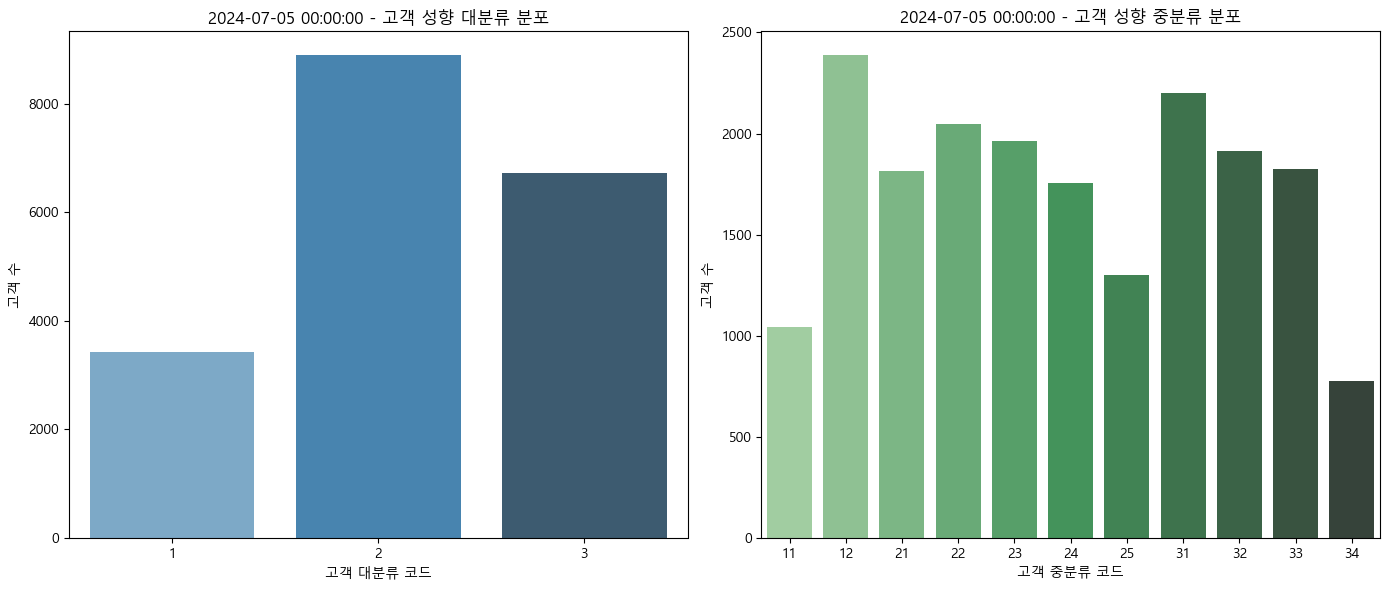

날짜: 2024-07-08 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8877명
  - 대분류 코드 3: 6718명
  - 대분류 코드 1: 3424명
중분류 코드별 분포:
  - 중분류 코드 12: 2383명
  - 중분류 코드 31: 2200명
  - 중분류 코드 22: 2050명
  - 중분류 코드 23: 1962명
  - 중분류 코드 32: 1912명
  - 중분류 코드 33: 1834명
  - 중분류 코드 21: 1810명
  - 중분류 코드 24: 1759명
  - 중분류 코드 25: 1296명
  - 중분류 코드 11: 1041명
  - 중분류 코드 34: 772명
가장 많이 분포된 대분류 코드: 2 (8877명)
가장 많이 분포된 중분류 코드: 12 (2383명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


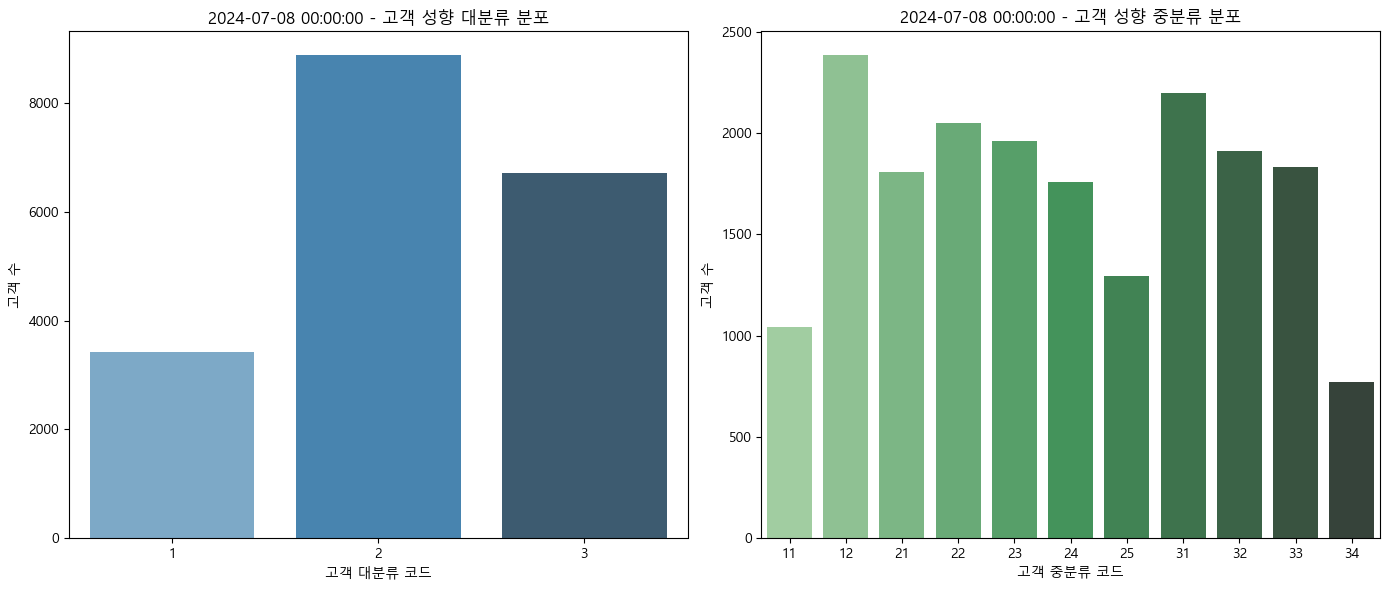

날짜: 2024-07-09 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8880명
  - 대분류 코드 3: 6721명
  - 대분류 코드 1: 3426명
중분류 코드별 분포:
  - 중분류 코드 12: 2382명
  - 중분류 코드 31: 2197명
  - 중분류 코드 22: 2052명
  - 중분류 코드 23: 1961명
  - 중분류 코드 32: 1914명
  - 중분류 코드 33: 1841명
  - 중분류 코드 21: 1815명
  - 중분류 코드 24: 1758명
  - 중분류 코드 25: 1294명
  - 중분류 코드 11: 1044명
  - 중분류 코드 34: 769명
가장 많이 분포된 대분류 코드: 2 (8880명)
가장 많이 분포된 중분류 코드: 12 (2382명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


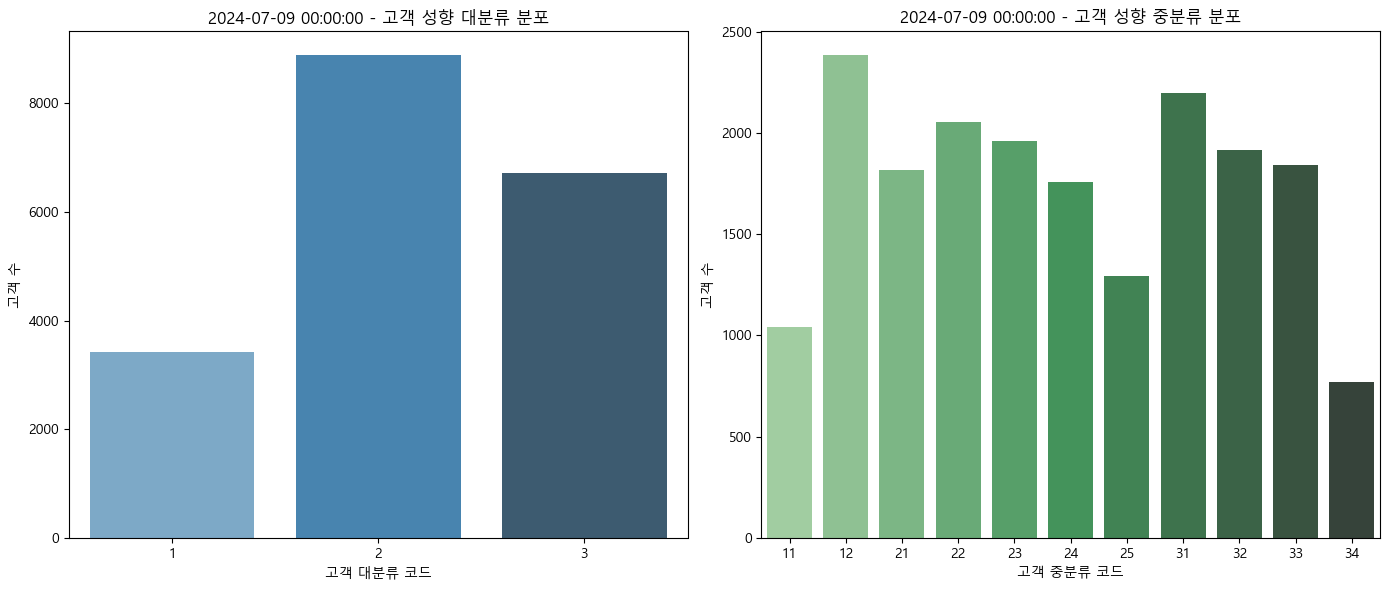

날짜: 2024-07-10 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8892명
  - 대분류 코드 3: 6729명
  - 대분류 코드 1: 3434명
중분류 코드별 분포:
  - 중분류 코드 12: 2389명
  - 중분류 코드 31: 2200명
  - 중분류 코드 22: 2053명
  - 중분류 코드 23: 1967명
  - 중분류 코드 32: 1914명
  - 중분류 코드 33: 1845명
  - 중분류 코드 21: 1816명
  - 중분류 코드 24: 1761명
  - 중분류 코드 25: 1295명
  - 중분류 코드 11: 1045명
  - 중분류 코드 34: 770명
가장 많이 분포된 대분류 코드: 2 (8892명)
가장 많이 분포된 중분류 코드: 12 (2389명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


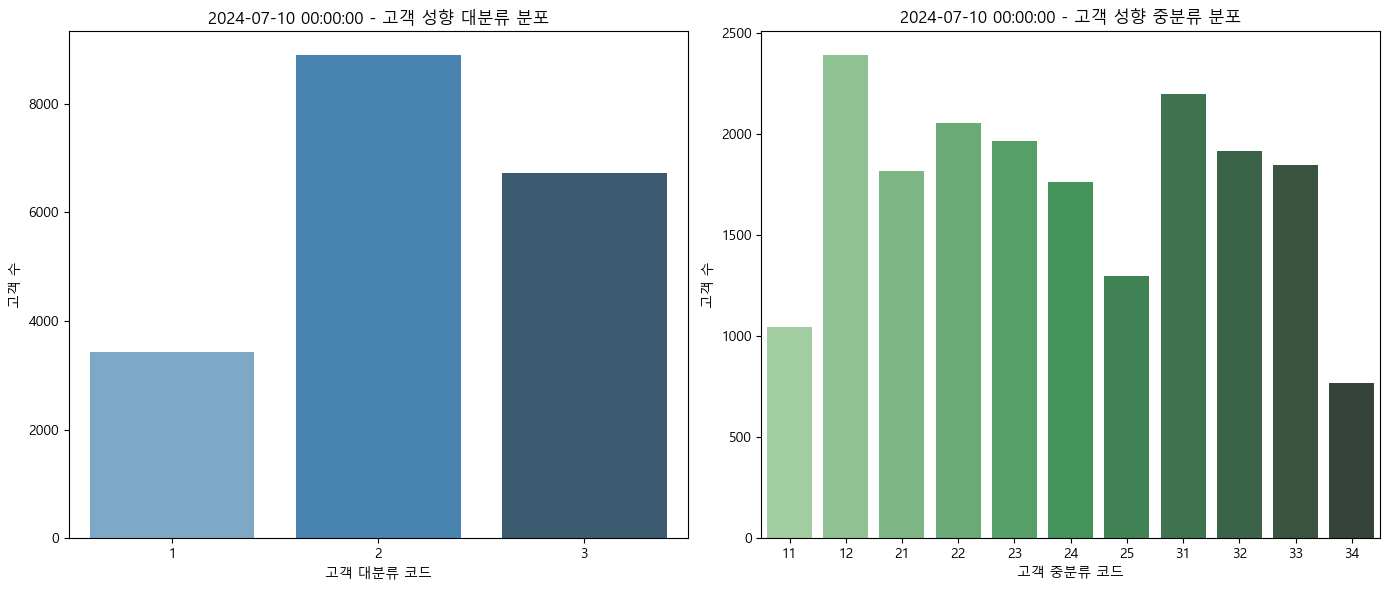

날짜: 2024-07-11 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8879명
  - 대분류 코드 3: 6730명
  - 대분류 코드 1: 3428명
중분류 코드별 분포:
  - 중분류 코드 12: 2387명
  - 중분류 코드 31: 2199명
  - 중분류 코드 22: 2051명
  - 중분류 코드 23: 1967명
  - 중분류 코드 32: 1916명
  - 중분류 코드 33: 1842명
  - 중분류 코드 21: 1814명
  - 중분류 코드 24: 1758명
  - 중분류 코드 25: 1289명
  - 중분류 코드 11: 1041명
  - 중분류 코드 34: 773명
가장 많이 분포된 대분류 코드: 2 (8879명)
가장 많이 분포된 중분류 코드: 12 (2387명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


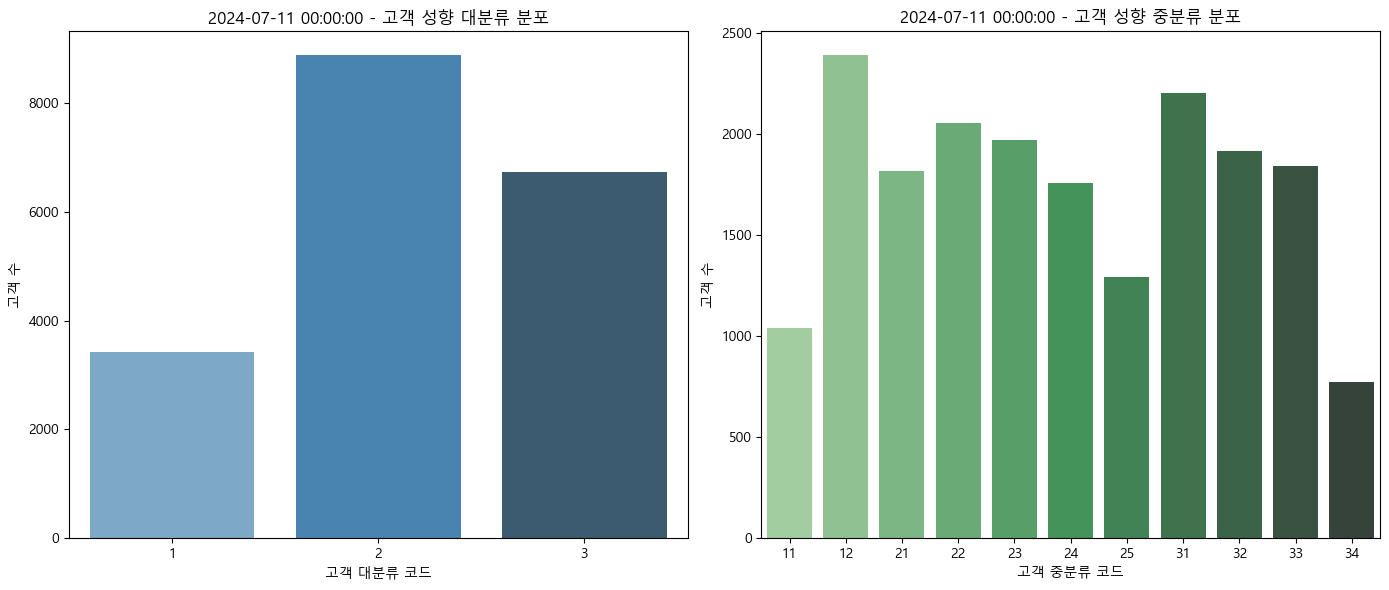

날짜: 2024-07-12 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8866명
  - 대분류 코드 3: 6708명
  - 대분류 코드 1: 3425명
중분류 코드별 분포:
  - 중분류 코드 12: 2386명
  - 중분류 코드 31: 2200명
  - 중분류 코드 22: 2051명
  - 중분류 코드 23: 1953명
  - 중분류 코드 32: 1914명
  - 중분류 코드 33: 1830명
  - 중분류 코드 21: 1816명
  - 중분류 코드 24: 1753명
  - 중분류 코드 25: 1293명
  - 중분류 코드 11: 1039명
  - 중분류 코드 34: 764명
가장 많이 분포된 대분류 코드: 2 (8866명)
가장 많이 분포된 중분류 코드: 12 (2386명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


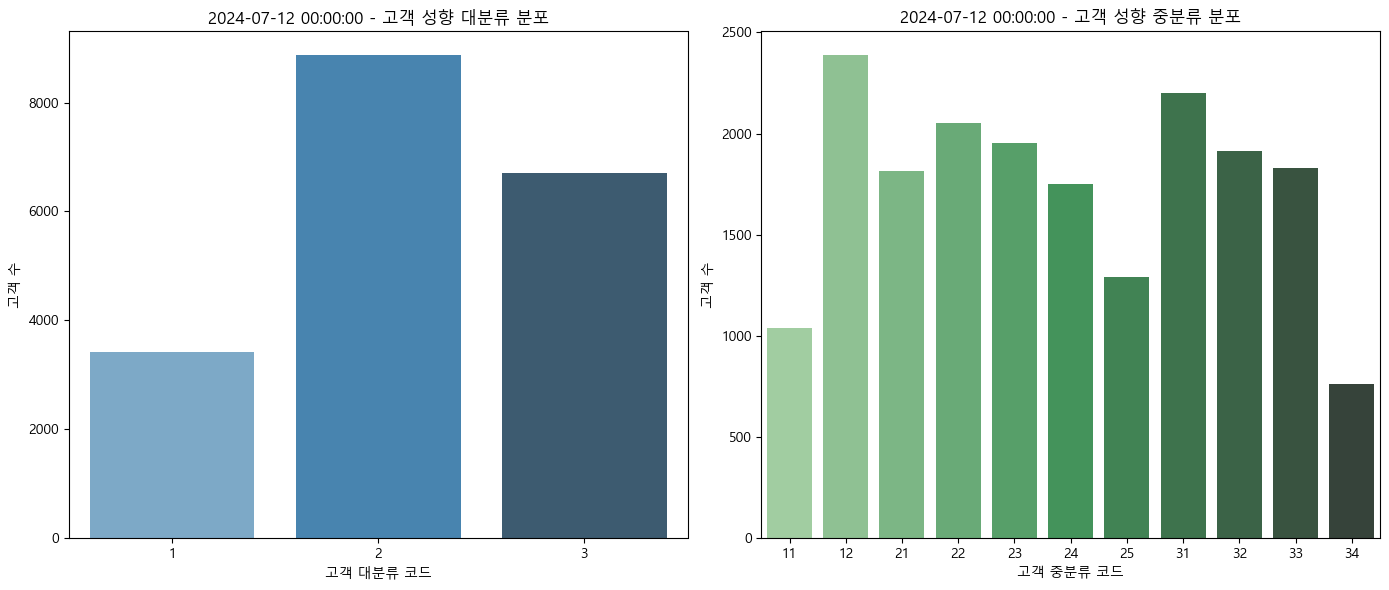

날짜: 2024-07-15 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8850명
  - 대분류 코드 3: 6709명
  - 대분류 코드 1: 3420명
중분류 코드별 분포:
  - 중분류 코드 12: 2380명
  - 중분류 코드 31: 2191명
  - 중분류 코드 22: 2052명
  - 중분류 코드 23: 1945명
  - 중분류 코드 32: 1920명
  - 중분류 코드 33: 1823명
  - 중분류 코드 21: 1811명
  - 중분류 코드 24: 1753명
  - 중분류 코드 25: 1289명
  - 중분류 코드 11: 1040명
  - 중분류 코드 34: 775명
가장 많이 분포된 대분류 코드: 2 (8850명)
가장 많이 분포된 중분류 코드: 12 (2380명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


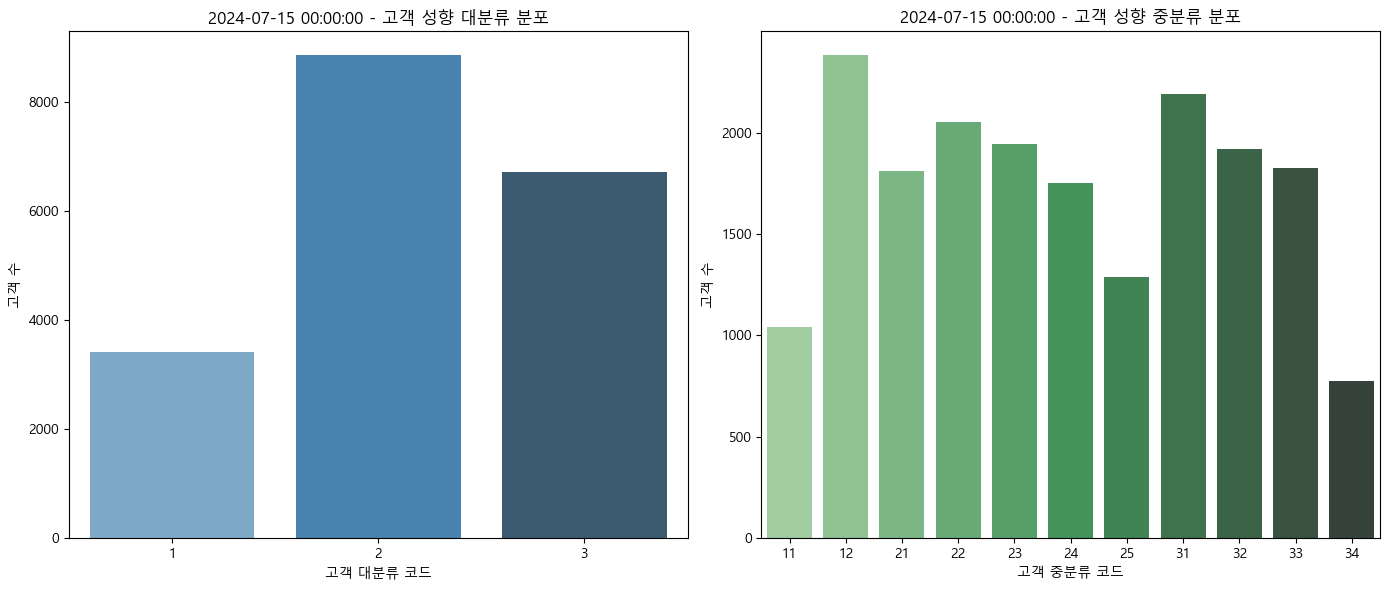

날짜: 2024-07-16 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8871명
  - 대분류 코드 3: 6727명
  - 대분류 코드 1: 3432명
중분류 코드별 분포:
  - 중분류 코드 12: 2390명
  - 중분류 코드 31: 2200명
  - 중분류 코드 22: 2057명
  - 중분류 코드 23: 1953명
  - 중분류 코드 32: 1923명
  - 중분류 코드 33: 1819명
  - 중분류 코드 21: 1811명
  - 중분류 코드 24: 1756명
  - 중분류 코드 25: 1294명
  - 중분류 코드 11: 1042명
  - 중분류 코드 34: 785명
가장 많이 분포된 대분류 코드: 2 (8871명)
가장 많이 분포된 중분류 코드: 12 (2390명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


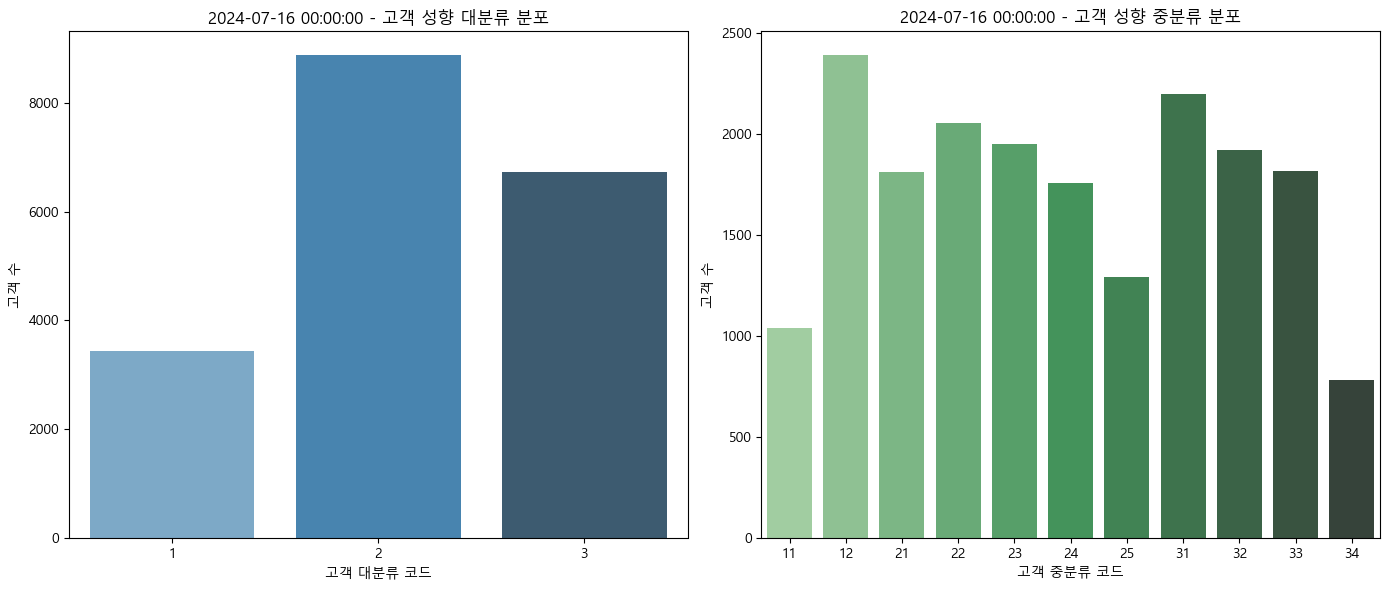

날짜: 2024-07-17 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8863명
  - 대분류 코드 3: 6731명
  - 대분류 코드 1: 3434명
중분류 코드별 분포:
  - 중분류 코드 12: 2394명
  - 중분류 코드 31: 2201명
  - 중분류 코드 22: 2055명
  - 중분류 코드 23: 1946명
  - 중분류 코드 32: 1923명
  - 중분류 코드 33: 1824명
  - 중분류 코드 21: 1813명
  - 중분류 코드 24: 1757명
  - 중분류 코드 25: 1292명
  - 중분류 코드 11: 1040명
  - 중분류 코드 34: 783명
가장 많이 분포된 대분류 코드: 2 (8863명)
가장 많이 분포된 중분류 코드: 12 (2394명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


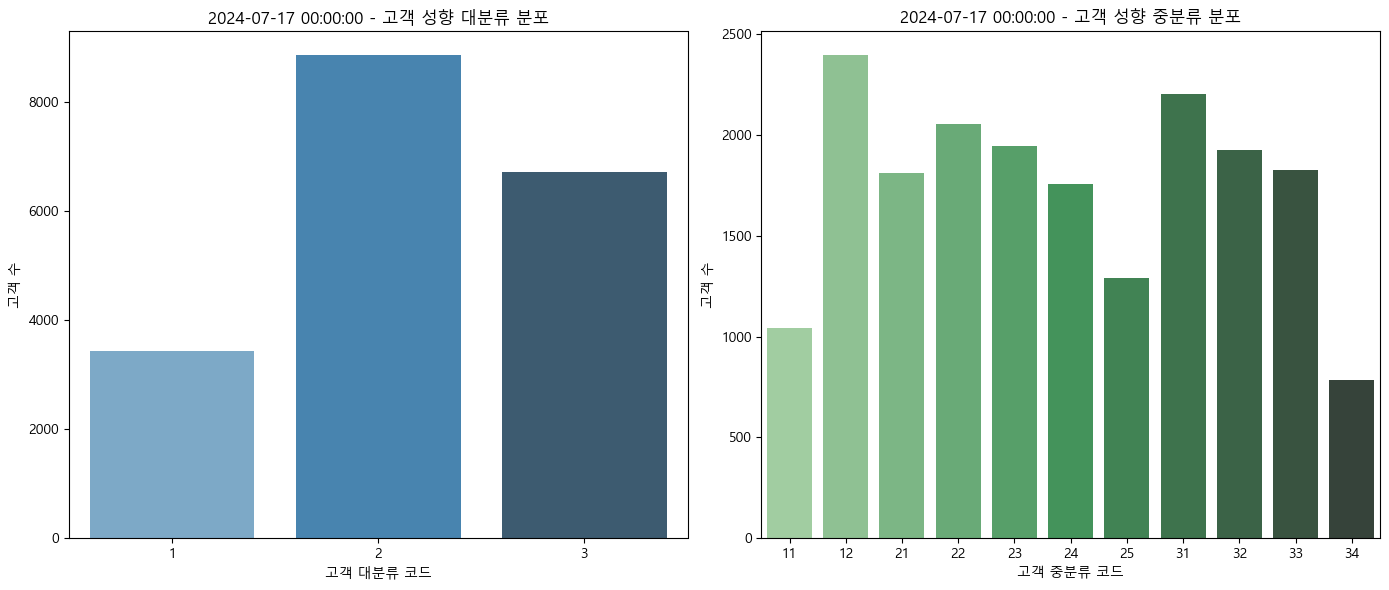

날짜: 2024-07-18 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8867명
  - 대분류 코드 3: 6734명
  - 대분류 코드 1: 3439명
중분류 코드별 분포:
  - 중분류 코드 12: 2397명
  - 중분류 코드 31: 2208명
  - 중분류 코드 22: 2055명
  - 중분류 코드 23: 1957명
  - 중분류 코드 32: 1931명
  - 중분류 코드 33: 1820명
  - 중분류 코드 21: 1809명
  - 중분류 코드 24: 1755명
  - 중분류 코드 25: 1291명
  - 중분류 코드 11: 1042명
  - 중분류 코드 34: 775명
가장 많이 분포된 대분류 코드: 2 (8867명)
가장 많이 분포된 중분류 코드: 12 (2397명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


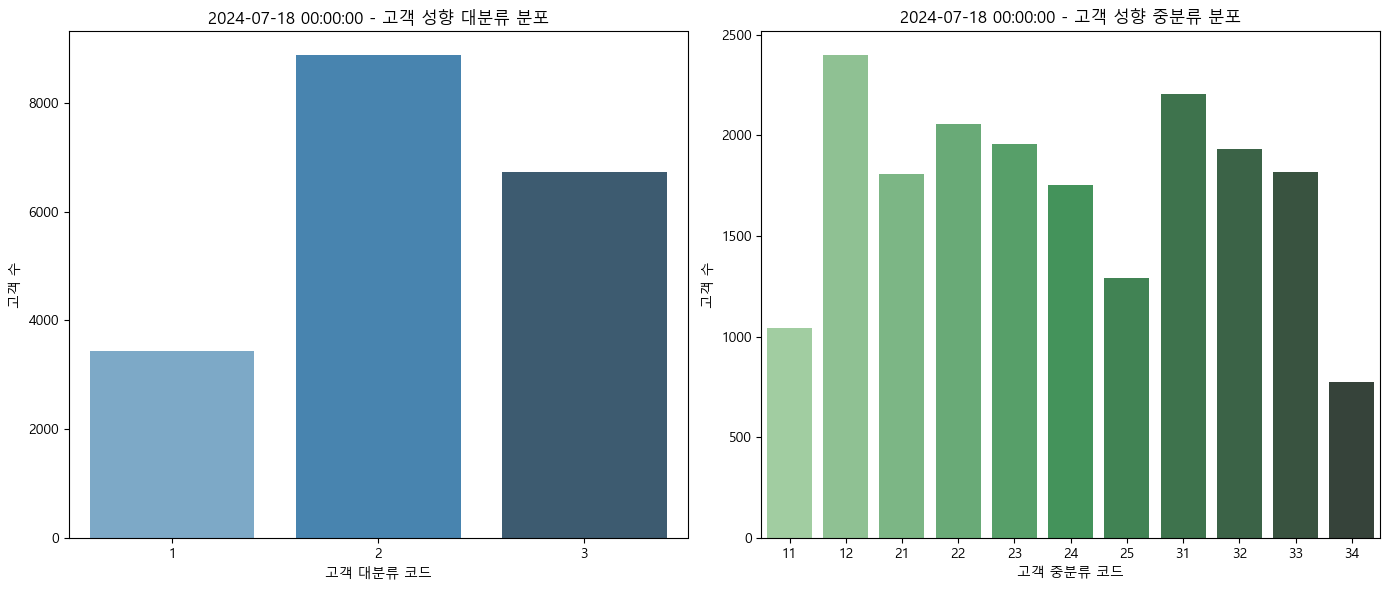

날짜: 2024-07-19 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8866명
  - 대분류 코드 3: 6714명
  - 대분류 코드 1: 3442명
중분류 코드별 분포:
  - 중분류 코드 12: 2401명
  - 중분류 코드 31: 2212명
  - 중분류 코드 22: 2052명
  - 중분류 코드 23: 1959명
  - 중분류 코드 32: 1928명
  - 중분류 코드 33: 1807명
  - 중분류 코드 21: 1805명
  - 중분류 코드 24: 1759명
  - 중분류 코드 25: 1291명
  - 중분류 코드 11: 1041명
  - 중분류 코드 34: 767명
가장 많이 분포된 대분류 코드: 2 (8866명)
가장 많이 분포된 중분류 코드: 12 (2401명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


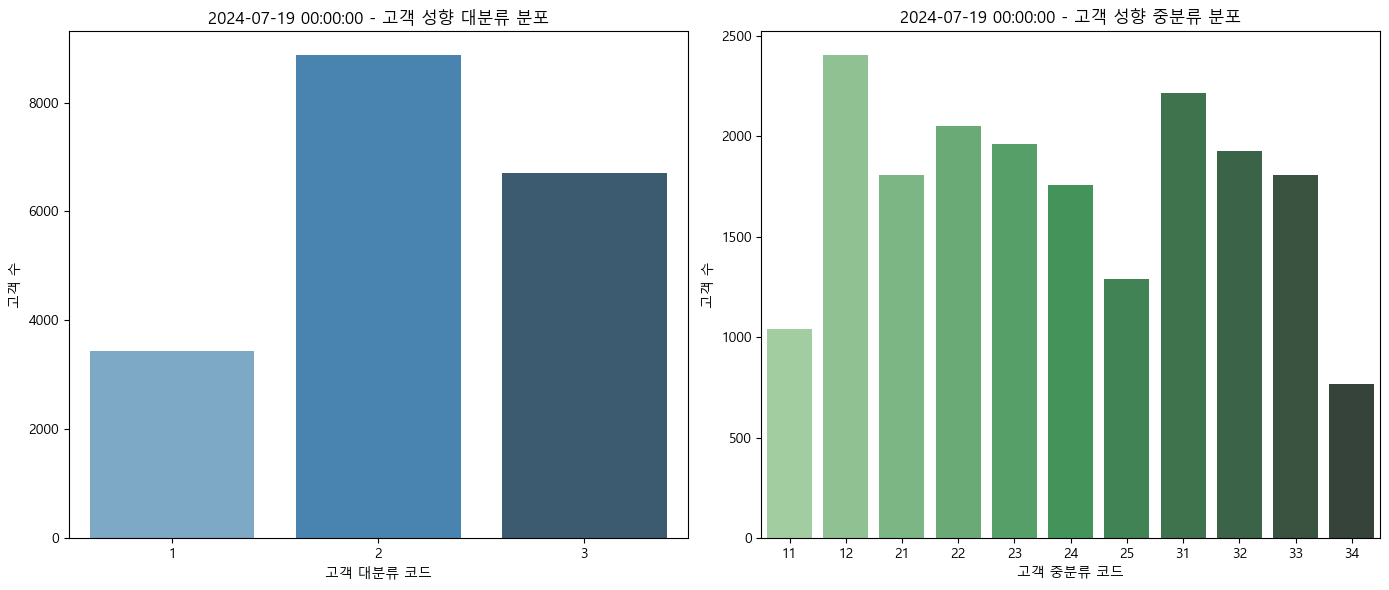

날짜: 2024-07-22 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8859명
  - 대분류 코드 3: 6708명
  - 대분류 코드 1: 3436명
중분류 코드별 분포:
  - 중분류 코드 12: 2398명
  - 중분류 코드 31: 2214명
  - 중분류 코드 22: 2051명
  - 중분류 코드 23: 1959명
  - 중분류 코드 32: 1922명
  - 중분류 코드 33: 1808명
  - 중분류 코드 21: 1808명
  - 중분류 코드 24: 1753명
  - 중분류 코드 25: 1288명
  - 중분류 코드 11: 1038명
  - 중분류 코드 34: 764명
가장 많이 분포된 대분류 코드: 2 (8859명)
가장 많이 분포된 중분류 코드: 12 (2398명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


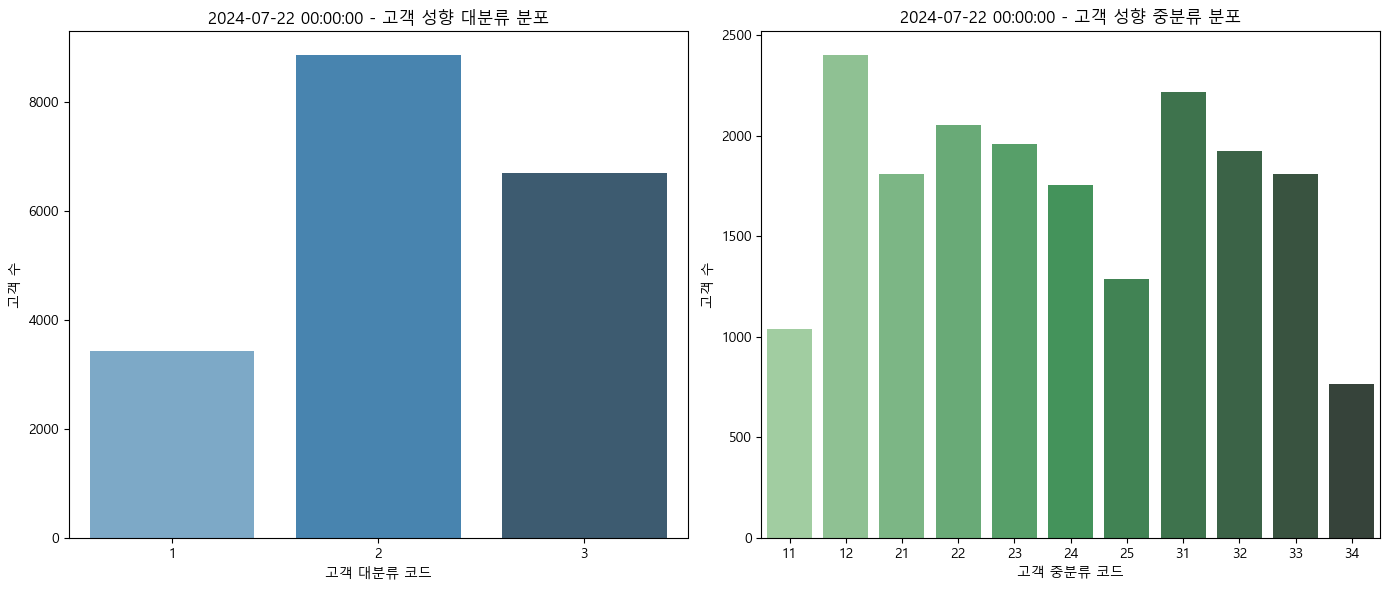

날짜: 2024-07-23 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8883명
  - 대분류 코드 3: 6733명
  - 대분류 코드 1: 3444명
중분류 코드별 분포:
  - 중분류 코드 12: 2405명
  - 중분류 코드 31: 2210명
  - 중분류 코드 22: 2061명
  - 중분류 코드 23: 1960명
  - 중분류 코드 32: 1934명
  - 중분류 코드 33: 1810명
  - 중분류 코드 21: 1806명
  - 중분류 코드 24: 1761명
  - 중분류 코드 25: 1295명
  - 중분류 코드 11: 1039명
  - 중분류 코드 34: 779명
가장 많이 분포된 대분류 코드: 2 (8883명)
가장 많이 분포된 중분류 코드: 12 (2405명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


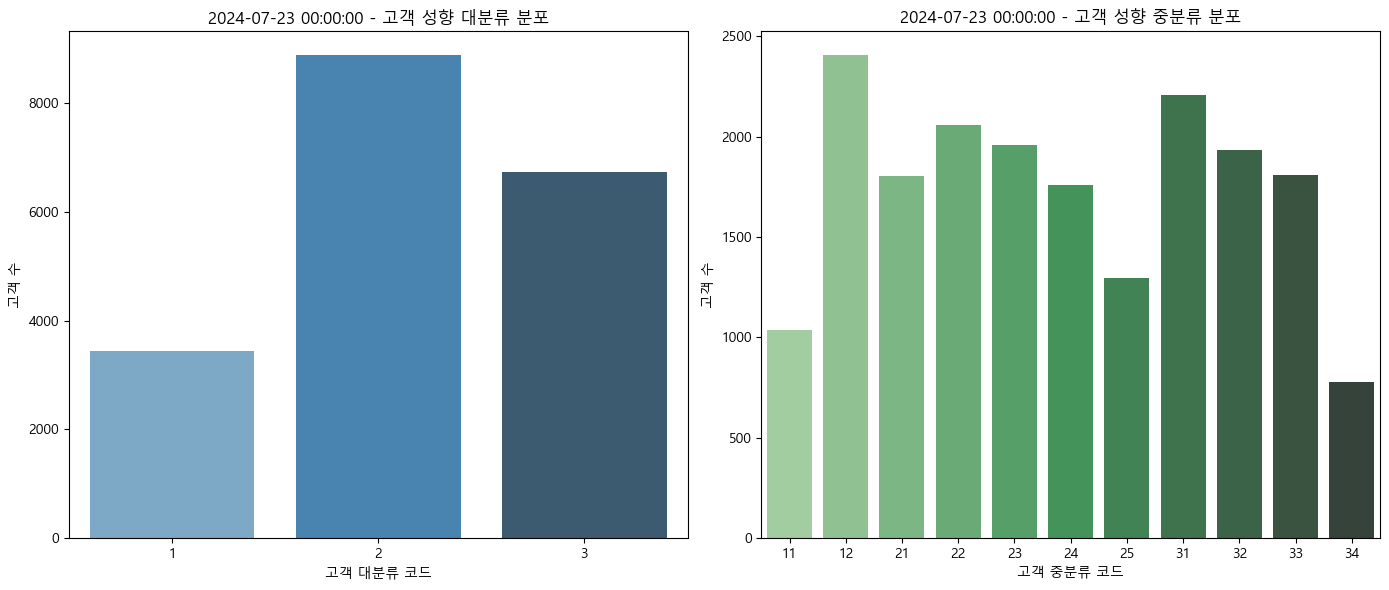

날짜: 2024-07-24 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8879명
  - 대분류 코드 3: 6735명
  - 대분류 코드 1: 3445명
중분류 코드별 분포:
  - 중분류 코드 12: 2408명
  - 중분류 코드 31: 2211명
  - 중분류 코드 22: 2064명
  - 중분류 코드 23: 1966명
  - 중분류 코드 32: 1933명
  - 중분류 코드 33: 1817명
  - 중분류 코드 21: 1805명
  - 중분류 코드 24: 1754명
  - 중분류 코드 25: 1290명
  - 중분류 코드 11: 1037명
  - 중분류 코드 34: 774명
가장 많이 분포된 대분류 코드: 2 (8879명)
가장 많이 분포된 중분류 코드: 12 (2408명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


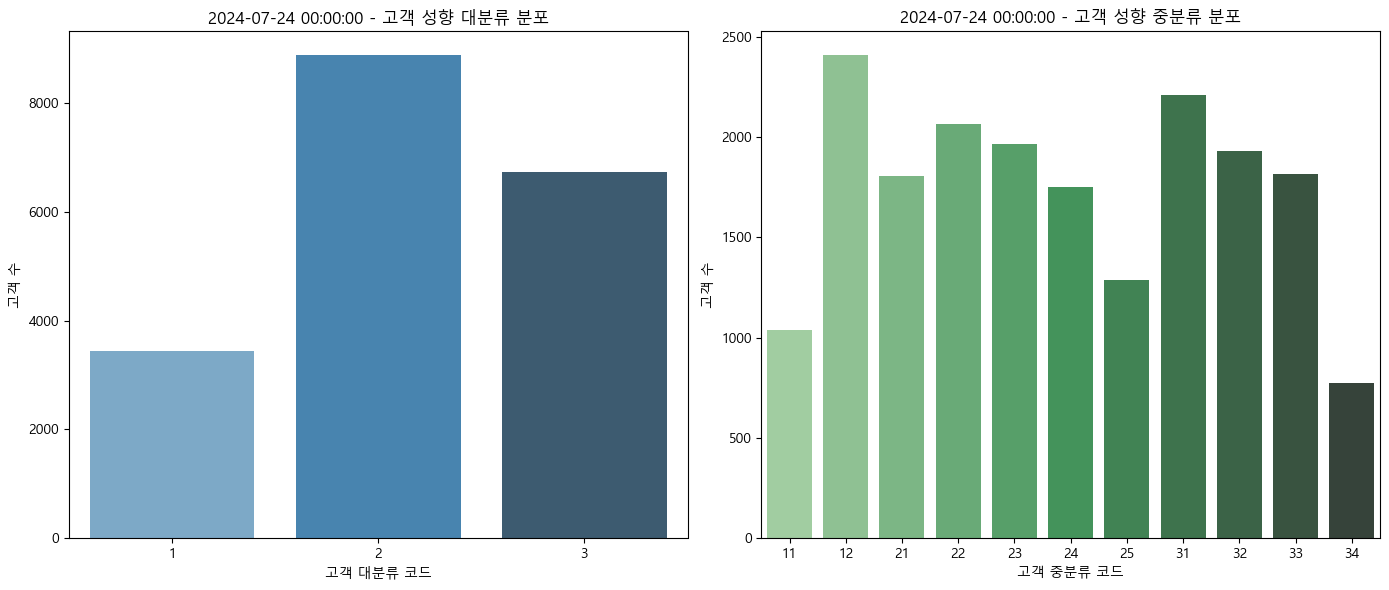

날짜: 2024-07-25 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8876명
  - 대분류 코드 3: 6707명
  - 대분류 코드 1: 3439명
중분류 코드별 분포:
  - 중분류 코드 12: 2398명
  - 중분류 코드 31: 2220명
  - 중분류 코드 22: 2060명
  - 중분류 코드 23: 1970명
  - 중분류 코드 32: 1919명
  - 중분류 코드 33: 1807명
  - 중분류 코드 21: 1799명
  - 중분류 코드 24: 1758명
  - 중분류 코드 25: 1289명
  - 중분류 코드 11: 1041명
  - 중분류 코드 34: 761명
가장 많이 분포된 대분류 코드: 2 (8876명)
가장 많이 분포된 중분류 코드: 12 (2398명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


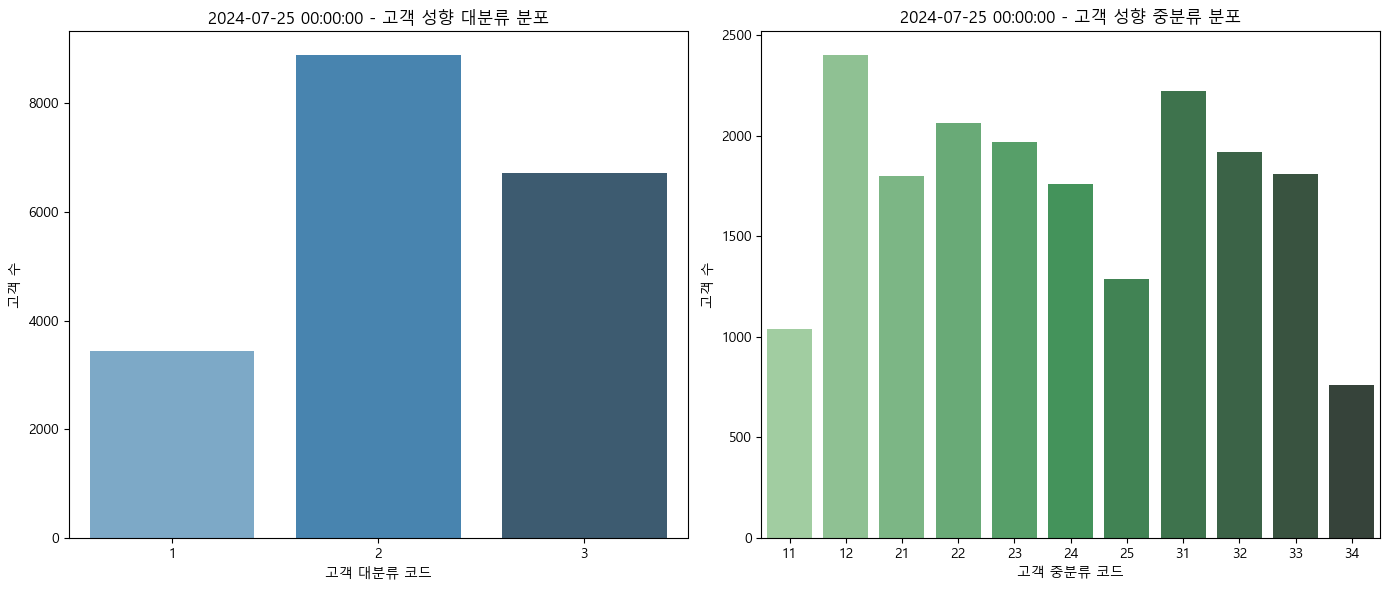

날짜: 2024-07-26 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8868명
  - 대분류 코드 3: 6705명
  - 대분류 코드 1: 3443명
중분류 코드별 분포:
  - 중분류 코드 12: 2397명
  - 중분류 코드 31: 2220명
  - 중분류 코드 22: 2062명
  - 중분류 코드 23: 1964명
  - 중분류 코드 32: 1918명
  - 중분류 코드 33: 1808명
  - 중분류 코드 21: 1797명
  - 중분류 코드 24: 1751명
  - 중분류 코드 25: 1294명
  - 중분류 코드 11: 1046명
  - 중분류 코드 34: 759명
가장 많이 분포된 대분류 코드: 2 (8868명)
가장 많이 분포된 중분류 코드: 12 (2397명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


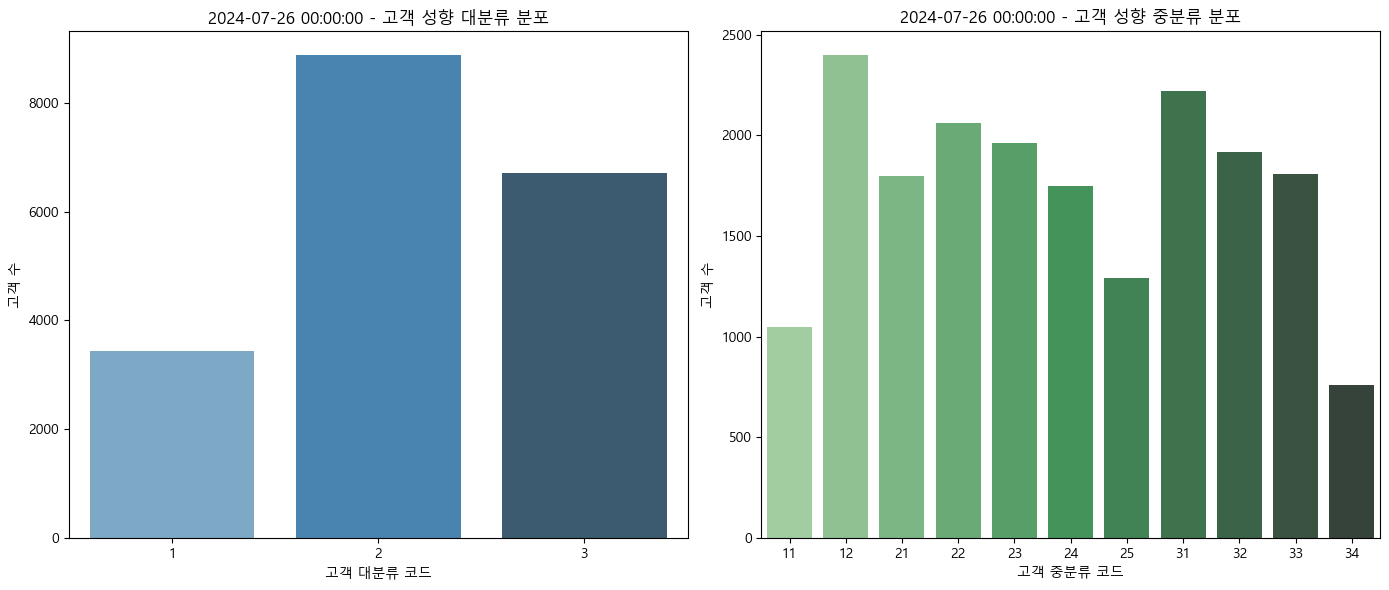

날짜: 2024-07-29 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8887명
  - 대분류 코드 3: 6719명
  - 대분류 코드 1: 3451명
중분류 코드별 분포:
  - 중분류 코드 12: 2404명
  - 중분류 코드 31: 2213명
  - 중분류 코드 22: 2066명
  - 중분류 코드 23: 1966명
  - 중분류 코드 32: 1936명
  - 중분류 코드 33: 1808명
  - 중분류 코드 21: 1803명
  - 중분류 코드 24: 1751명
  - 중분류 코드 25: 1301명
  - 중분류 코드 11: 1047명
  - 중분류 코드 34: 762명
가장 많이 분포된 대분류 코드: 2 (8887명)
가장 많이 분포된 중분류 코드: 12 (2404명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


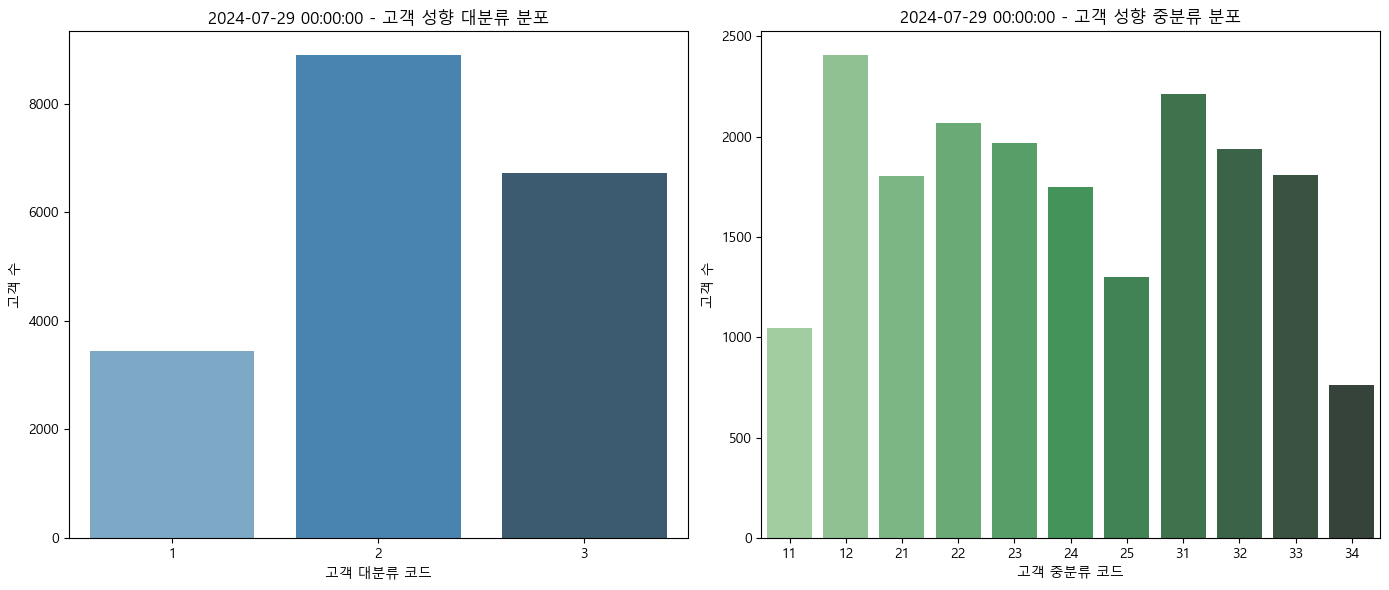

날짜: 2024-07-30 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8895명
  - 대분류 코드 3: 6723명
  - 대분류 코드 1: 3455명
중분류 코드별 분포:
  - 중분류 코드 12: 2410명
  - 중분류 코드 31: 2223명
  - 중분류 코드 22: 2070명
  - 중분류 코드 23: 1966명
  - 중분류 코드 32: 1928명
  - 중분류 코드 33: 1811명
  - 중분류 코드 21: 1805명
  - 중분류 코드 24: 1752명
  - 중분류 코드 25: 1302명
  - 중분류 코드 11: 1045명
  - 중분류 코드 34: 761명
가장 많이 분포된 대분류 코드: 2 (8895명)
가장 많이 분포된 중분류 코드: 12 (2410명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


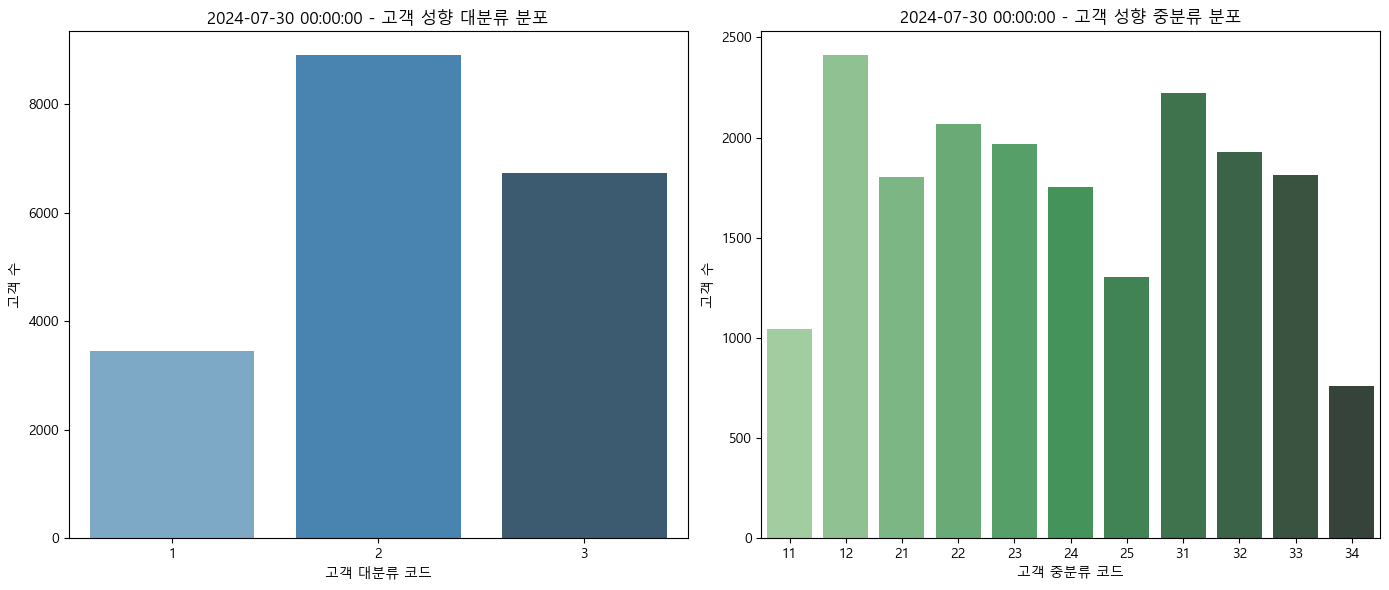

날짜: 2024-07-31 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8880명
  - 대분류 코드 3: 6716명
  - 대분류 코드 1: 3452명
중분류 코드별 분포:
  - 중분류 코드 12: 2407명
  - 중분류 코드 31: 2218명
  - 중분류 코드 22: 2063명
  - 중분류 코드 23: 1969명
  - 중분류 코드 32: 1927명
  - 중분류 코드 33: 1806명
  - 중분류 코드 21: 1795명
  - 중분류 코드 24: 1752명
  - 중분류 코드 25: 1301명
  - 중분류 코드 11: 1045명
  - 중분류 코드 34: 765명
가장 많이 분포된 대분류 코드: 2 (8880명)
가장 많이 분포된 중분류 코드: 12 (2407명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


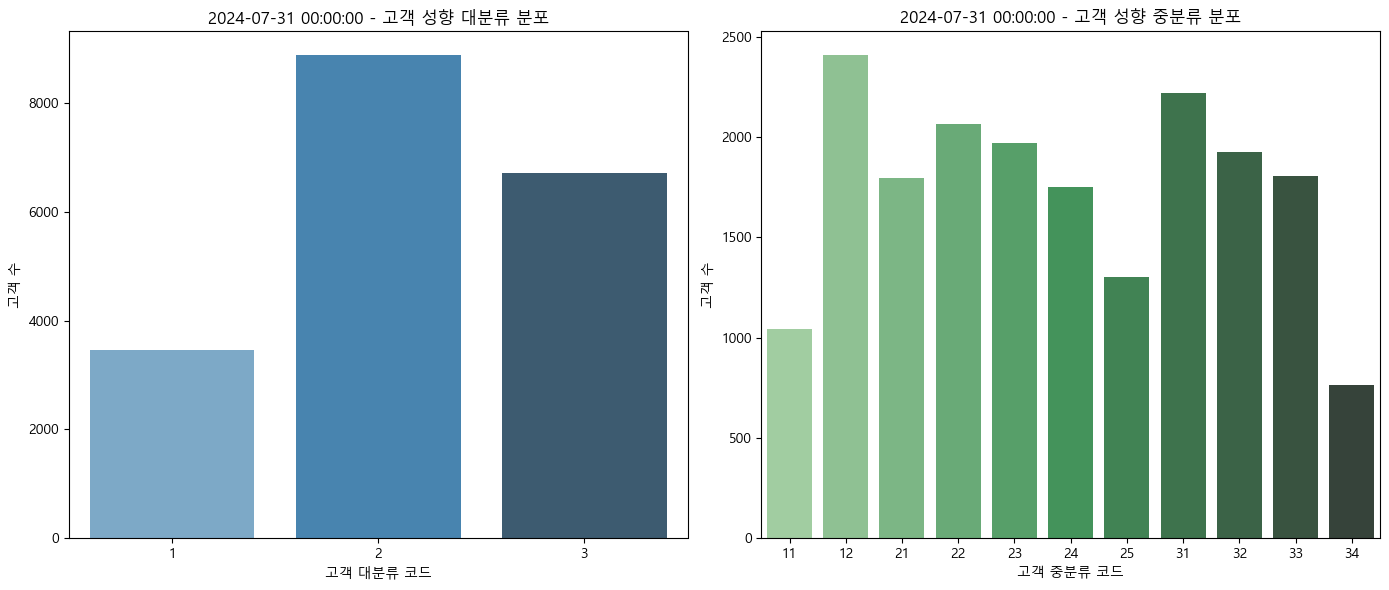

날짜: 2024-08-01 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8863명
  - 대분류 코드 3: 6716명
  - 대분류 코드 1: 3407명
중분류 코드별 분포:
  - 중분류 코드 12: 2404명
  - 중분류 코드 31: 2211명
  - 중분류 코드 22: 2057명
  - 중분류 코드 23: 1966명
  - 중분류 코드 32: 1930명
  - 중분류 코드 33: 1803명
  - 중분류 코드 21: 1792명
  - 중분류 코드 24: 1746명
  - 중분류 코드 25: 1302명
  - 중분류 코드 11: 1003명
  - 중분류 코드 34: 772명
가장 많이 분포된 대분류 코드: 2 (8863명)
가장 많이 분포된 중분류 코드: 12 (2404명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


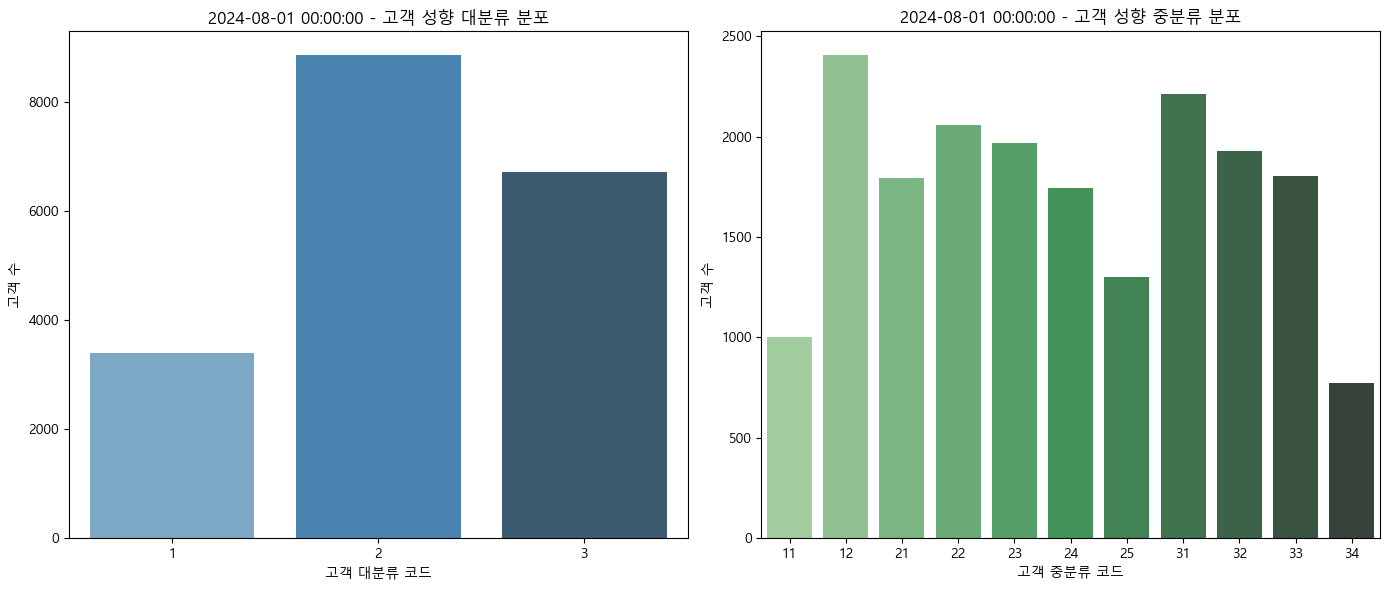

날짜: 2024-08-02 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8833명
  - 대분류 코드 3: 6650명
  - 대분류 코드 1: 3398명
중분류 코드별 분포:
  - 중분류 코드 12: 2396명
  - 중분류 코드 31: 2204명
  - 중분류 코드 22: 2042명
  - 중분류 코드 23: 1967명
  - 중분류 코드 32: 1914명
  - 중분류 코드 21: 1784명
  - 중분류 코드 33: 1782명
  - 중분류 코드 24: 1740명
  - 중분류 코드 25: 1300명
  - 중분류 코드 11: 1002명
  - 중분류 코드 34: 750명
가장 많이 분포된 대분류 코드: 2 (8833명)
가장 많이 분포된 중분류 코드: 12 (2396명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


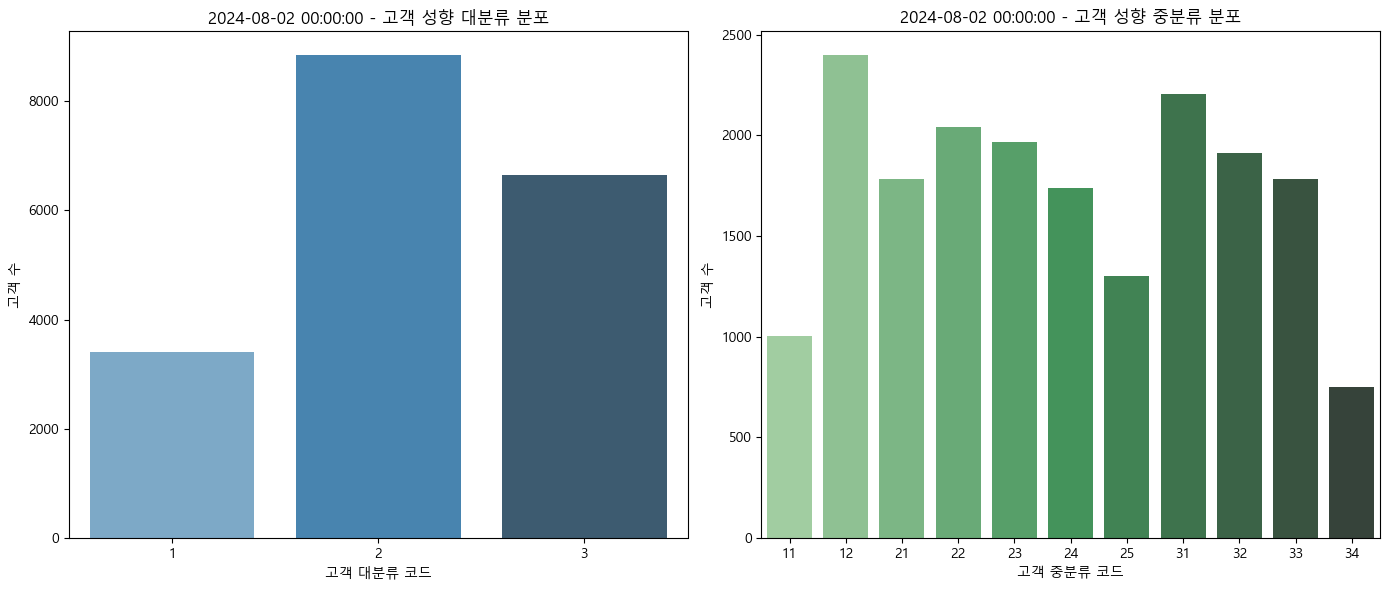

날짜: 2024-08-05 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8792명
  - 대분류 코드 3: 6617명
  - 대분류 코드 1: 3382명
중분류 코드별 분포:
  - 중분류 코드 12: 2389명
  - 중분류 코드 31: 2209명
  - 중분류 코드 22: 2029명
  - 중분류 코드 23: 1964명
  - 중분류 코드 32: 1905명
  - 중분류 코드 21: 1774명
  - 중분류 코드 33: 1753명
  - 중분류 코드 24: 1739명
  - 중분류 코드 25: 1286명
  - 중분류 코드 11: 993명
  - 중분류 코드 34: 750명
가장 많이 분포된 대분류 코드: 2 (8792명)
가장 많이 분포된 중분류 코드: 12 (2389명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


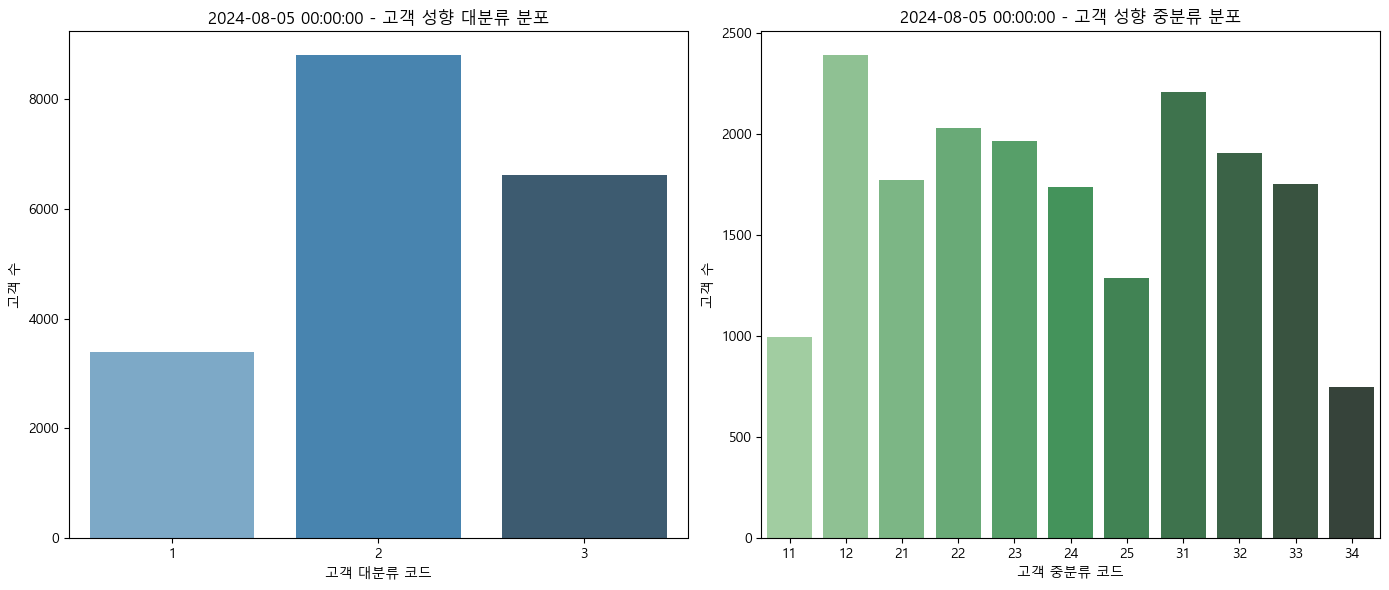

날짜: 2024-08-06 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8787명
  - 대분류 코드 3: 6601명
  - 대분류 코드 1: 3384명
중분류 코드별 분포:
  - 중분류 코드 12: 2388명
  - 중분류 코드 31: 2203명
  - 중분류 코드 22: 2025명
  - 중분류 코드 23: 1960명
  - 중분류 코드 32: 1908명
  - 중분류 코드 21: 1770명
  - 중분류 코드 33: 1749명
  - 중분류 코드 24: 1742명
  - 중분류 코드 25: 1290명
  - 중분류 코드 11: 996명
  - 중분류 코드 34: 741명
가장 많이 분포된 대분류 코드: 2 (8787명)
가장 많이 분포된 중분류 코드: 12 (2388명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


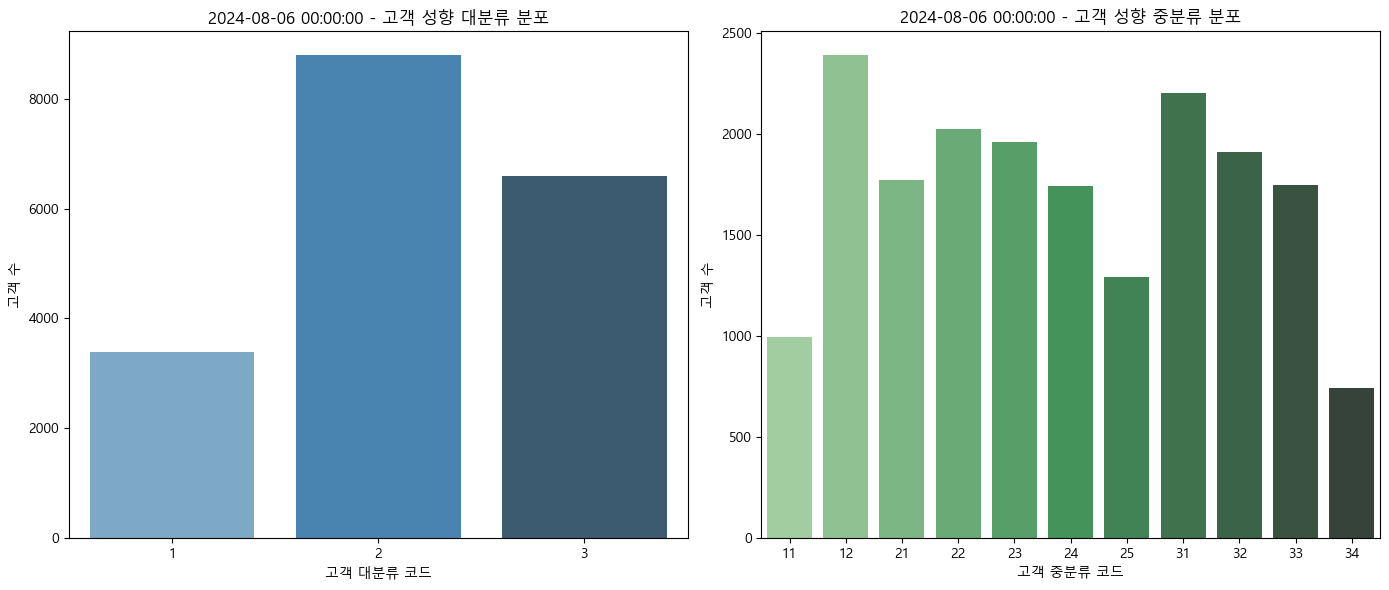

날짜: 2024-08-07 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8800명
  - 대분류 코드 3: 6636명
  - 대분류 코드 1: 3381명
중분류 코드별 분포:
  - 중분류 코드 12: 2388명
  - 중분류 코드 31: 2201명
  - 중분류 코드 22: 2026명
  - 중분류 코드 23: 1962명
  - 중분류 코드 32: 1912명
  - 중분류 코드 21: 1771명
  - 중분류 코드 33: 1760명
  - 중분류 코드 24: 1749명
  - 중분류 코드 25: 1292명
  - 중분류 코드 11: 993명
  - 중분류 코드 34: 763명
가장 많이 분포된 대분류 코드: 2 (8800명)
가장 많이 분포된 중분류 코드: 12 (2388명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


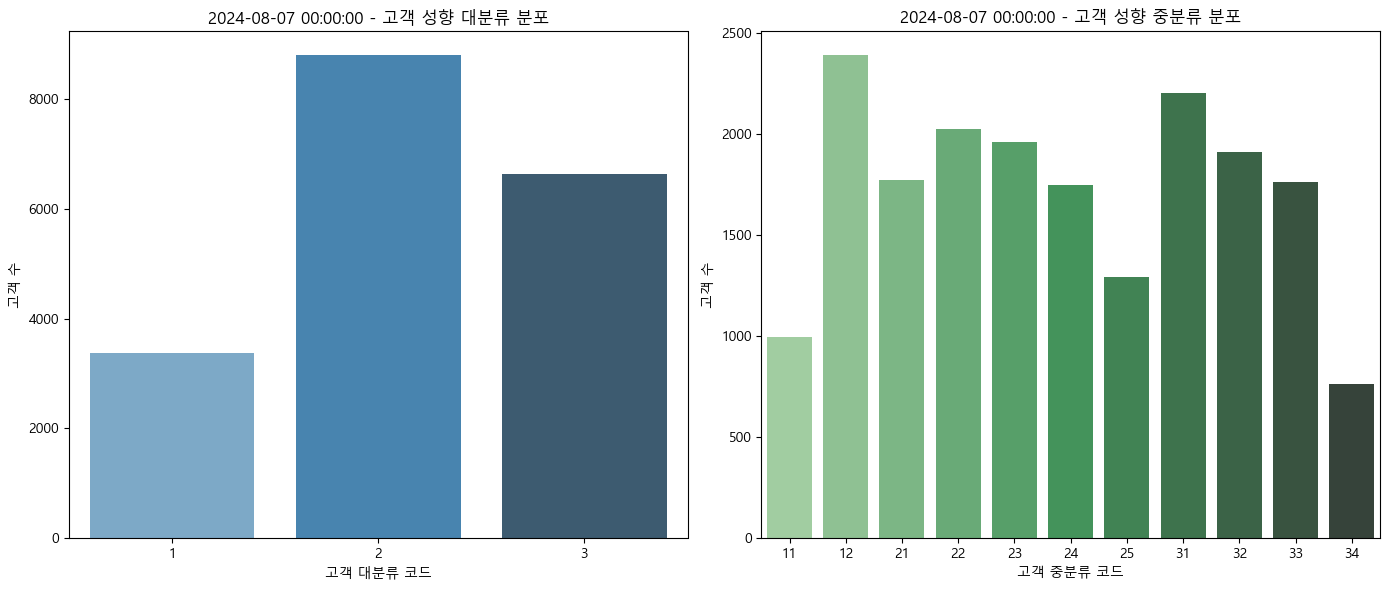

날짜: 2024-08-08 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8804명
  - 대분류 코드 3: 6632명
  - 대분류 코드 1: 3393명
중분류 코드별 분포:
  - 중분류 코드 12: 2394명
  - 중분류 코드 31: 2204명
  - 중분류 코드 22: 2033명
  - 중분류 코드 23: 1967명
  - 중분류 코드 32: 1919명
  - 중분류 코드 21: 1770명
  - 중분류 코드 33: 1757명
  - 중분류 코드 24: 1746명
  - 중분류 코드 25: 1288명
  - 중분류 코드 11: 999명
  - 중분류 코드 34: 752명
가장 많이 분포된 대분류 코드: 2 (8804명)
가장 많이 분포된 중분류 코드: 12 (2394명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


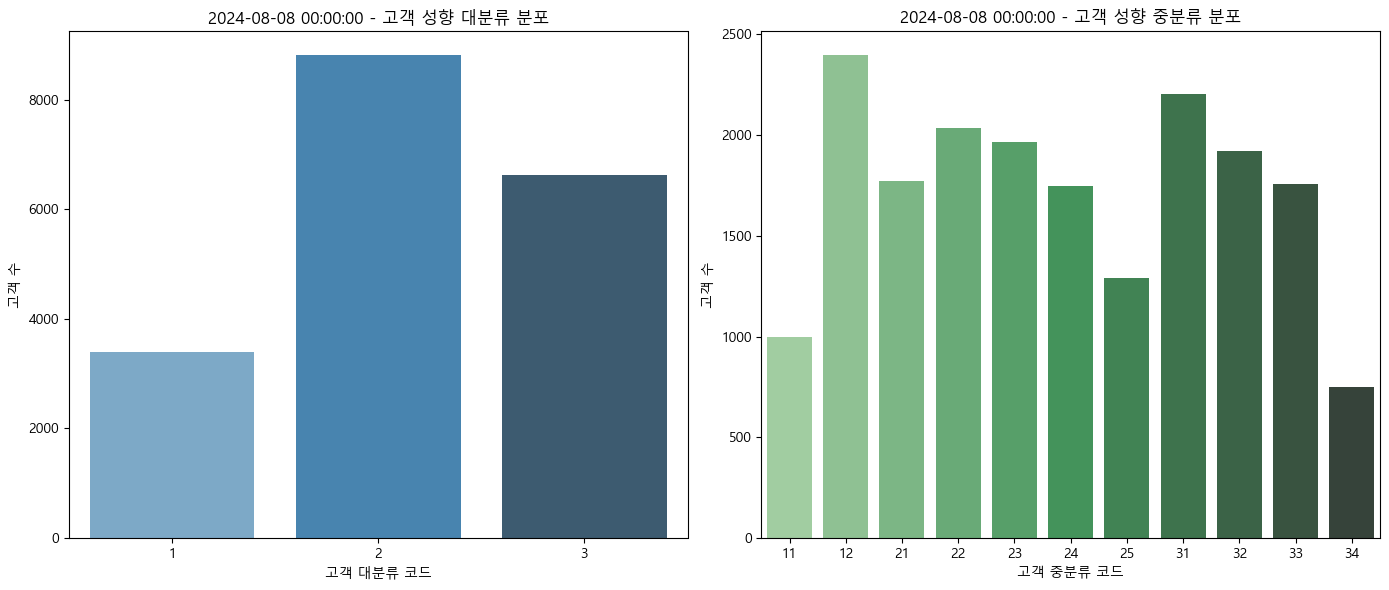

날짜: 2024-08-09 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8821명
  - 대분류 코드 3: 6655명
  - 대분류 코드 1: 3391명
중분류 코드별 분포:
  - 중분류 코드 12: 2394명
  - 중분류 코드 31: 2197명
  - 중분류 코드 22: 2034명
  - 중분류 코드 23: 1970명
  - 중분류 코드 32: 1924명
  - 중분류 코드 21: 1776명
  - 중분류 코드 33: 1773명
  - 중분류 코드 24: 1750명
  - 중분류 코드 25: 1291명
  - 중분류 코드 11: 997명
  - 중분류 코드 34: 761명
가장 많이 분포된 대분류 코드: 2 (8821명)
가장 많이 분포된 중분류 코드: 12 (2394명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


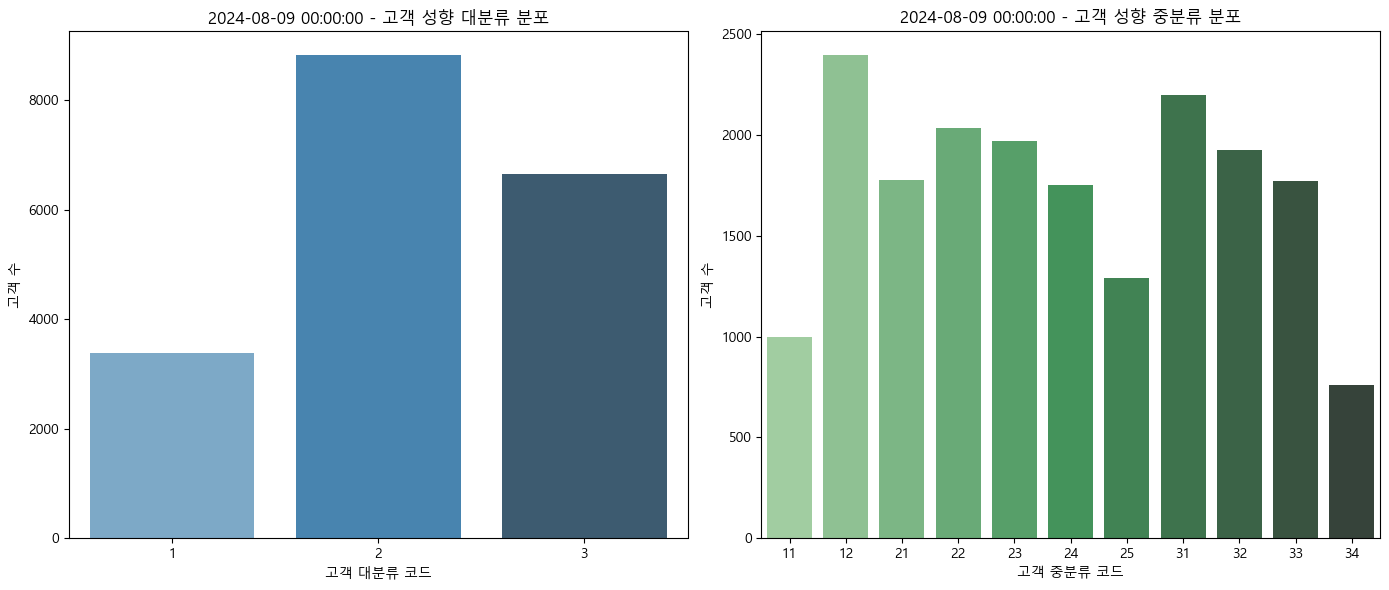

날짜: 2024-08-12 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8828명
  - 대분류 코드 3: 6651명
  - 대분류 코드 1: 3398명
중분류 코드별 분포:
  - 중분류 코드 12: 2399명
  - 중분류 코드 31: 2192명
  - 중분류 코드 22: 2039명
  - 중분류 코드 23: 1969명
  - 중분류 코드 32: 1927명
  - 중분류 코드 21: 1778명
  - 중분류 코드 33: 1773명
  - 중분류 코드 24: 1750명
  - 중분류 코드 25: 1292명
  - 중분류 코드 11: 999명
  - 중분류 코드 34: 759명
가장 많이 분포된 대분류 코드: 2 (8828명)
가장 많이 분포된 중분류 코드: 12 (2399명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


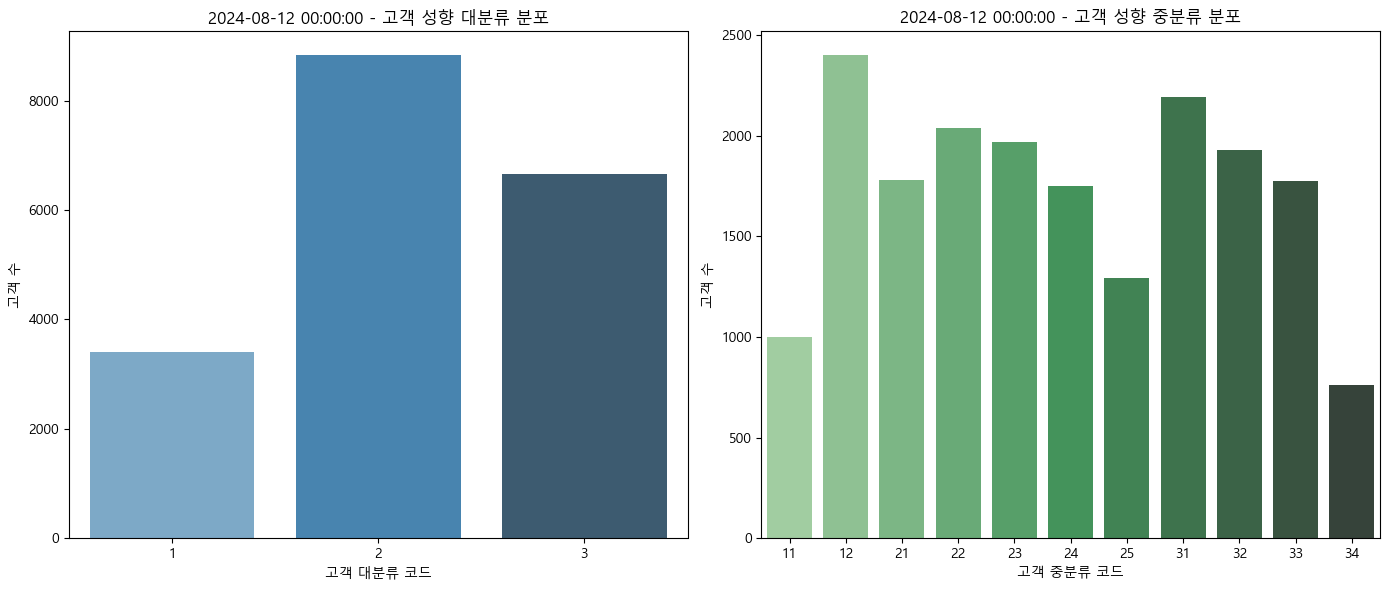

날짜: 2024-08-13 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8838명
  - 대분류 코드 3: 6663명
  - 대분류 코드 1: 3401명
중분류 코드별 분포:
  - 중분류 코드 12: 2403명
  - 중분류 코드 31: 2198명
  - 중분류 코드 22: 2041명
  - 중분류 코드 23: 1974명
  - 중분류 코드 32: 1924명
  - 중분류 코드 33: 1781명
  - 중분류 코드 21: 1781명
  - 중분류 코드 24: 1752명
  - 중분류 코드 25: 1290명
  - 중분류 코드 11: 998명
  - 중분류 코드 34: 760명
가장 많이 분포된 대분류 코드: 2 (8838명)
가장 많이 분포된 중분류 코드: 12 (2403명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


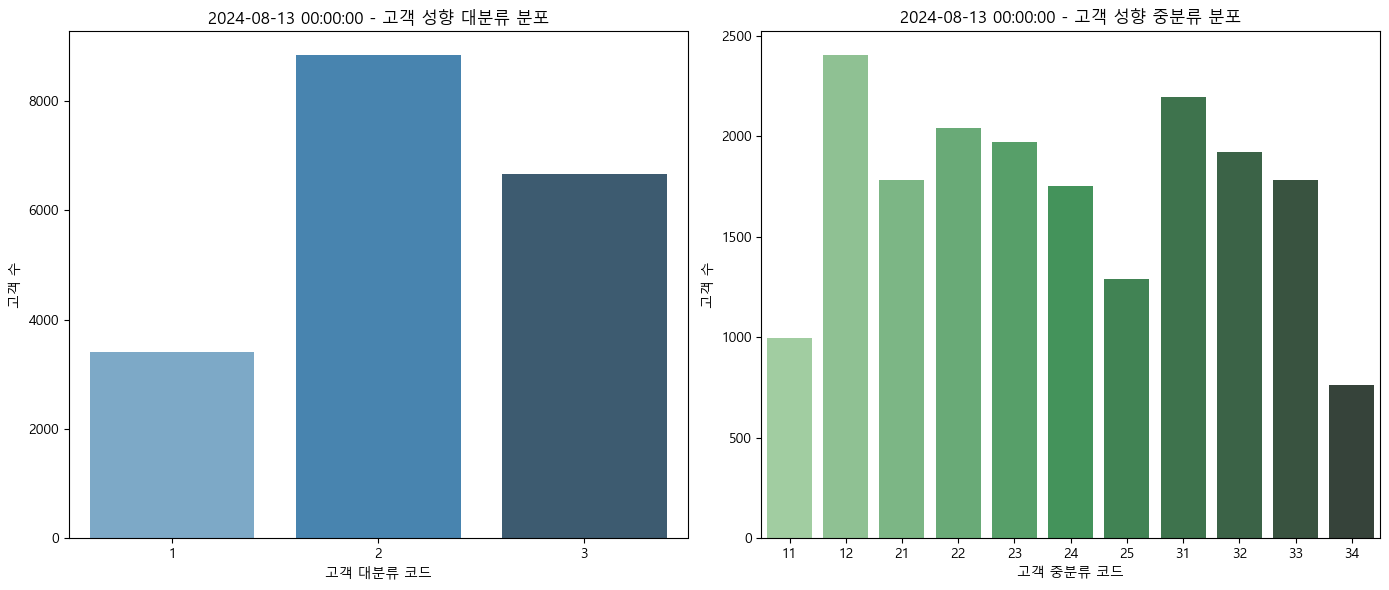

날짜: 2024-08-14 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8850명
  - 대분류 코드 3: 6675명
  - 대분류 코드 1: 3399명
중분류 코드별 분포:
  - 중분류 코드 12: 2400명
  - 중분류 코드 31: 2199명
  - 중분류 코드 22: 2048명
  - 중분류 코드 23: 1977명
  - 중분류 코드 32: 1920명
  - 중분류 코드 33: 1785명
  - 중분류 코드 21: 1783명
  - 중분류 코드 24: 1749명
  - 중분류 코드 25: 1293명
  - 중분류 코드 11: 999명
  - 중분류 코드 34: 771명
가장 많이 분포된 대분류 코드: 2 (8850명)
가장 많이 분포된 중분류 코드: 12 (2400명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


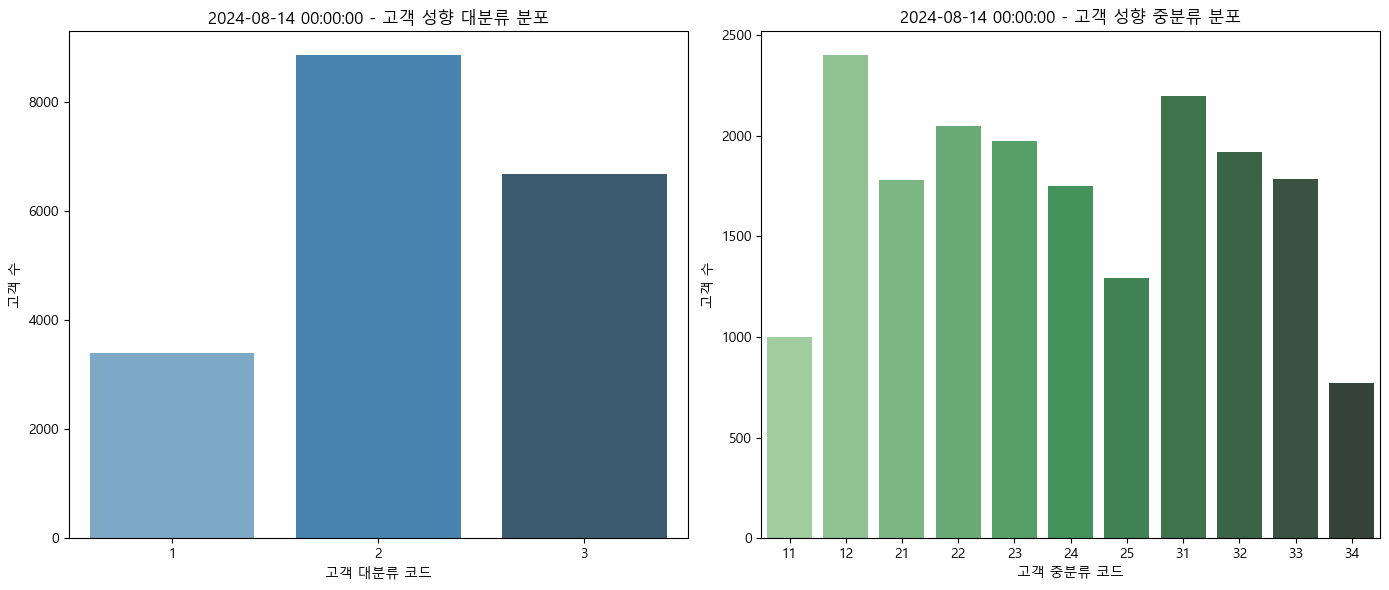

날짜: 2024-08-16 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8838명
  - 대분류 코드 3: 6677명
  - 대분류 코드 1: 3396명
중분류 코드별 분포:
  - 중분류 코드 12: 2399명
  - 중분류 코드 31: 2193명
  - 중분류 코드 22: 2044명
  - 중분류 코드 23: 1974명
  - 중분류 코드 32: 1920명
  - 중분류 코드 33: 1794명
  - 중분류 코드 21: 1784명
  - 중분류 코드 24: 1747명
  - 중분류 코드 25: 1289명
  - 중분류 코드 11: 997명
  - 중분류 코드 34: 770명
가장 많이 분포된 대분류 코드: 2 (8838명)
가장 많이 분포된 중분류 코드: 12 (2399명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


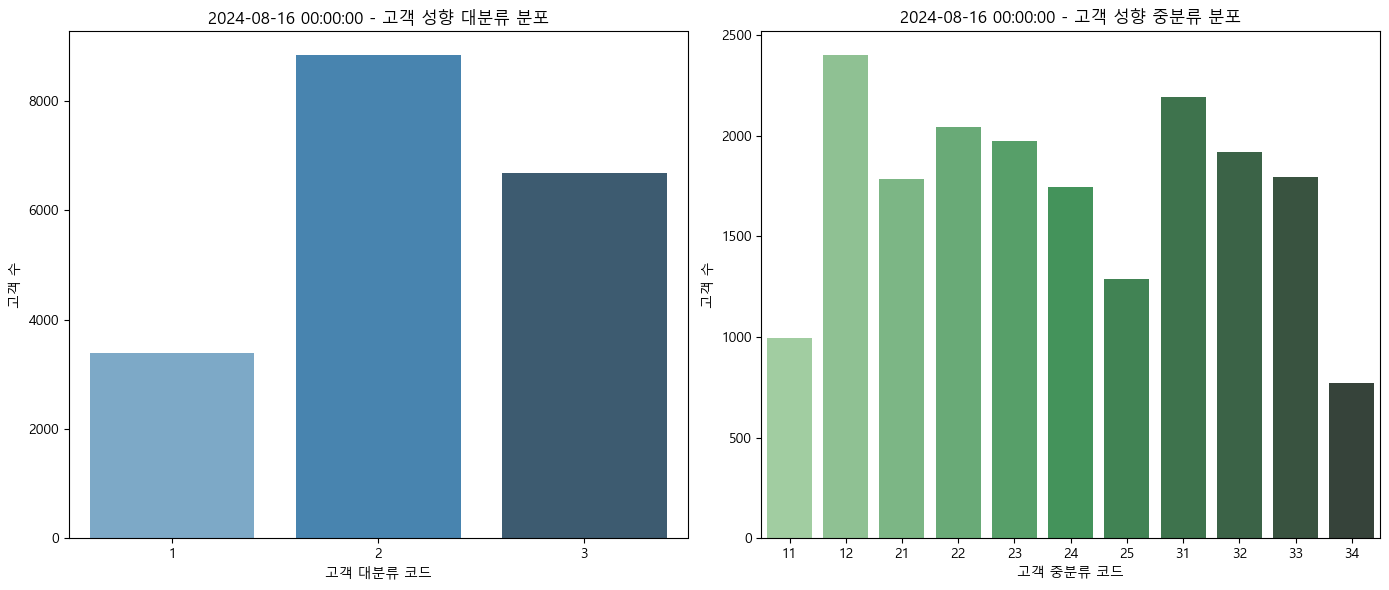

날짜: 2024-08-19 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8885명
  - 대분류 코드 3: 6710명
  - 대분류 코드 1: 3423명
중분류 코드별 분포:
  - 중분류 코드 12: 2413명
  - 중분류 코드 31: 2205명
  - 중분류 코드 22: 2057명
  - 중분류 코드 23: 1984명
  - 중분류 코드 32: 1934명
  - 중분류 코드 33: 1795명
  - 중분류 코드 21: 1790명
  - 중분류 코드 24: 1754명
  - 중분류 코드 25: 1300명
  - 중분류 코드 11: 1010명
  - 중분류 코드 34: 776명
가장 많이 분포된 대분류 코드: 2 (8885명)
가장 많이 분포된 중분류 코드: 12 (2413명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


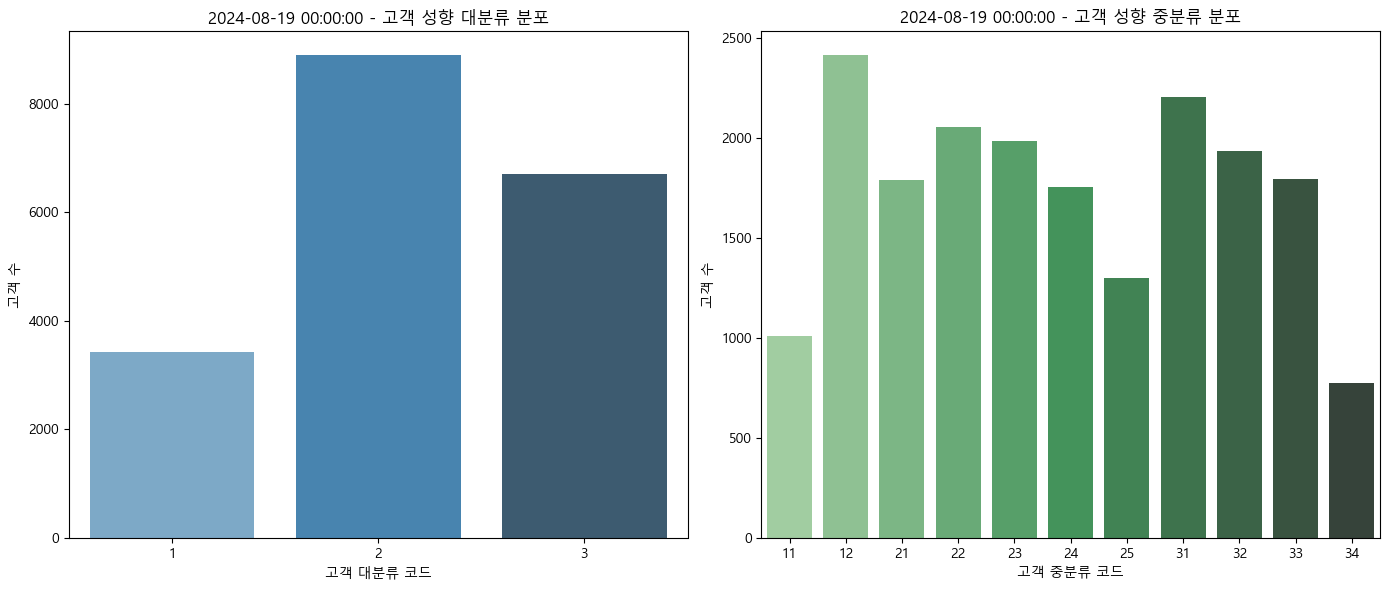

날짜: 2024-08-20 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8871명
  - 대분류 코드 3: 6711명
  - 대분류 코드 1: 3423명
중분류 코드별 분포:
  - 중분류 코드 12: 2410명
  - 중분류 코드 31: 2203명
  - 중분류 코드 22: 2063명
  - 중분류 코드 23: 1973명
  - 중분류 코드 32: 1935명
  - 중분류 코드 33: 1798명
  - 중분류 코드 21: 1788명
  - 중분류 코드 24: 1756명
  - 중분류 코드 25: 1291명
  - 중분류 코드 11: 1013명
  - 중분류 코드 34: 775명
가장 많이 분포된 대분류 코드: 2 (8871명)
가장 많이 분포된 중분류 코드: 12 (2410명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


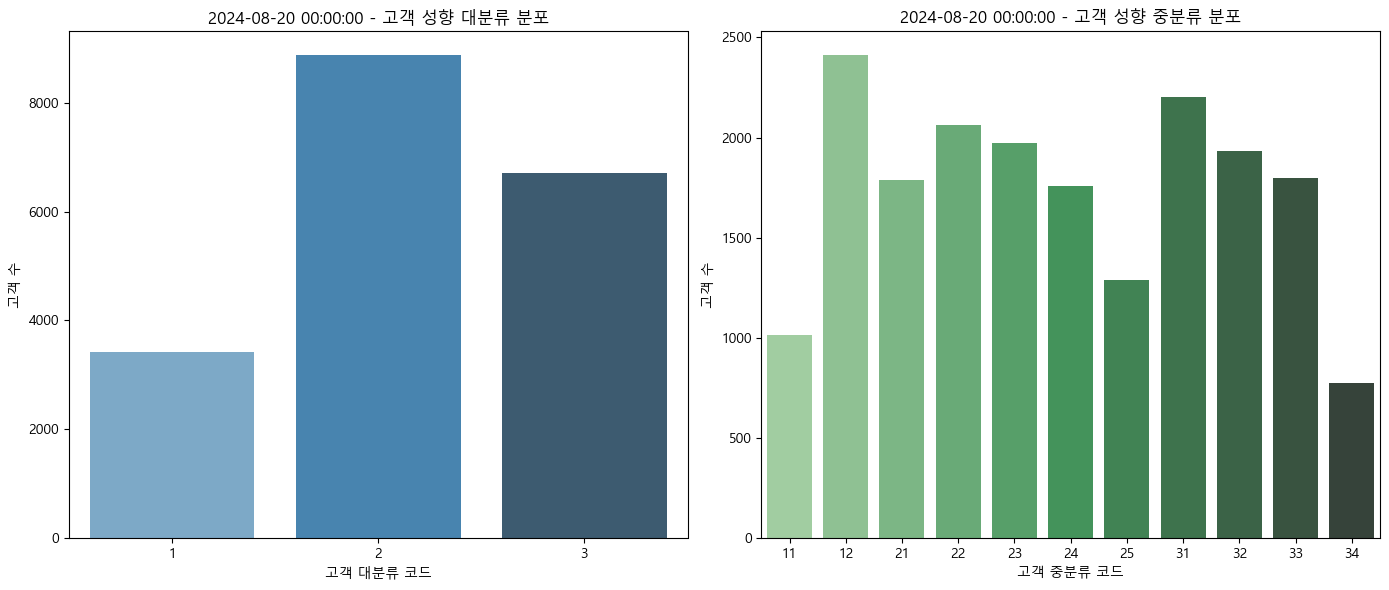

날짜: 2024-08-21 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8873명
  - 대분류 코드 3: 6721명
  - 대분류 코드 1: 3430명
중분류 코드별 분포:
  - 중분류 코드 12: 2417명
  - 중분류 코드 31: 2204명
  - 중분류 코드 22: 2064명
  - 중분류 코드 23: 1976명
  - 중분류 코드 32: 1942명
  - 중분류 코드 33: 1800명
  - 중분류 코드 21: 1789명
  - 중분류 코드 24: 1756명
  - 중분류 코드 25: 1288명
  - 중분류 코드 11: 1013명
  - 중분류 코드 34: 775명
가장 많이 분포된 대분류 코드: 2 (8873명)
가장 많이 분포된 중분류 코드: 12 (2417명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


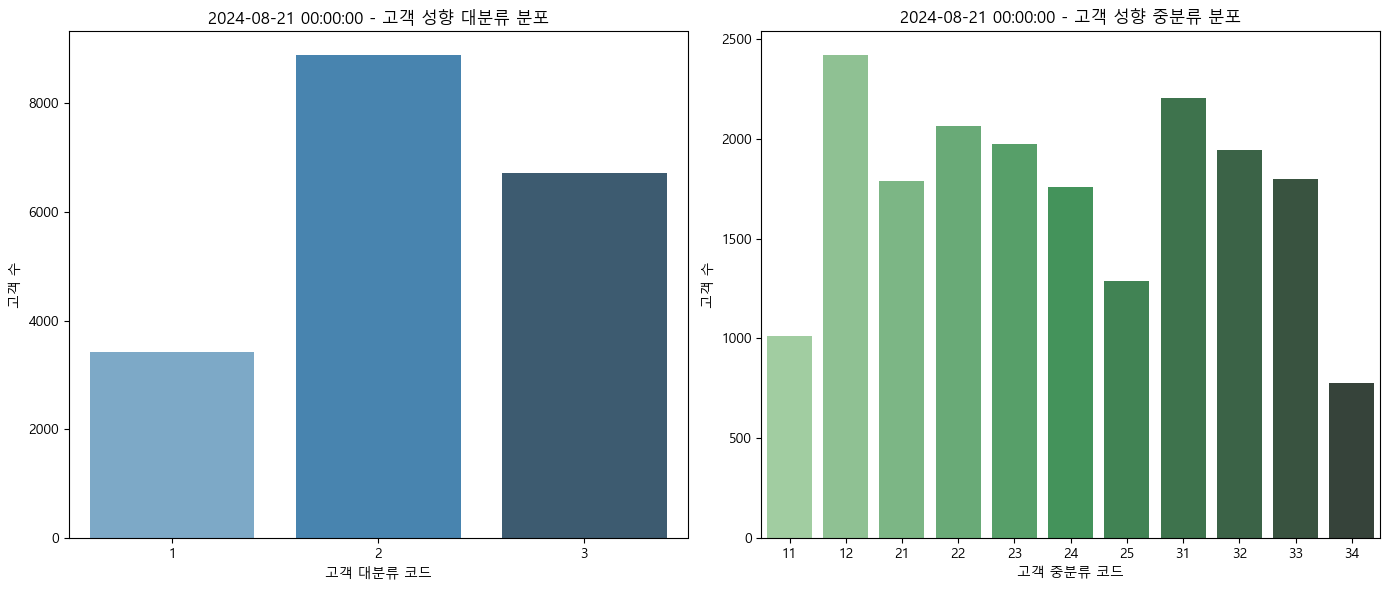

날짜: 2024-08-22 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8874명
  - 대분류 코드 3: 6720명
  - 대분류 코드 1: 3427명
중분류 코드별 분포:
  - 중분류 코드 12: 2415명
  - 중분류 코드 31: 2201명
  - 중분류 코드 22: 2069명
  - 중분류 코드 23: 1974명
  - 중분류 코드 32: 1940명
  - 중분류 코드 33: 1803명
  - 중분류 코드 21: 1792명
  - 중분류 코드 24: 1755명
  - 중분류 코드 25: 1284명
  - 중분류 코드 11: 1012명
  - 중분류 코드 34: 776명
가장 많이 분포된 대분류 코드: 2 (8874명)
가장 많이 분포된 중분류 코드: 12 (2415명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


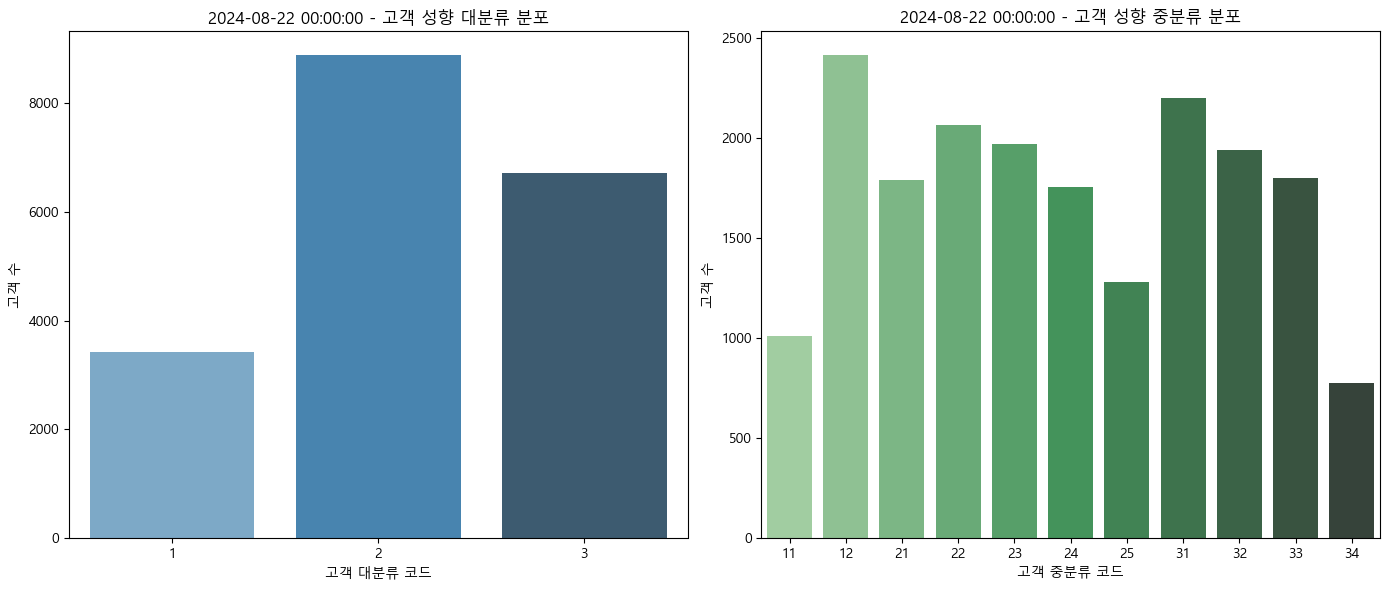

날짜: 2024-08-23 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8896명
  - 대분류 코드 3: 6732명
  - 대분류 코드 1: 3430명
중분류 코드별 분포:
  - 중분류 코드 12: 2419명
  - 중분류 코드 31: 2206명
  - 중분류 코드 22: 2071명
  - 중분류 코드 23: 1978명
  - 중분류 코드 32: 1950명
  - 중분류 코드 33: 1802명
  - 중분류 코드 21: 1796명
  - 중분류 코드 24: 1766명
  - 중분류 코드 25: 1285명
  - 중분류 코드 11: 1011명
  - 중분류 코드 34: 774명
가장 많이 분포된 대분류 코드: 2 (8896명)
가장 많이 분포된 중분류 코드: 12 (2419명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


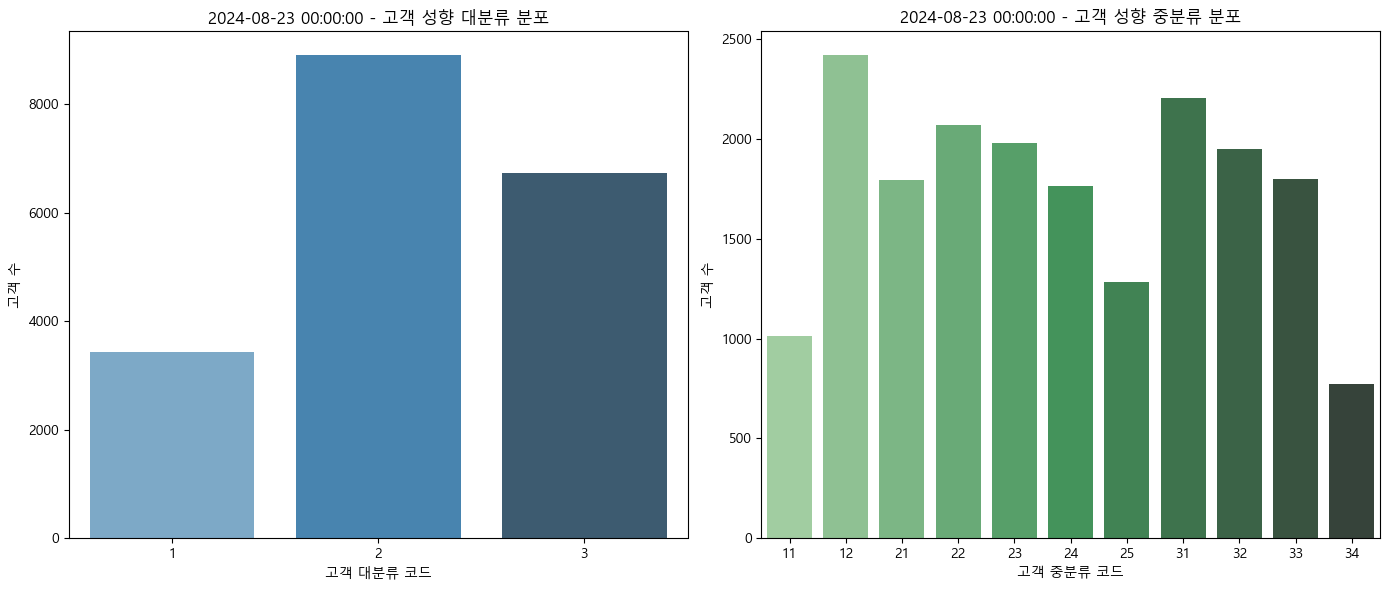

날짜: 2024-08-26 00:00:00
대분류 코드별 분포:
  - 대분류 코드 2: 8888명
  - 대분류 코드 3: 6739명
  - 대분류 코드 1: 3424명
중분류 코드별 분포:
  - 중분류 코드 12: 2414명
  - 중분류 코드 31: 2201명
  - 중분류 코드 22: 2065명
  - 중분류 코드 23: 1976명
  - 중분류 코드 32: 1950명
  - 중분류 코드 33: 1808명
  - 중분류 코드 21: 1797명
  - 중분류 코드 24: 1758명
  - 중분류 코드 25: 1292명
  - 중분류 코드 11: 1010명
  - 중분류 코드 34: 780명
가장 많이 분포된 대분류 코드: 2 (8888명)
가장 많이 분포된 중분류 코드: 12 (2414명)

--------------------------------------------------



C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1068362854.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')


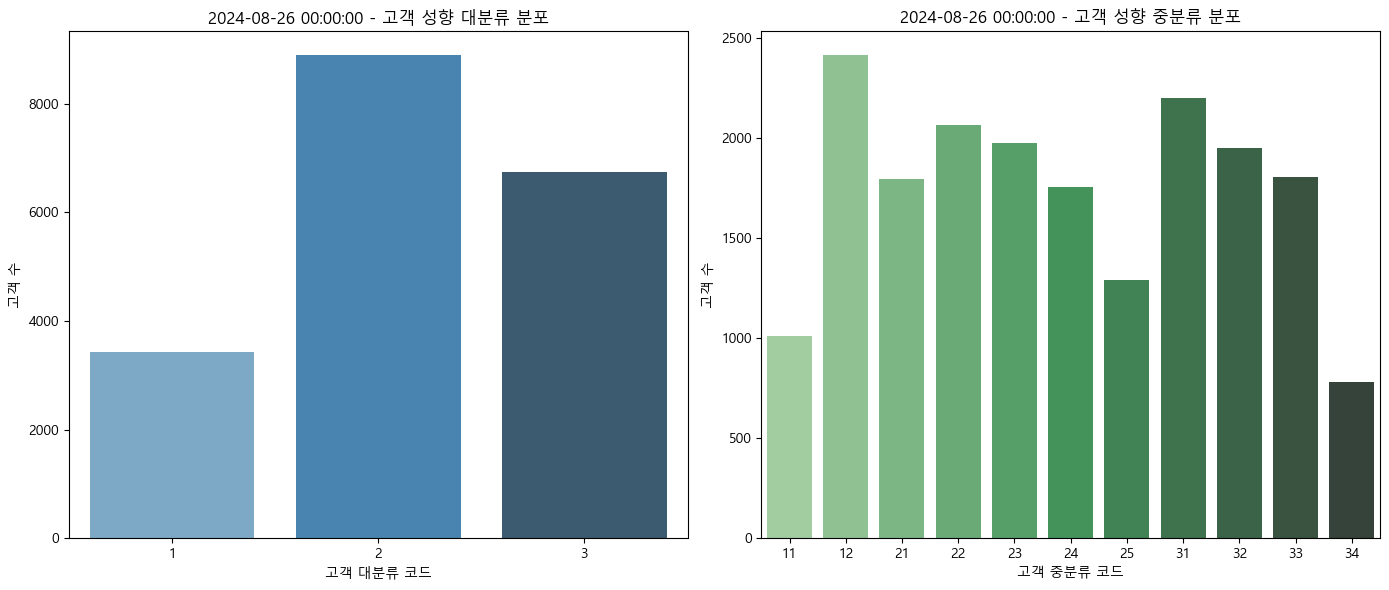

In [110]:
# 날짜별로 데이터를 그룹화
for date, group in cus_tp_ifo.groupby('bse_dt'):
    # 대분류 및 중분류 분포 계산
    cus_cgr_llf_dist = group['cus_cgr_llf_cd'].value_counts()
    cus_cgr_mlf_dist = group['cus_cgr_mlf_cd'].value_counts()

    # 대분류 텍스트 분석
    print(f"날짜: {date}")
    print(f"대분류 코드별 분포:")
    for code, count in cus_cgr_llf_dist.items():
        print(f"  - 대분류 코드 {code}: {count}명")

    # 중분류 텍스트 분석
    print(f"중분류 코드별 분포:")
    for code, count in cus_cgr_mlf_dist.items():
        print(f"  - 중분류 코드 {code}: {count}명")

    # 대분류 및 중분류에서 가장 많이 분포된 코드 출력
    top_llf = cus_cgr_llf_dist.idxmax()
    top_llf_count = cus_cgr_llf_dist.max()
    top_mlf = cus_cgr_mlf_dist.idxmax()
    top_mlf_count = cus_cgr_mlf_dist.max()

    print(f"가장 많이 분포된 대분류 코드: {top_llf} ({top_llf_count}명)")
    print(f"가장 많이 분포된 중분류 코드: {top_mlf} ({top_mlf_count}명)")
    print("\n" + "-"*50 + "\n")
    
    # 시각화 크기 설정 (날짜별로 개별 그래프)
    plt.figure(figsize=(14, 6))
        
    # 대분류 시각화
    plt.subplot(1, 2, 1)
    sns.barplot(x=cus_cgr_llf_dist.index, y=cus_cgr_llf_dist.values, palette='Blues_d')
    plt.title(f'{date} - 고객 성향 대분류 분포')
    plt.xlabel('고객 대분류 코드')
    plt.ylabel('고객 수')

    # 중분류 시각화
    plt.subplot(1, 2, 2)
    sns.barplot(x=cus_cgr_mlf_dist.index, y=cus_cgr_mlf_dist.values, palette='Greens_d')
    plt.title(f'{date} - 고객 성향 중분류 분포')
    plt.xlabel('고객 중분류 코드')
    plt.ylabel('고객 수')

    # 레이아웃 조정
    plt.tight_layout()
    plt.show()

<Figure size 1500x1000 with 0 Axes>

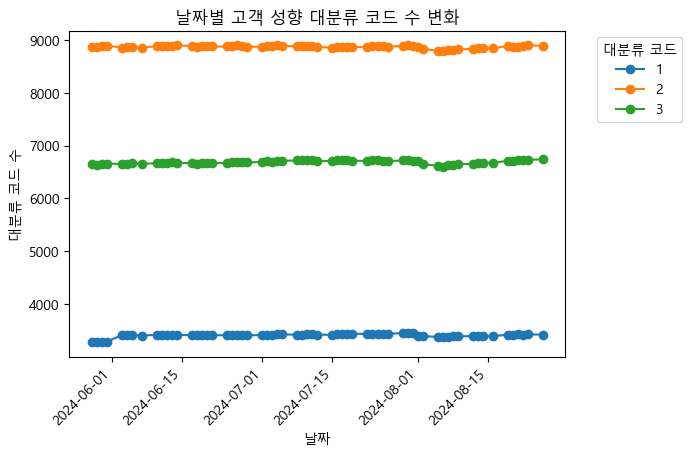

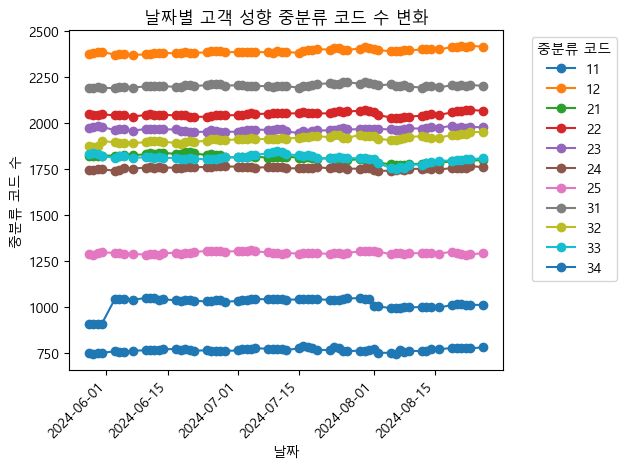

In [118]:
# 날짜별 대분류 및 중분류 코드 수 집계
llf_counts = cus_tp_ifo.groupby(['bse_dt', 'cus_cgr_llf_cd']).size().unstack(fill_value=0)
mlf_counts = cus_tp_ifo.groupby(['bse_dt', 'cus_cgr_mlf_cd']).size().unstack(fill_value=0)

# 그래프 크기 설정
plt.figure(figsize=(15, 10))

# 대분류 시각화
llf_counts.plot(kind='line', marker='o')
plt.title('날짜별 고객 성향 대분류 코드 수 변화')
plt.xlabel('날짜')
plt.ylabel('대분류 코드 수')
plt.xticks(rotation=45)
plt.legend(title='대분류 코드', bbox_to_anchor=(1.05, 1), loc='upper left')

# 중분류 시각화
mlf_counts.plot(kind='line', marker='o')
plt.title('날짜별 고객 성향 중분류 코드 수 변화')
plt.xlabel('날짜')
plt.ylabel('중분류 코드 수')
plt.xticks(rotation=45)
plt.legend(title='중분류 코드', bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 2. 유입/유출 데이터 분석

        bse_dt  ifw_ofw_dit_cd  total_amt_wht_rt   avg_rnk
0   2024-05-28               1          10204.01  2.185654
1   2024-05-28               2          13383.68  1.910448
2   2024-05-29               1          19567.91  2.314607
3   2024-05-29               2          21657.12  2.248598
4   2024-05-30               1          19158.68  2.279208
5   2024-05-30               2          20255.45  2.406417
6   2024-05-31               1          21699.48  2.340984
7   2024-05-31               2          22488.72  2.295820
8   2024-06-03               1          21913.65  2.397781
9   2024-06-03               2          23178.08  2.263248
10  2024-06-04               1          23576.25  2.309410
11  2024-06-04               2          25862.91  2.466926
12  2024-06-05               1          24507.74  2.498034
13  2024-06-05               2          22927.80  2.307200
14  2024-06-07               1          24883.12  2.457895
15  2024-06-07               2          29135.07  2.3505

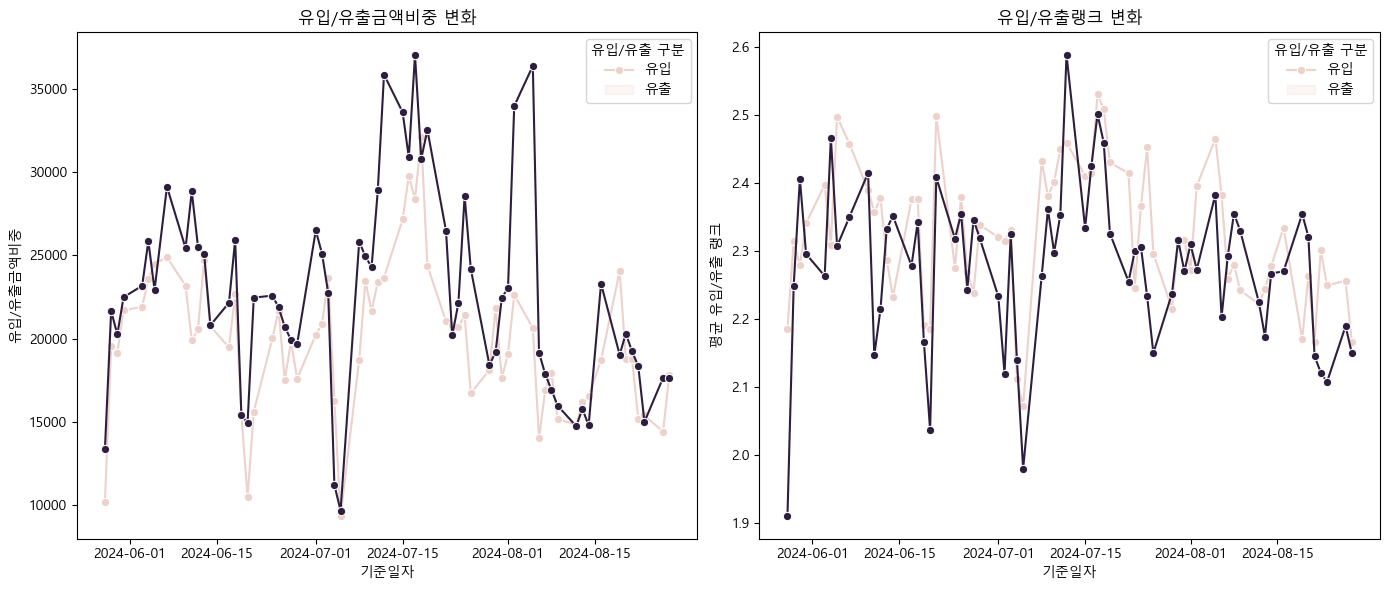

In [119]:
# 유입/유출금액비중과 유입/유출랭크를 기반으로 관심도 분석
interest_analysis = ifw_ofw_ifo.groupby(['bse_dt', 'ifw_ofw_dit_cd']).agg(
    total_amt_wht_rt=('ifw_ofw_amt_wht_rt', 'sum'),
    avg_rnk=('ifw_ofw_rnk', 'mean')
).reset_index()

# 결과 확인
print(interest_analysis)

# 시각화
plt.figure(figsize=(14, 6))

# 유입금액비중 시각화
plt.subplot(1, 2, 1)
sns.lineplot(data=interest_analysis, x='bse_dt', y='total_amt_wht_rt', hue='ifw_ofw_dit_cd', marker='o')
plt.title('유입/유출금액비중 변화')
plt.xlabel('기준일자')
plt.ylabel('유입/유출금액비중')
plt.legend(title='유입/유출 구분', labels=['유입', '유출'])

# 유입/유출랭크 시각화
plt.subplot(1, 2, 2)
sns.lineplot(data=interest_analysis, x='bse_dt', y='avg_rnk', hue='ifw_ofw_dit_cd', marker='o')
plt.title('유입/유출랭크 변화')
plt.xlabel('기준일자')
plt.ylabel('평균 유입/유출 랭크')
plt.legend(title='유입/유출 구분', labels=['유입', '유출'])

plt.tight_layout()
plt.show()

### 3. 투자 성향별 추천 ETF 분석

In [120]:
# 투자 성향별로 상위 10개의 인기 있는 ETF 분석
top_n = 10

# 고객 성향별로 상위 N개의 ETF를 추출하는 함수
def recommend_top_n_etfs(group, n=top_n):
    return group['tck_iem_cd'].value_counts().nlargest(n).index.tolist()

# 고객 성향 대분류별로 상위 N개의 ETF 추천
popular_etfs_by_customer = cus_tp_ifo.groupby('cus_cgr_llf_cd').apply(recommend_top_n_etfs)

# 결과 출력
print("투자 성향별 상위 10개의 추천 ETF:")
print(popular_etfs_by_customer)


투자 성향별 상위 10개의 추천 ETF:
cus_cgr_llf_cd
1    [AAL         , TLRY        , SPOT        , SPY         , SPYD        , SQ          , SRE         , STEM        , STNG        , SWK         ]
2    [AAL         , WTRG        , WM          , WEN         , WELL        , WBD         , W           , VYGR        , VUZI        , VTYX        ]
3    [AAL         , TDG         , SPY         , SPYD        , SQ          , SRE         , STAA        , STEM        , STNG        , STRL        ]
dtype: object


C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\1061218390.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  popular_etfs_by_customer = cus_tp_ifo.groupby('cus_cgr_llf_cd').apply(recommend_top_n_etfs)


### 4. 날짜별 총보유계좌수, 총보유수량 상위 10위 ETF 및 주식 분류

In [121]:
# 1) 날짜별로 총보유계좌수, 총보유수량 상위 10위 종목
top_10_by_date = stk_dd_ifo.groupby('bse_dt').apply(
    lambda x: x[['bse_dt', 'tck_iem_cd', 'tot_hld_act_cnt', 'tot_hld_qty']].sort_values(
        by=['tot_hld_act_cnt', 'tot_hld_qty'], ascending=False).head(10)
)

print("날짜별 총보유계좌수 및 총보유수량 상위 10위 종목:")
print(top_10_by_date)

날짜별 총보유계좌수 및 총보유수량 상위 10위 종목:
                     bse_dt    tck_iem_cd  tot_hld_act_cnt  tot_hld_qty
bse_dt                                                                 
2024-05-28 77459 2024-05-28  TSLA                    94968      4250338
           223   2024-05-28  AAPL                    87232      1507675
           25833 2024-05-28  MSFT                    38008       547321
           27918 2024-05-28  NVDA                    35453       576106
           38195 2024-05-28  TQQQ                    31200      4110900
           61524 2024-05-28  IONQ                    27092      9579436
           63410 2024-05-28  LCID                    26702      6729461
           35308 2024-05-28  SOXL                    23093      4045695
           16491 2024-05-28  GOOGL                   22374       864286
           73675 2024-05-28  SBUX                    22176       313571
2024-05-29 77417 2024-05-29  TSLA                    95023      4248393
           228   2024-05-29  AAPL 

C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\3748684857.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_by_date = stk_dd_ifo.groupby('bse_dt').apply(


### 5. 날짜별 당사평균 보유비중비율, 평가손익, 수익률 분석

In [122]:
# 2) 날짜별로 당사평균 보유비중비율, 평가손익, 수익률 분석
avg_by_date = stk_dd_ifo.groupby('bse_dt').apply(
    lambda x: x[['bse_dt', 'tck_iem_cd', 'tco_avg_hld_wht_rt', 'tco_avg_eal_pls', 'tco_avg_pft_rt', 'tco_avg_phs_uit_pr', 'tco_avg_hld_te_dd_cnt']].sort_values(
        by='tco_avg_pft_rt', ascending=False).head(10)
)

print("날짜별 당사평균수익률 상위 10위 종목:")
print(avg_by_date)


날짜별 당사평균수익률 상위 10위 종목:
                     bse_dt    tck_iem_cd  tco_avg_hld_wht_rt  \
bse_dt                                                          
2024-05-28 38263 2024-05-28  TRGP                        6.62   
           9117  2024-05-28  CORZ                       10.71   
           69463 2024-05-28  OVV                        18.11   
           1046  2024-05-28  ADMA                       23.58   
           76804 2024-05-28  TK                         16.37   
           27918 2024-05-28  NVDA                       30.79   
           74594 2024-05-28  SLQT                       25.66   
           77079 2024-05-28  TNK                         8.42   
           10348 2024-05-28  CVNA                       15.09   
           76036 2024-05-28  SVRA                       21.74   
2024-05-29 38273 2024-05-29  TRGP                        6.65   
           9093  2024-05-29  CORZ                       10.79   
           69468 2024-05-29  OVV                        18.23   
  

C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\303166965.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_by_date = stk_dd_ifo.groupby('bse_dt').apply(


### 6. 날짜별 손실투자자비율, 수익투자자비율 분석

In [123]:
# 3) 날짜별 손실투자자비율, 수익투자자비율 분석
loss_profit_by_date = stk_dd_ifo.groupby('bse_dt').apply(
    lambda x: x[['bse_dt', 'tck_iem_cd', 'lss_ivo_rt', 'pft_ivo_rt']].assign(
        diff_loss_profit=lambda y: y['pft_ivo_rt'] - y['lss_ivo_rt']
    ).sort_values(by='diff_loss_profit', ascending=False).head(10)
)

print("날짜별 수익투자자비율이 높은 종목 상위 10위:")
print(loss_profit_by_date)

날짜별 수익투자자비율이 높은 종목 상위 10위:
                     bse_dt    tck_iem_cd  lss_ivo_rt  pft_ivo_rt  \
bse_dt                                                              
2024-05-28 28459 2024-05-28  NYT                  0.0         1.0   
           42241 2024-05-28  WELL                 0.0         1.0   
           31283 2024-05-28  PSTG                 0.0         1.0   
           62105 2024-05-28  JCI                  0.0         1.0   
           79288 2024-05-28  VLTO                 0.0         1.0   
           57130 2024-05-28  FLR                  0.0         1.0   
           79413 2024-05-28  VRTX                 0.0         1.0   
           29930 2024-05-28  PBA                  0.0         1.0   
           29840 2024-05-28  PAYS                 0.0         1.0   
           29282 2024-05-28  OTIS                 0.0         1.0   
2024-05-29 37838 2024-05-29  TMDX                 0.0         1.0   
           59639 2024-05-29  GSL                  0.0         1.0   
       

C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\729806021.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_profit_by_date = stk_dd_ifo.groupby('bse_dt').apply(


### 7. 날짜별 신규매수계좌수, 종목조회건수, 관심종목등록건수 분석

In [124]:
# 4) 날짜별 신규매수계좌수, 종목조회건수, 관심종목등록건수 분석
account_view_by_date = stk_dd_ifo.groupby('bse_dt').apply(
    lambda x: x[['bse_dt', 'tck_iem_cd', 'ifw_act_cnt', 'vw_tgt_cnt', 'rgs_tgt_cnt']].sort_values(
        by='ifw_act_cnt', ascending=False).head(10)
)

print("날짜별 신규매수계좌수 상위 10위 종목:")
print(account_view_by_date)

날짜별 신규매수계좌수 상위 10위 종목:
                     bse_dt    tck_iem_cd  ifw_act_cnt  vw_tgt_cnt  \
bse_dt                                                               
2024-05-28 27918 2024-05-28  NVDA                  256       92918   
           35308 2024-05-28  SOXL                  118       26264   
           68524 2024-05-28  O                      98        6070   
           77459 2024-05-28  TSLA                   71       46660   
           38195 2024-05-28  TQQQ                   69       10215   
           12414 2024-05-28  DPST                   64         503   
           28025 2024-05-28  NVDL                   58        9161   
           223   2024-05-28  AAPL                   54       21647   
           73675 2024-05-28  SBUX                   48        5633   
           73763 2024-05-28  SCHD                   43        4649   
2024-05-29 27927 2024-05-29  NVDA                  787      134887   
           77417 2024-05-29  TSLA                  323       48379 

C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\3092469012.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  account_view_by_date = stk_dd_ifo.groupby('bse_dt').apply(


### 8. 날짜별 전량매도계좌수와 손실/수익투자자비율 분석

In [125]:
# 5) 날짜별 전량매도계좌수와 손실/수익투자자비율의 상관관계
sell_loss_profit_by_date = stk_dd_ifo.groupby('bse_dt').apply(
    lambda x: x[['bse_dt', 'tck_iem_cd', 'ofw_act_cnt', 'lss_ivo_rt', 'pft_ivo_rt']].sort_values(
        by='ofw_act_cnt', ascending=False).head(10)
)

print("날짜별 전량매도계좌수 상위 10위 종목:")
print(sell_loss_profit_by_date)

날짜별 전량매도계좌수 상위 10위 종목:
                     bse_dt    tck_iem_cd  ofw_act_cnt  lss_ivo_rt  pft_ivo_rt
bse_dt                                                                        
2024-05-28 35308 2024-05-28  SOXL                  555      0.0794      0.9195
           27918 2024-05-28  NVDA                  346      0.0000      0.9991
           77459 2024-05-28  TSLA                  241      0.6486      0.3511
           223   2024-05-28  AAPL                  229      0.0000      1.0000
           38195 2024-05-28  TQQQ                  161      0.0499      0.9498
           25833 2024-05-28  MSFT                  115      0.0000      1.0000
           73675 2024-05-28  SBUX                  114      0.6184      0.3816
           28025 2024-05-28  NVDL                  114      0.0510      0.9366
           74869 2024-05-28  SMR                   106      0.1672      0.8301
           2573  2024-05-28  AMD                   100      0.2474      0.7523
2024-05-29 35314 2024-05-29  

C:\Users\1233d\AppData\Local\Temp\ipykernel_28084\3908321684.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sell_loss_profit_by_date = stk_dd_ifo.groupby('bse_dt').apply(
